In [1]:
from fastai.vision.all import *
from fastai.learner import *
from fastai.data.all import *
from fastai.callback.tracker import SaveModelCallback
import pandas as pd
import matplotlib.pyplot as plt
from pathlib2 import Path
import numpy as np
import random
from torch.nn import MSELoss

You can download the ebooks [here](https://www.openslr.org/resources/12/original-books.tar.gz).

We will need the pretrained embeddings from https://github.com/iamyuanchung/speech2vec-pretrained-vectors. We will use them to compare our results and also to figure out what vocab the authors of the speech2vec paper used for training. Let us start with the latter.

In [2]:
import logging
from six import iteritems
from web.datasets.similarity import fetch_MEN, fetch_WS353, fetch_SimLex999
from web.embeddings import fetch_GloVe
from web.evaluate import evaluate_similarity
from web.embedding import Embedding, Vocabulary
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
speech2vec = KeyedVectors.load_word2vec_format('../speech2vec-pretrained-vectors/speech2vec/50.vec', binary=False) 

In [4]:
vocab = set(speech2vec.vocab.keys())
len(vocab)

37622

In [139]:
vocab = [w for w in vocab if w not in set(["reservation", "cholera", "inviolate", "granite", "pardons", "uselessly", "apes", "mammoth", "importation", "cedar", "tonneau", "mason", "excommunication", "oblivious", "universality", "migrations", "dumont", "vane", "opprobrious", "uninterruptedly", "babble", "thibet", "jostle", "capture", "scandalized", "ambiguity", "hysterical", "gertrude", "begat", "parched", "ether", "scotia", "des", "magnifying", "shackled", "luxuriance", "unblinking", "shrugging", "trolley", "becomingly", "confederacy", "giantess", "township", "ritz", "appear\'d", "resignation", "munchausen", "faithfulness", "papyrus", "buzz", "pines", "calming", "chemically", "shimmered", "speculated", "daffodil", "infallible", "grill", "subsisting", "hangs", "worthlessness", "modred", "injected", "fold", "levin", "reaper", "magdalene", "notorious", "agriculture", "overcoats", "proverb", "afterward", "panic", "bemoan", "broadcast", "requests", "beaches", "graded", "handel", "acquaintanceship", "heathen", "kidney", "automobile", "galvanic", "walden", "miller", "disruption", "candelabra", "accost", "gardeners", "pioneer", "jeered", "acceptance", "courtesy", "keel", "darrow", "peremptory", "unflagging", "hag", "vehicle", "phoebe", "persuades", "anarchistic", "threadbare", "unwell", "repining", "punctuated", "scamps", "fortification", "plastic", "disheartened", "reviving", "icarus", "blushes", "bain", "precipitous", "outcasts", "valour", "premium", "invariable", "inaction", "defies", "briefest", "din", "forge", "janet", "mussel", "slouching", "windless", "stilted", "participated", "alliances", "wallowing", "doting", "mightier", "pave", "confine", "taverns", "surroundings", "trudge", "arid", "warring", "formulate", "buffeted", "orchestra", "twin", "assemblies", "unbending", "soothe", "corduroy", "athirst", "heart\'s", "d\'urville", "pugnacity", "saucepan", "babes", "caravans", "sallies", "neatest", "undergraduate", "pill", "rendezvous", "administers", "scion", "spattered", "drunkenness", "fatherland", "affable", "protects", "covetous", "unbeknown", "orderlies", "connoisseurs", "convulsed", "numbered", "valet", "housings", "gladden", "ruffian", "unpractical", "torres", "affright", "idealism", "maze", "deprives", "ventilation", "intractable", "recent", "shelled", "rumblings", "chords", "quoting", "fraulein", "beetle", "guatemala", "scribble", "considerately", "caucasus", "clue", "amalgamated", "gloss", "teresa", "henceforth", "host\'s", "fanned", "butchered", "sluggishly", "lineament", "hesitating", "redeem", "relates", "pedro", "depository", "quaver", "offender", "electing", "felicitous", "milwaukee", "availing", "emphatic", "combatants", "rarefied", "crape", "deprecating", "forestall", "hypothetical", "attics", "celebration", "stylish", "askance", "insoluble", "researches", "unqualified", "threshing", "pas", "accursed", "lamed", "mexico", "incisions", "bertrand", "thirsting", "una", "twopenny", "negatively", "telescopes", "mildew", "katherine", "madonna", "memorable", "catastrophes", "displace", "wage", "clipped", "jolt", "explication", "brooks", "palazzo", "frere", "quizzically", "drifts", "mobility", "crocus", "lobbies", "generating", "deservedly", "heredity", "earthen", "jericho", "renaissance", "cruising", "introductions", "nourish", "warp", "divorced", "comment", "ingots", "renouncing", "habitual", "curates", "bruising", "misjudged", "dews", "alacrity", "mainland", "myriad", "hinge", "authorized", "rump", "alluvial", "communicative", "profuse", "abiding", "bodice", "horizontally", "pelts", "slayers", "kidnap", "comforters", "simultaneous", "boost", "arrow", "suggestively", "exclamation", "whipped", "olivia", "imply", "gascon", "swamps", "spiny", "porpoise", "fir", "festooned", "leaveth", "directness", "rex", "seth", "recalls", "athletics", "investment", "resounding", "prone", "forswear", "blemish", "believers", "misunderstanding", "admissible", "insidiously", "watts", "hammer", "lucidity", "stouter", "animates", "padding", "fasted", "consents", "candlesticks", "wag", "poems", "exemplar", "produces", "concealments", "evading", "western", "participant", "cuffed", "surrendered", "gnats", "cruelties", "fancier", "executions", "orb", "bail", "flow", "sheltered", "reproduced", "cinders", "conferring", "surname", "consciences", "consecrated", "lover\'s", "blackfellow", "richardson", "jaguar", "remissness", "exerts", "ivied", "justices", "hulls", "subdivided", "complex", "flip", "blotches", "vowing", "osiris", "permanence", "jot", "tracking", "hog\'s", "mishap", "falcon", "arbiter", "mewed", "achieve", "incriminating", "cumberland", "mishaps", "slackened", "reptiles", "persevered", "sobs", "carrot", "intellectually", "clicking", "absurdity", "umbrage", "uniformly", "nunnery", "transcendent", "oration", "charger", "patriarch", "forbidding", "justin", "risky", "entrancing", "radius", "instanced", "amuses", "shallow", "dispirited", "homogeneous", "defenceless", "staples", "proselytes", "crafts", "wicks", "emolument", "statute", "speculation", "adroitly", "contradicting", "keepeth", "sycamore", "plotting", "launching", "skepticism", "polonius", "rumor", "clarion", "fanged", "makeshift", "hurling", "maximilian", "unfortunates", "carline", "referendum", "dump", "sprinkle", "baling", "loathed", "warwickshire", "effie", "discernible", "protested", "uncontrolled", "whaling", "all\'s", "prim", "diffuse", "designs", "agatha", "inadequacy", "memorial", "harpooner", "cantered", "converge", "outset", "headaches", "supple", "flank", "ambiguous", "carols", "buenos", "nursing", "richmond", "raja\'s", "retracing", "sailor", "appellations", "tierra", "protestants", "pointer", "outpost", "rama", "prey", "cornelia", "devise", "undergraduates", "stumbles", "hieroglyphic", "overspread", "damn", "nicolas", "plenitude", "collects", "ascribing", "regiment", "foretell", "plots", "cumulative", "egregious", "worshiped", "butlers", "souvenirs", "evans", "amounts", "misrepresented", "winners", "justify", "caked", "traditions", "mamelukes", "adjudged", "genera", "interplay", "juices", "unpack", "erroneous", "dolphins", "jenny", "enables", "paroxysms", "regal", "depict", "squall", "christina", "apologized", "objectively", "scarlatina", "slaveholder", "slang", "rhythmical", "mirthful", "amazement", "myrtles", "thitherward", "foothold", "rashly", "stanley", "emphatically", "favorably", "exploitation", "undergoing", "taxation", "lair", "scotchman", "gratifications", "bishoprics", "imprint", "urchins", "kettles", "chariots", "relentless", "saddened", "dislocated", "call\'d", "foals", "dreariest", "exorcise", "scholar", "nations", "exempted", "quietness", "hedgerow", "flask", "inflicted", "exclaims", "filth", "bins", "assaulting", "nicknames", "emigrated", "sandal", "tarry", "player", "chores", "frieda", "tradesmen", "digestive", "therein", "laurels", "permanently", "topple", "wilfrid", "futures", "junk", "disrespectful", "avoids", "prophetess", "fulfilled", "hardening", "assigning", "outwardly", "disinterred", "kneel", "welding", "dissipating", "spider", "woodwork", "apathetic", "abdication", "month\'s", "steer", "figuratively", "glowering", "skye", "wedded", "wilhelm", "terrier", "presentiment", "recommends", "delineated", "mine\'s", "stamboul", "category", "ally", "teaches", "criticising", "invigorated", "petroleum", "cronies", "justinian", "nimrod", "georgian", "concede", "cherry", "plumbing", "hedged", "taps", "relate", "islets", "uprising", "bowen", "grayish", "gorgeous", "barometers", "shank", "undeserving", "compositions", "keith", "popularly", "authors", "shoemaker", "epoch", "yale", "displeasure", "saucers", "introspection", "crests", "diligent", "plaything", "aversion", "subtile", "acid", "abdominal", "crystallize", "eleanor", "invitations", "resorted", "inimitable", "liege", "babe", "dubbed", "mirage", "unreal", "overwhelmingly", "maize", "horseshoe", "deputation", "derivation", "rote", "hugo", "inbred", "shortening", "compel", "girlish", "befell", "insured", "junior", "keener", "attachment", "gossamer", "ling", "bryce", "sleight", "discreetly", "expeditions", "aristocrats", "compels", "languages", "whims", "intact", "billiards", "plundering", "solidarity", "pledged", "mee", "paraphernalia", "trading", "purity", "upland", "harsher", "dolphin", "redundant", "dromedary", "gorges", "reinstate", "maddest", "conclude", "tendered", "decade", "warble", "arresting", "fangled", "jangle", "stabbed", "twelvemonth", "impunity", "nomination", "predecessor", "latitude", "arras", "cairns", "transcends", "fingered", "progressive", "transact", "holders", "rig", "obviate", "teem", "glacial", "derisive", "beak", "refracting", "soaks", "enticing", "emblem", "depraved", "insensibility", "collectively", "margaret\'s", "pawnbroker", "swamped", "wrists", "unwrapped", "pocketbook", "unfasten", "hypocritically", "uprose", "seducer", "avidity", "oasis", "amenable", "anciently", "dot", "rapine", "herbage", "damaging", "reproachfully", "scales", "bleating", "levying", "afield", "gunner", "kangaroos", "rebukes", "cain", "husbandmen", "regretful", "distinguish", "hartford", "grog", "charon", "cowl", "roamed", "stations", "managing", "decorative", "unevenly", "collectors", "handicap", "waterless", "cloudless", "varro", "sealed", "stanley\'s", "calendar", "deposit", "peaks", "bengal", "strengthens", "homestead", "attribute", "saturnalia", "standstill", "holdings", "forasmuch", "beginneth", "admitting", "especial", "arctic", "unacknowledged", "atom", "lenses", "disarm", "arnica", "laboring", "promenading", "dessert", "executor", "acquitted", "handiwork", "enshrined", "estuary", "beetling", "inestimable", "sag", "doughty", "furred", "clamored", "advised", "specify", "citron", "overestimate", "irreconcilable", "correctly", "unerringly", "pouch", "prate", "disheveled", "treaty", "nutritious", "poesy", "acquaint", "mocked", "buckles", "thereabouts", "whir", "apennines", "decently", "vitality", "clamorously", "falseness", "plashing", "flaw", "orphaned", "gnomes", "massacred", "eloquence", "landmarks", "fissures", "inaccessible", "praiseworthy", "sooty", "ave", "colouring", "bean", "bulgaria", "episode", "wessex", "exiled", "incensed", "prescribes", "giggling", "frequented", "immoderately", "unwavering", "incursion", "solidity", "protector", "dissolves", "fella", "delicious", "excluding", "depriving", "mesopotamia", "joyousness", "tides", "hapless", "bountiful", "fireman", "weber", "jason", "jes", "descends", "ancestors", "eateth", "moody", "clarence", "fabrication", "tacit", "votaries", "response", "convictions", "prescott", "ragamuffin", "blunted", "encountering", "successor", "permits", "wharves", "incomparably", "grounded", "landowners", "rarest", "blush", "jackals", "spill", "observable", "yelp", "commonplace", "flowered", "battery", "shielding", "undulation", "flows", "mormon", "harped", "quartz", "eliot", "repairs", "hock", "abbot\'s", "conformable", "sleepless", "etchings", "louvre", "watcher", "ironed", "capriciously", "ida", "hiring", "snubbed", "maternity", "shaven", "signing", "console", "apt", "falconer", "clients", "entanglement", "congressmen", "crackled", "deputy", "freezing", "ailment", "competitions", "angeles", "tombs", "melody", "diagrams", "porcupine", "friction", "afterthought", "relegated", "honours", "harvested", "tobias", "uninfluenced", "bronze", "discovers", "views", "hawaii", "sez", "films", "demure", "theatres", "precipices", "pristine", "cigars", "bitterest", "vicissitudes", "cupids", "alcestis", "storming", "unamiable", "closes", "solicitous", "engrossing", "overloaded", "gasoline", "horde", "ay", "nationalities", "visages", "orifice", "withers", "abduction", "garner", "mandates", "slant", "periodical", "culled", "sap", "journalism", "partner\'s", "paralytic", "eulogies", "cathedrals", "presumes", "tolls", "robust", "wistful", "leghorn", "islander", "notary", "drumming", "chokes", "hazardous", "noblesse", "anguished", "bacchanalian", "interprets", "tremblingly", "deviations", "alien", "disturbs", "combustion", "discontinued", "equip", "dishonorable", "harvard", "outcome", "pedestrians", "squalling", "drowns", "tours", "voltaire", "bankrupt", "copses", "corrals", "fowl", "mottled", "manifested", "hairpins", "prongs", "ruining", "assailants", "retreating", "unpacked", "austere", "parallels", "glaciers", "speakest", "glutton", "wilson", "coca", "bella", "symphonic", "eustace", "epistle", "dangers", "ritual", "sarcasm", "cult", "calories", "pedestal", "inland", "dreamers", "scruff", "loudness", "hammond", "dissuade", "saracens", "fiddler", "jones\'s", "trojans", "plausibility", "proclaims", "irresolute", "presentation", "laterally", "foresee", "memoir", "grudge", "shovel", "unveiled", "continent", "revisit", "qui", "babbling", "petted", "barnes", "forebore", "ploughboy", "suffocating", "inventions", "lucca", "endureth", "sanded", "ferdinando", "panel", "conversely", "earthquakes", "solar", "shakespeare\'s", "immigrant", "transcend", "collation", "ridding", "delegates", "parasites", "underfoot", "limitless", "subsidiary", "rupert", "strap", "devil\'s", "crepe", "critias", "incest", "farewells", "interwoven", "plants", "untrue", "credible", "quarreling", "natchez", "mastiff", "sorrel", "dosed", "elias", "congruity", "mara", "forgiving", "narrowed", "rivets", "unavoidably", "nation\'s", "falkland", "flinging", "cunningham", "terminal", "impoverished", "justifies", "likenesses", "maidens", "signora", "wegg\'s", "macedonian", "unsurpassed", "reconsidered", "inspect", "unnamed", "signals", "churchwarden", "unpractised", "educators", "docile", "malady", "commotion", "hyaena", "neighborhood", "hispaniola", "cultured", "breaker", "imposts", "spaniels", "baal", "numa", "ices", "onslaught", "labored", "ravens", "scholars", "cornwall", "cyrus", "swedenborg", "alfred", "familiarity", "retailed", "vacillation", "unconditionally", "cloister", "fraught", "wraps", "bosh", "inimical", "benign", "planning", "hewn", "satan\'s", "pietro", "delegation", "illiberal", "differs", "carnegie", "gateway", "disconsolate", "mortality", "hordes", "strews", "armistice", "glut", "nutt", "argues", "modernized", "blocks", "nineteenth", "porcupines", "visualize", "furnishings", "formalities", "blackening", "sendeth", "slumbered", "figured", "impeccable", "hemmed", "scabbard", "cedars", "flirting", "al", "islet", "sappho", "automatic", "gerald", "confirming", "poison", "oilcloth", "tractor", "adela", "passageway", "forges", "warde", "compulsion", "poppy", "blankness", "titans", "ensuing", "dormant", "stoke", "allowances", "waistcoats", "indulgence", "deserved", "beth", "commoner", "withouten", "flirtation", "coasting", "domingo", "householder", "tearfully", "jealously", "revolution", "sunken", "encompass", "eventually", "keys", "oxford", "redemption", "pension", "subtler", "overtopped", "fishy", "cushioned", "scaffolding", "swans", "planet", "projected", "patroness", "resentments", "queried", "kai", "circumference", "mites", "conformity", "operatic", "forecastle", "masthead", "deprived", "spheres", "glisten", "guaranteed", "ecstatic", "fruits", "basic", "disembarked", "saps", "restoration", "prudently", "specifically", "metres", "smoulders", "lecturers", "bracing", "villains", "charles\'s", "butted", "immigration", "dumas", "pounce", "attacked", "infected", "luckily", "mid", "bristle", "chum", "millville", "verily", "diffusing", "sufficed", "vermilion", "cerebral", "specialized", "award", "implanted", "homespun", "illusion", "reproduces", "inferred", "julius", "filigree", "oppressively", "scenery", "sunshiny", "graze", "beheaded", "tootles", "soudan", "districts", "mucilage", "provocation", "mansions", "stilton", "faery", "proprietorship", "southwestern", "equinox", "misuse", "tweed", "partakes", "propping", "pumice", "hoeing", "ruse", "acumen", "massed", "dupes", "ties", "vitriol", "cudgel", "brighton", "clambered", "reticent", "dorians", "parables", "aggressively", "seventeenth", "engulfed", "angel\'s", "deploring", "pauline", "stateliness", "occupants", "loki", "slates", "cures", "viewpoint", "shelves", "bede", "purest", "cheerily", "jeopardy", "farmhouse", "vat", "sacraments", "install", "dislodge", "unprincipled", "hampshire", "felony", "collector\'s", "impropriety", "telescopic", "conspirator", "survey", "graver", "promulgated", "turneth", "lairs", "demoralization", "implore", "humanitarian", "lashings", "canvassing", "untold", "deformities", "readjustment", "curb", "follows", "behoved", "volunteered", "poisons", "unfitness", "incisive", "intoxication", "prussians", "soothes", "maneuvered", "categorically", "supremacy", "inexcusable", "exercises", "mastership", "dory", "wheelbarrow", "concludes", "disjointed", "withdraws", "crochet", "comets", "highlands", "combated", "fakir", "revenues", "multiplied", "galore", "outrageously", "cleaves", "bowsprit", "ornament", "prairies", "feasts", "explosions", "dependency", "accustoming", "mowing", "mirth", "unequivocally", "pearson", "derogatory", "union", "exploding", "colloquial", "crawford", "knit", "heartsick", "andrews", "taurus", "offences", "jonathan", "immeasurably", "accusations", "dice", "philanthropist", "scullions", "phraseology", "unhooked", "stilled", "stevens", "attenuated", "espionage", "efface", "lack", "batavia", "raymond", "fracture", "dei", "nibbled", "weddings", "greenwich", "hatches", "amateur", "craftily", "preconceived", "sobering", "suburban", "auld", "phenomena", "manufactories", "narrowly", "pearls", "mandate", "chatter", "ignoble", "disdaining", "emblems", "caressingly", "gestured", "jet", "dams", "retreats", "exhaled", "rudiments", "decisive", "carlisle", "etched", "shelley", "pupils", "accumulations", "imbibed", "remission", "scruple", "wroth", "melodramatic", "perils", "nora", "tended", "embrasure", "decorate", "enquiry", "anyhow", "hermitage", "initiated", "cubits", "scheduled", "interspersed", "parricide", "niagara", "bespeak", "breakdown", "rio", "cyclones", "unclouded", "hartley", "arcadia", "nibble", "kaleidoscope", "andrea", "salon", "wagner", "indra", "arbours", "sacredness", "usurping", "annulled", "willows", "bruno", "likened", "patented", "lust", "neckties", "tradesman", "contrivance", "skill", "politic", "nobleman\'s", "surpass", "surged", "shun", "contemplation", "badge", "shouldst", "bale", "gladstone", "annum", "disprove", "dominic", "distinguishing", "professions", "adversity", "junction", "croquet", "syracuse", "broiled", "scalloped", "imitative", "inferences", "creative", "conforming", "spotting", "oppresses", "anchors", "stripping", "moscow", "ledger", "primed", "spry", "competitors", "leaked", "swirled", "envelop", "pyrites", "taxed", "mouse", "completeness", "shrubberies", "armes", "radio", "meters", "nutcrackers", "dialect", "architects", "colonization", "nassau", "antics", "sickles", "midwife", "miner\'s", "photography", "pursuits", "luminaries", "bounty", "arno", "afresh", "cured", "acacia", "unfaltering", "verity", "punctual", "val", "recipient", "revolutions", "operative", "cataracts", "juno", "manufactory", "alludes", "botany", "votary", "abnormality", "gal", "borrows", "evincing", "uneventful", "taunting", "rectory", "screeching", "perturbed", "deer", "turrets", "seclude", "mindful", "yur", "anthropomorphic", "locality", "gallows", "constellations", "platinum", "benedictions", "tucks", "fluently", "charmingly", "burne", "monte", "coincidences", "pontus", "intrigued", "imposture", "timbers", "michigan", "wearies", "ancestral", "yawns", "geranium", "shaky", "doves", "coinage", "joshua", "prophecies", "counterpoise", "diana\'s", "palpable", "iniquity", "pygmalion", "counteracted", "erections", "showman", "signet", "distraction", "overburdened", "hollis", "reminiscent", "warns", "purely", "grubs", "atoms", "grieves", "legislative", "centered", "lamentably", "exaggerating", "cavities", "insistent", "bands", "alms", "sere", "exhalations", "pities", "parody", "designation", "celebrities", "superiors", "juley", "calcium", "obstructions", "gangways", "wardrobes", "cognitive", "clamorous", "phosphorus", "odor", "contradictions", "conspirators", "sluggish", "bullion", "playfully", "partnership", "probing", "frighted", "tendencies", "civilization", "speeds", "factions", "bert", "cue", "wriggle", "immigrants", "outrages", "surreptitiously", "snout", "holland", "canter", "jerkin", "conjuring", "girding", "angelo", "rods", "classics", "ferreted", "questioned", "resin", "predecessors", "confiscated", "masque", "builds", "dinghy", "energies", "labyrinthine", "explanations", "negro\'s", "tribal", "presentment", "brayed", "elevate", "emperor\'s", "jeweller", "arrogant", "gaston", "footing", "switches", "bygone", "sorely", "involve", "piper", "picts", "pretenses", "e\'er", "aerial", "perforce", "heareth", "inspiration", "architecture", "harding", "floes", "february", "sepia", "denotes", "sacramental", "awl", "indisposed", "continuity", "moods", "mead", "recipe", "fondness", "utilized", "rarities", "fund", "sofas", "manipulating", "errant", "subjecting", "declamation", "confessions", "tipping", "calves", "naturalist", "burdensome", "nonchalantly", "uproariously", "diplomatic", "cromwell\'s", "malignant", "purer", "heretical", "astern", "exchequer", "know\'st", "spargo", "julia", "aquiline", "exciting", "alternately", "emanate", "prouder", "grosser", "reaction", "reproaching", "judgements", "edged", "disarmed", "bournemouth", "deprecation", "graf", "insist", "buffaloes", "democratic", "dave", "southwark", "slushy", "ampler", "weeded", "pauper", "frolicsome", "tilling", "minerva", "statutes", "hen", "steepest", "nicknamed", "bomb", "milder", "alban", "matching", "journalist", "unforeseen", "lumps", "distortions", "ballots", "antarctic", "amendments", "cymbals", "economic", "car", "hopping", "bearable", "chicks", "rectitude", "delinquent", "insignia", "depressing", "author", "originality", "sarcastic", "braving", "gulfs", "risings", "soviet", "pacify", "deftly", "thickness", "biology", "surest", "johns", "externals", "gladys", "gong", "penetrated", "frequenters", "walt", "livelier", "forthright", "stillest", "ostentation", "bedclothes", "lamely", "cajoled", "bridesmaid", "deeming", "typhoid", "carlton", "portrayed", "raged", "lawyer\'s", "constitution", "albany", "effusions", "university", "lusty", "membership", "cornmeal", "retraced", "editorial", "immeasurable", "reputable", "conveniently", "suffrage", "beetles", "somewhat", "remoteness", "bagdad", "brayley\'s", "jackknife", "weakening", "clary", "loneliness", "senate", "trifler", "adhering", "angelica", "scan", "outbreaks", "politician", "dusting", "doze", "telescope", "huntington", "nutrition", "knave", "moaned", "occurrences", "loosely", "hazarding", "ministry", "insipid", "fairest", "syria", "ruthlessly", "ruffle", "stabbing", "piquant", "excites", "minuets", "pails", "octave", "exterior", "foreigners", "projectile", "jove", "causeway", "luke", "valentine\'s", "larry", "asthma", "overtures", "fisher\'s", "crocodile", "elate", "oman", "devotional", "stellar", "wharf", "sensing", "gloucester", "metals", "tenure", "feats", "turban", "suffragist", "ideals", "moveless", "achilles", "riddled", "flooding", "wick", "flutes", "area", "nestlings", "volatile", "sadder", "sensations", "marionette", "unsuccessfully", "acquirement", "interpreter", "demonstrating", "chequered", "stretcher", "carefulness", "trustee", "geographers", "wyndham", "acclamation", "memoranda", "flickering", "crouch", "readier", "augusta", "revolted", "aspired", "unsparingly", "noah\'s", "n", "pedestrian", "grooves", "proposes", "truth\'s", "subversive", "pulpit", "mouthed", "braves", "trinity", "intestines", "collective", "introduces", "map", "deferred", "judges", "consequential", "enclosing", "humphry", "crowed", "vowels", "depravity", "ford\'s", "pessimist", "unroll", "surrounds", "musician", "perplex", "generated", "foreshadowing", "doctrinal", "unparalleled", "rinsed", "swooping", "stroll", "nightingale\'s", "tickers", "bonnets", "dell", "aubrey", "primitive", "benedetto", "lacedaemon", "jerky", "unscientific", "peasantry", "gamut", "deduction", "fin", "wisp", "prosecute", "swimmer", "chiefest", "splashing", "niece\'s", "diminish", "entrails", "descents", "funnels", "bowie", "harsh", "blubbering", "booking", "creates", "jauntily", "brazier", "patrol", "famine", "withheld", "amusement", "greene", "inwards", "proudest", "fossils", "fish\'s", "largely", "cologne", "pensively", "franklin\'s", "withstand", "maelstrom", "blasts", "lunar", "reproaches", "archers", "largeness", "distinguishable", "ells", "unhinged", "corporal", "blossoming", "nearby", "reserving", "shelter", "overstrained", "manliness", "ophelia", "avenged", "hector", "joanna", "m", "ballad", "dock", "bump", "unreasoning", "parkman", "despatched", "fathoms", "physiognomy", "servant\'s", "freeman", "prodigiously", "aborigines", "unsupported", "sanctify", "splendour", "nash", "barley", "jess", "stimulates", "effecting", "arrested", "disputed", "censured", "scenario", "spelling", "shattered", "mahomet", "encompassing", "vida", "impurity", "reap", "bout", "disposes", "widen", "enlisted", "arrives", "bids", "accuses", "adaptability", "snail", "carol", "democracy", "forsaking", "mutilation", "witty", "dawdling", "sanitary", "agnes", "feller", "debates", "edith", "oatmeal", "unlock", "haunts", "deliciously", "hunts", "salvation", "arena", "trolls", "football", "statesman", "trow", "missions", "decides", "spacious", "dissimilar", "insulators", "expectant", "directs", "briars", "sardinia", "curving", "impertinence", "goat\'s", "intervention", "twitched", "thrive", "prettily", "salvador", "accounting", "suiting", "tomb", "hudson", "labor", "grievance", "bubbles", "kink", "anteroom", "batch", "mechanic", "handshake", "nephew\'s", "valid", "phoenicians", "herrings", "kitchens", "abstained", "feudal", "methodical", "torturing", "veils", "reverie", "analysed", "ape", "berlin", "schiller", "entranced", "seville", "cleave", "locke", "dagger", "entitle", "bonaparte", "adds", "applaud", "logically", "recognizes", "tipped", "affirmatively", "naples", "patches", "stint", "correspondence", "insertion", "palsy", "hemorrhage", "profile", "emigrants", "examinations", "caliph", "quarrelled", "mastery", "grey\'s", "ranging", "platters", "grievously", "recedes", "invalid\'s", "undermine", "peeling", "hilt", "documentary", "unfamiliar", "bluntly", "gleams", "knoweth", "speculative", "lodger", "imparts", "kindliness", "punch", "dips", "washroom", "mercy", "undisturbed", "upholds", "mightiest", "diminished", "reactions", "signification", "albatross", "elaborately", "investigator", "extinguishing", "typified", "telephones", "wretchedness", "timaeus", "hoodwinked", "xenophon", "worshipper", "cherries", "demolition", "hysteria", "marvel", "broadcloth", "uncertainty", "chess", "core", "levant", "alibi", "reflexions", "consecutively", "notebook", "rehearsed", "pillows", "usurp", "altars", "aldermen", "popes", "conceives", "evie", "responses", "piedmont", "connects", "lank", "irony", "peaceful", "notepaper", "feeds", "conscription", "cabs", "statuette", "forays", "unbidden", "davis", "gorgeously", "leetle", "anvil", "harangue", "clumsiness", "butterfly", "precipice", "migratory", "amorous", "dowager", "clotho", "eagle\'s", "widows", "crow\'s", "dining", "personification", "crier", "farce", "piteous", "elevating", "zero", "outing", "periodicity", "supernatural", "beguile", "burgomaster", "ceremonial", "bulgarian", "classic", "vulture", "overflows", "comfortably", "unthinkable", "enforces", "silhouettes", "waggon", "partner", "discouraging", "rooted", "anointed", "unofficial", "festal", "apulia", "spurt", "establishments", "breeches", "trend", "polo", "transmuted", "girded", "petrograd", "dives", "hansel", "traverse", "aspirants", "mementos", "peal", "bellerophon", "lustreless", "afflictions", "spenser", "bridled", "diffidently", "sever", "avowed", "cocoanuts", "patriots", "disquieted", "sincerest", "macbeth", "incongruous", "digested", "unchanging", "pontiff", "wriggling", "tentatively", "productions", "witnessing", "halting", "adventurous", "census", "phantom", "moderately", "rocket", "conquests", "swings", "dublin", "loosens", "attempts", "spittle", "reappearance", "extinguish", "horatio", "posy", "conjecture", "francis", "nimbus", "sipped", "inconspicuous", "croesus", "cosmos", "treads", "exhorting", "gar", "bleared", "safely", "unpalatable", "benda", "malo", "comprises", "backing", "mirrors", "importunate", "intentional", "tellin", "couches", "enclosed", "barracks", "counteracting", "lapse", "ditty", "bracelets", "minorca", "hoss", "disengaging", "topography", "pestle", "remoter", "needlessly", "soever", "temptations", "mosaic", "shifts", "basalt", "slowed", "runneth", "provokes", "laboriously", "gardner", "fireworks", "everyone\'s", "philanthropy", "epicure", "variations", "budget", "mercurial", "redbreast", "whitney", "maples", "tubes", "devastation", "burthen", "penalty", "rosalind", "pig", "constance", "timing", "attaching", "seething", "feeder", "elicit", "gent", "cull", "wharton", "hamlets", "insistently", "tow\'rds", "ephraim", "blanc", "treasurer", "ennui", "eatable", "submit", "madison", "convalescent", "marianne", "affords", "greyhounds", "insert", "distortion", "intelligibly", "molecule", "childishly", "grafting", "copious", "emerging", "encounters", "overbearing", "sabers", "indigenous", "englishwoman", "reproved", "inconsolable", "towels", "ariadne", "reverential", "flagrant", "tantrums", "projector", "gilded", "jacob", "reporters", "disaster", "thereon", "rejoicings", "invalids", "tommy\'s", "yearned", "lurks", "judicial", "ail", "paving", "expropriation", "adore", "proxy", "crushes", "hodge", "sprigs", "clanking", "journeyman", "impartiality", "granaries", "unmixed", "scott", "atomic", "ergo", "glint", "morgue", "presupposed", "cartridge", "narrating", "contraband", "undermining", "perverseness", "guitar", "prevailed", "rending", "duties", "butts", "unloose", "legitimately", "complexity", "dynasties", "inability", "typee", "bulwarks", "wadding", "hollowed", "bulgarians", "descriptions", "polluted", "plumage", "england\'s", "distinguishes", "illuminations", "exponents", "biographies", "depending", "usages", "greece", "malicious", "chester", "increase", "vassal", "advances", "robins", "vents", "worded", "shaping", "ungovernable", "unhealthy", "intercession", "imprisoning", "rubble", "bridesmaids", "pliable", "circlet", "agitate", "wakefulness", "sinclair", "disposing", "peregrine", "couriers", "chimera", "hydra", "sue", "squabble", "sickening", "marine", "timothy", "wooded", "rape", "stringent", "hermit", "fearsome", "apparelled", "patterns", "vapours", "outwards", "resolutions", "swedish", "unanimous", "clawed", "freshened", "images", "publick", "capability", "criticised", "tethered", "coiffure", "staves", "magellan", "beast\'s", "severed", "cultivating", "lettering", "darning", "ransomed", "pamphlets", "yearning", "gymnastic", "cowering", "endued", "fortresses", "transmute", "purification", "sophie", "reprove", "fellers", "successions", "fatigues", "fool\'s", "carpeting", "clearance", "fire\'s", "trials", "discloses", "attaining", "wrenching", "righteous", "gridiron", "divined", "enfolding", "moorish", "wove", "dazzle", "exhibition", "socialist", "newcomer", "piero", "leathern", "clinched", "exchanging", "prophesied", "theology", "overwrought", "protectors", "apologised", "tinned", "na", "makings", "perfume", "stubby", "chirped", "beaks", "inconstancy", "felling", "artist\'s", "watered", "goodnight", "upheaval", "ponderously", "dixie", "samson", "porters", "contributors", "sainted", "bourgeois", "kentuckians", "fiercest", "eucharist", "coherent", "modelling", "viking", "amelioration", "thousandfold", "prolonged", "vividly", "hans", "finely", "hereby", "proves", "shaw", "bum", "baptistery", "fondest", "whig", "musketry", "heav\'nly", "mongolia", "disembodied", "rotunda", "prevailing", "squares", "debate", "ravenna", "drawling", "fruitful", "smacking", "gorse", "marsh", "vandals", "omnipotent", "revels", "intercept", "propensities", "storehouse", "countenanced", "eccentricity", "antiquarian", "context", "fatten", "fontaine", "disks", "machinations", "greenwood", "ministered", "parsimony", "manifesting", "satires", "bowls", "alternative", "prevention", "superseded", "clematis", "defences", "aviators", "arbitration", "sanctioned", "antagonism", "standeth", "sharpen", "exceptional", "lutheran", "tourist", "roosters", "reflective", "disinherited", "odysseus", "correction", "streamlet", "saucy", "critter", "designed", "poem", "tutelage", "corruption", "ostensible", "realizes", "threefold", "indefinitely", "obliquely", "consecrating", "prestige", "watercress", "credited", "fluctuations", "shorthand", "perpetrated", "nervously", "deserters", "usher", "soldierly", "admonition", "confer", "acquiring", "blacksmith", "sloped", "mound", "unified", "gentile", "nitric", "pasture", "doubtless", "exquisitely", "privations", "hallway", "portended", "sirens", "forfeit", "secured", "anarchists", "moons", "thunderbolts", "fatty", "samarcand", "vested", "contradictory", "telephoning", "aimlessly", "accomplishment", "discarded", "unconventional", "livin", "brigham", "drawings", "knolls", "radical", "traversing", "rowed", "obey", "normans", "unclosed", "entangling", "outdo", "topping", "devour", "slower", "gambling", "cab", "sojourn", "doe", "abstract", "mainmast", "harps", "york", "fatal", "chancery", "sinews", "monroe", "malignity", "temporarily", "attendants", "pembroke", "diners", "contemporary", "progeny", "cynical", "sample", "craved", "microscopic", "antiquary", "iniquities", "inherits", "tufts", "hale", "interposing", "pills", "tumblers", "gelatinous", "tremors", "legends", "engulf", "sawest", "undesirable", "wield", "isle", "denomination", "moulded", "exhausting", "mourned", "dignified", "goggles", "maddened", "undersigned", "escutcheon", "acrobatic", "repairing", "findings", "voluntarily", "mis", "fluency", "inextinguishable", "surmounting", "furnishing", "purchasers", "inequalities", "boarded", "martyrdom", "excise", "fallacies", "invasion", "greenish", "reveries", "clamor", "horner", "dauphin", "agreeableness", "dominions", "births", "rover", "avery", "lurched", "capacities", "scarcer", "porcelain", "speaker\'s", "scandinavian", "eyre", "eunuchs", "improperly", "madeira", "firmly", "entitles", "reined", "pints", "swan\'s", "jig", "waldo", "chuck", "flatness", "companion\'s", "extraneous", "plunging", "stifles", "republic", "piping", "fantastically", "impute", "fawning", "nestling", "ghent", "sedulously", "toothless", "dominant", "plagues", "disobedient", "fares", "turn\'d", "watchmen", "palpitation", "rudimentary", "soaring", "senior", "famished", "thousandth", "estates", "cope", "implying", "buffeting", "girdle", "ticks", "trucks", "sleeves", "enumerate", "noah", "conspicuously", "explicitly", "inventive", "shudders", "stratford", "sputtered", "nibbling", "shackles", "inhaling", "hinged", "equidistant", "veered", "spokesman", "homesickness", "ludicrous", "unforgiving", "psychologists", "flinch", "causation", "nevada", "mumbled", "wilcoxes", "efficiency", "misshapen", "earl", "overland", "groat", "flimsy", "promenaders", "befriend", "pacing", "inured", "clutch", "bowers", "hey", "sentry", "lisp", "sculpture", "incarceration", "pear", "potentiality", "enumerated", "compressed", "portray", "aviator", "bated", "incurable", "infuriated", "russell", "elsa", "fresher", "busts", "tinsmith", "terrace", "caledonia", "walnuts", "moultrie", "crackling", "convex", "oracles", "conall", "basilica", "pauses", "confidentially", "contains", "lawful", "accomplices", "recurrence", "moralising", "kegs", "beacon", "deterred", "opium", "marriott", "lonelier", "dells", "threateningly", "kennicott", "tryst", "disregarding", "puritan", "tuberculosis", "sameness", "chemical", "preludes", "presupposes", "harvests", "practitioner", "toss", "comprehending", "quartet", "ounces", "obstructing", "frugality", "seemeth", "bidding", "crocuses", "maturity", "leer", "harms", "plagued", "exacted", "ptolemy", "unprofitable", "barometer", "underwater", "regulates", "dresser", "kodak", "chopsticks", "surgical", "mistress\'s", "incalculable", "expanse", "curtis", "paula", "noisily", "signalized", "kite", "rufus", "portmanteau", "heather", "maroon", "boon", "splits", "spoor", "buttocks", "progressed", "looting", "imbecile", "brigades", "unarmed", "sanctum", "reentered", "definiteness", "defeating", "lak", "anent", "speakers", "sheath", "surveyor", "insincere", "oscillate", "wilkes", "tramples", "calliope", "impartially", "productiveness", "ensigns", "disciplined", "carding", "goatherd", "minuet", "alphabet", "advocating", "hackneyed", "loftiness", "footprints", "wilkins", "potter", "achieves", "wright", "orthodoxy", "midas", "breathings", "nightfall", "herman", "par", "grime", "fortieth", "cod", "omens", "culmination", "snowstorm", "excluded", "swine", "attaches", "professor\'s", "tiniest", "engagement", "concomitant", "pacific", "ensue", "prominence", "apprehend", "domicile", "overruled", "cavalcade", "daffodils", "clotted", "sate", "accommodations", "notoriously", "pageantry", "bachelors", "rehearse", "endures", "panels", "el", "scaring", "tudor", "poet\'s", "constantinople", "stem", "ricardo", "rankling", "merchant\'s", "deposits", "wren", "irritate", "applies", "co", "southerner", "cone", "crane", "arnold", "debts", "unresisting", "cox", "sportsmen", "motors", "basting", "abstain", "unexplored", "sketches", "towering", "behooved", "superannuated", "grouped", "squint", "witted", "grooms", "preparing", "preconcerted", "weltering", "hamilton\'s", "lute", "britannic", "disputants", "hawk\'s", "thud", "luigi", "sward", "bloated", "pneumatic", "harper", "scythe", "ravenous", "unsteady", "abhor", "writhing", "articulation", "fragrant", "businesses", "archery", "nothingness", "rueful", "complications", "messy", "dependants", "unctuous", "mumble", "misunderstandings", "bower", "blotting", "averting", "vastness", "undetermined", "schumann", "wentworth", "slightingly", "sam\'s", "emoluments", "brandenburg", "composing", "duels", "kindreds", "painstaking", "darius", "trickery", "yee", "arguments", "dwarfing", "disfigurement", "crumbling", "recruited", "pales", "physics", "spaniard", "expedients", "spasmodically", "mellings", "reeking", "debating", "hebrides", "syrians", "cardinals", "hubbub", "ransom", "heating", "extol", "gratis", "believer", "uprooted", "tissue", "unavailable", "gentlemen\'s", "deposited", "film", "coquetry", "subsidence", "harald", "ripple", "slush", "slights", "aptly", "lather", "fellow\'s", "deeds", "paws", "hardihood", "incas", "stolidity", "secondly", "chafed", "sculls", "scheme", "skies", "frigates", "vehemently", "lombardy", "calais", "screams", "dangerously", "speculating", "conversing", "amphitheatre", "reputed", "rue", "nauseous", "normal", "detritus", "leif", "giveth", "companions", "maddening", "amiss", "cordials", "nosing", "superstitious", "tortured", "remorseless", "seemest", "fouled", "inhabits", "negro", "gardening", "unreliable", "neapolitan", "smolny", "concoction", "reiteration", "slacken", "descriptive", "collateral", "medley", "zachary", "eventuality", "rear", "brabant", "gents", "budding", "embellish", "neatness", "reiterated", "ethel\'s", "mike", "baron", "ho", "urine", "culprit\'s", "cringing", "ass\'s", "birch", "ville", "stiller", "congressional", "restrains", "kublai", "fascinating", "kinship", "wayward", "serrated", "lorna", "tinted", "warms", "cobweb", "leaven", "petite", "playwright", "crackle", "snorting", "unvarying", "olympian", "southeasterly", "tactful", "winchester", "villain", "suburbs", "flatterers", "tablet", "hatching", "imperishable", "cap\'n", "stagnation", "conglomerate", "extracts", "proportionate", "brescia", "grunting", "ramble", "artistically", "edifices", "exhibitions", "hammered", "undisciplined", "bays", "pulpits", "nitre", "repeats", "obliteration", "staked", "informs", "cheat", "stud", "massy", "separately", "bass", "cannoneers", "probe", "impels", "thereunto", "stamping", "rams", "endeavoring", "products", "supersede", "academic", "rambling", "unprotected", "engraving", "aught", "axles", "directors", "propositions", "malevolent", "nosegay", "fanatic", "american\'s", "irretrievably", "anon", "expiation", "encourages", "countess", "procuring", "businesslike", "degeneration", "englishmen", "craze", "pouches", "freckle", "lease", "relies", "cum", "unhurt", "abounds", "libyan", "valve", "culminating", "exigencies", "fattening", "participants", "decreasing", "scruples", "milestone", "oracle", "ceres", "watchfully", "nun\'s", "gypsy", "irreverent", "heterogeneous", "tailors", "bien", "holier", "colorless", "dolefully", "epidemic", "councillor", "dole", "frenchmen", "unskilled", "interrogated", "spencer\'s", "expert", "reconciled", "fonder", "deprivation", "acorns", "aspire", "revolved", "peters", "doorkeeper", "pencilled", "yolk", "leone", "emanating", "inalienable", "webs", "water\'s", "countryman", "fumes", "wilful", "bystanders", "destitute", "longboat", "quaked", "demetrius", "haunting", "blackened", "rhymes", "afghan", "southeast", "widened", "reelection", "robe", "reactionary", "individualistic", "dazed", "declivity", "flay", "opens", "series", "corny", "flamboyant", "refraining", "affray", "napping", "musicians", "sandstone", "dearth", "kindnesses", "shameless", "mamma\'s", "glorify", "foam", "drummed", "antipathy", "peculiarity", "procures", "empties", "devotee", "parliaments", "waterfall", "develops", "occoquan", "transactions", "enlarging", "outlive", "lawrence", "ambrose", "bittern", "effulgence", "hymns", "endless", "aloofness", "lunches", "dispensing", "sprightliness", "imperturbable", "passable", "callous", "mercato", "overalls", "wilmot", "extremities", "attacks", "mohammedans", "student\'s", "inauspicious", "transfusion", "objecting", "exaltation", "yellowish", "schemes", "toledo", "markets", "beholds", "lemons", "marian", "fleece", "residuum", "le", "telephoned", "sahara", "woven", "nominated", "luce", "hearsay", "outlying", "lebanon", "residence", "overt", "dictation", "congenital", "credentials", "audiences", "dirges", "glitter", "skulls", "proffer", "hilton", "feelingly", "leipsic", "downing", "inclosed", "sloop", "marguerite\'s", "disquisitions", "denis", "newt", "deepens", "avarice", "befitting", "metropolis", "dilapidated", "adhesion", "pedigree", "emulation", "camping", "woodsman", "sturdily", "panes", "negotiation", "inky", "saintly", "anatomical", "jugglers", "insignificant", "ulster", "malay", "embittered", "apportioned", "dissolving", "growth", "northwestern", "clucked", "shackle", "scurvy", "canals", "potsherd", "extravagance", "genesis", "student", "desecrated", "ordinance", "overran", "omnibus", "soundest", "jolting", "meditating", "unbolted", "presuming", "polynesian", "rim", "appease", "juster", "belisarius", "limb", "profusion", "reconnoitred", "subordinate", "hewing", "worthier", "magnified", "overshoes", "parasite", "dined", "unremitting", "wrinkled", "perching", "dimensions", "harbours", "measurement", "buddha", "fare", "guard", "siding", "meaneth", "naive", "prodigy", "exploited", "prostrated", "engender", "clamber", "stratagems", "lordly", "piously", "roe", "monstrously", "appalling", "baldric", "outlet", "oarsmen", "tacks", "president", "childlike", "landowner", "rapacious", "koran", "kingsley", "groove", "dad\'s", "deceased", "exuberance", "originates", "greed", "cruz", "intricacies", "austerity", "ranked", "buddhas", "inquisitively", "rind", "multiform", "calvin", "entrance", "aboriginal", "correctness", "vineyard", "embarrassments", "sensuous", "skins", "hew", "potential", "perspire", "cognac", "vacillating", "gulls", "simmering", "bode", "disdainful", "miller\'s", "moldy", "insanity", "boulevard", "palls", "manservant", "enters", "inert", "ventilated", "porch", "marriageable", "surety", "vulcan", "leinster", "pools", "dimly", "zoophyte", "anchorage", "novels", "hindered", "prussia", "petitions", "outspread", "condensing", "canary", "cleavage", "remedy", "tolstoy", "painting", "marne", "constituents", "physicists", "tribute", "examines", "workingmen", "boar\'s", "kipling\'s", "triumphantly", "rhythmically", "comber", "gradations", "bashful", "drinks", "colds", "jurisdiction", "asserts", "handmaid", "breezes", "foulness", "ripest", "illusions", "narcissus", "adjourned", "indelicate", "banqueting", "hotels", "alps", "taxicab", "euclid", "leyden", "environs", "mouthpiece", "styx", "interference", "ver", "propelling", "quicken", "hap", "meridian", "fittest", "paragon", "starred", "persistency", "conciliation", "progression", "uninteresting", "guarded", "incoherently", "harper\'s", "labels", "infusion", "bullock", "thorpes", "rosemary", "finger\'s", "gallo", "arquebusiers", "partners", "folk\'s", "lucrezia", "rarity", "inflate", "decrease", "inlet", "cana", "poster", "housetop", "lydia", "passover", "variegated", "tomahawk", "legacy", "eliminate", "doubling", "parisian", "whimsically", "severing", "navies", "smother", "confers", "parade", "sodom", "displacing", "woodman", "teemed", "pyramids", "gaped", "blessings", "trumped", "gazette", "stung", "indisputable", "hypotheses", "enunciation", "elmer", "retaining", "compute", "vent", "palmed", "son\'s", "pronounces", "artery", "progressives", "resonant", "undue", "hurtled", "woodland", "magnus", "inquisitions", "clapt", "foundry", "freshening", "blithely", "archangel", "randal\'s", "magnitude", "blossomed", "baser", "implicit", "inconvenience", "sharper", "jordan", "enthusiastically", "awry", "extenuate", "whitehall", "shipboard", "bingham", "contemporaneous", "instalments", "testimonies", "thoroughbred", "passages", "obstacles", "rhododendron", "grizzled", "w", "quebec", "trebled", "prodigality", "arch", "frightening", "inferiors", "domenico", "mingott", "concourse", "thermometer", "untarnished", "streamed", "deducing", "denizen", "ornate", "soothed", "maurice", "buoyant", "educator", "pisa", "quotations", "scampering", "blossoms", "encumbered", "keg", "alarmed", "topazes", "visor", "practicability", "bryan", "efficacy", "areas", "meats", "gallery", "opprobrium", "gratification", "department", "gallon", "mats", "miniature", "precipitated", "durability", "scourging", "motoring", "telephone", "paralyzing", "earnings", "demeter", "troughs", "perthshire", "coleridge", "tart", "gloating", "producer", "humored", "solemnities", "volubility", "problematical", "ceaseless", "untoward", "fastening", "liabilities", "unearthed", "ebb", "brittle", "revellers", "bellicose", "frilled", "singularly", "helpmate", "olympic", "pamphlet", "minstrel\'s", "brahman", "sandals", "deceives", "journalists", "shopman", "approval", "institution", "eyesight", "preservative", "southwards", "abuses", "conventual", "brutally", "uncivilized", "will\'s", "corridor", "leviathan", "casks", "basaltic", "inquest", "mediation", "peggy", "white\'s", "unconstitutional", "reindeer", "votes", "oblique", "problem", "dora\'s", "cheshire", "endangered", "banquets", "wing", "bards", "masterpieces", "magnanimity", "prefix", "readjusted", "roam", "broth", "charing", "sailors", "cubic", "promontories", "hesitations", "creditors", "slippers", "mincing", "trumps", "stunt", "toilers", "shrouds", "nape", "bowled", "twittered", "enveloped", "mutually", "hither", "clang", "anne", "alleviate", "argyle", "coppice", "forgetting", "mendicant", "antithesis", "delighting", "warden", "duplicates", "agreements", "hems", "fred\'s", "rioting", "cosy", "communed", "handmaids", "chaperone", "truss", "penguin", "hoods", "punishing", "spires", "hereafter", "filippo", "circumstanced", "knox", "razor", "lachesis", "ire", "operations", "generality", "organic", "overhead", "death\'s", "porches", "greco", "lampreys", "admiral", "bedecked", "dykes", "glimmering", "ferry", "winnings", "rib", "crofton", "intersecting", "crevice", "relapse", "stipend", "gaul", "allure", "tenderer", "ladd", "babylonian", "tranquilly", "kinsfolk", "pompously", "russia", "gladness", "experimental", "bathing", "honors", "stiffness", "pekin", "greenland", "hindering", "entailed", "portraiture", "conseil", "authorised", "corrections", "eva", "rehearsing", "worldly", "seasick", "reigns", "moreover", "philosophically", "scenic", "expanded", "diversified", "obeys", "balustrade", "hague", "infidel", "eject", "bumble", "bas", "imports", "separation", "antecedents", "censor", "vest", "valley\'s", "companies", "billiard", "apostles", "vigilance", "hippocrates", "nightmares", "numbering", "preferably", "windsor", "autograph", "launch", "owning", "shuns", "shuffle", "costume", "desolated", "adheres", "mobs", "thirdly", "edwin", "cropped", "exert", "drastic", "offense", "distractions", "maritime", "liberator", "waterloo", "lameness", "favors", "outlining", "booths", "squeal", "reciprocity", "responsibilities", "mechanics", "australians", "greets", "inquisitorial", "darts", "rudder", "holsters", "cowhide", "emergencies", "repository", "triggerfish", "zurich", "ideally", "secretary\'s", "antipathies", "seafaring", "committees", "scolding", "clanged", "expending", "tyranny", "elation", "flinching", "protest", "guy", "vouchsafed", "talisman", "steeper", "chaos", "godly", "workroom", "incomplete", "burgundy", "remonstrances", "propelled", "lessened", "foote", "regis", "marquis", "centred", "transcendental", "bequeath", "forthcoming", "vicomte", "separable", "discredited", "proserpina", "optimist", "provoke", "dapple", "federalist", "waitress", "sentimentalist", "physician\'s", "quotes", "sublimate", "laments", "bazaars", "incoherent", "monologue", "witless", "grimness", "unquenchable", "altitudes", "provincial", "overtaking", "unharmed", "workings", "relinquish", "virgilius", "kentish", "stallion", "norwegian", "peevishness", "believeth", "stenographer", "mistily", "abstaining", "agile", "distorted", "natured", "gordian", "domino", "tropic", "themes", "communal", "headway", "walton", "sonata", "demoniacal", "compare", "canon", "hued", "vigil", "intimation", "scatters", "sweets", "metre", "lisbon", "diffused", "wonted", "thronged", "spectrum", "harbour", "clause", "strewed", "sinister", "abandons", "juggling", "faraway", "overlooks", "exotic", "bugle", "baking", "draft", "faction", "vienna", "meredith", "gibe", "everett", "whelps", "philosophic", "succumbed", "ravaged", "austrian", "intends", "overrated", "circling", "westerly", "unhorsed", "excelling", "menaced", "peach", "anxieties", "samples", "manure", "plumed", "fasting", "indivisible", "subject\'s", "plush", "anti", "carted", "keeper\'s", "roanoke", "flippant", "forwarded", "camest", "frenzied", "foolscap", "wrecking", "jury", "prince\'s", "emancipated", "rides", "uphold", "repayment", "distraught", "varnish", "flirt", "carnivorous", "detachments", "unharnessed", "salient", "curiosities", "valise", "salmon", "sine", "ireland", "clare", "fallible", "frederic", "richness", "contrasts", "assassins", "pater", "womanish", "stripe", "despoil", "zealand", "s", "thinketh", "punishable", "disdained", "resolutely", "alway", "stoned", "petrol", "hinders", "tennis", "amiability", "operators", "leans", "abolition", "chattels", "mixtures", "creak", "traits", "heirloom", "disconnected", "unspoken", "bewail", "morgan", "capes", "spasm", "proposing", "legislature", "accented", "torrential", "silks", "aqua", "sputtering", "essentials", "policies", "kansas", "traveller\'s", "transit", "elects", "alleviation", "diversity", "surreptitious", "wizard\'s", "soul\'s", "weir", "hadden", "unbeliever", "rummaging", "diviner", "viewing", "liveried", "labourers", "proboscis", "assail", "gayly", "vortex", "passively", "data", "fever", "apostolic", "enslave", "glints", "cleft", "duc", "fakirs", "merrily", "repression", "canteen", "coffer", "kaiser", "skilfully", "catacombs", "batteries", "equality", "slaughtering", "poacher", "fruit", "babel", "careering", "caustic", "loftily", "rouses", "indisputably", "incurring", "disguising", "orkney", "counselled", "speculations", "camera", "journey\'s", "dreading", "stolidly", "profiting", "unfeigned", "vesture", "mona", "annabel", "lulworth", "fernand", "surmised", "egypt\'s", "soak", "ezra", "mildewed", "heaping", "undistinguished", "sardines", "aspen", "unite", "wards", "respectfully", "chartered", "sexes", "impotent", "machinist", "gustave", "lizzie", "ross", "architect", "maine", "commonplaces", "nootka", "moon\'s", "shamefully", "discourse", "staffs", "victim", "athletic", "herbs", "damosel", "dialogues", "irene", "marie\'s", "max", "unbearable", "wakened", "dilates", "wily", "shakspeare", "defray", "dribbling", "conjured", "flog", "brewing", "bach", "reed", "laboratories", "coerce", "basis", "deliberated", "stuyvesant", "climes", "oft", "grasshopper", "blindly", "corroborated", "posts", "gazes", "ungraceful", "font", "weakens", "revered", "blindness", "brevity", "swarming", "feasible", "lesser", "shark", "flowerbeds", "promptly", "sparingly", "reverberation", "latitudes", "underhanded", "althesa", "tarnished", "trump", "spain", "infatuated", "improvising", "sleeper", "strictest", "impel", "appropriation", "clasps", "shrewdness", "abaft", "performers", "battled", "financier", "unscrupulous", "fleeced", "aloud", "bowling", "plebeian", "merrimac", "blacksmith\'s", "autocratic", "indictment", "bridegroom\'s", "drunkard", "identified", "morale", "detective\'s", "morton", "troops", "disloyalty", "nemo", "emptiness", "plow", "annihilated", "drone", "whiff", "unbridled", "retrospect", "draughty", "avocations", "untenable", "variance", "breeding", "crank", "corsican", "wilton", "granary", "spouse", "incitement", "coarser", "hurons", "dailies", "bruce", "brilliancy", "armored", "unmask", "displeases", "northerly", "triumphing", "triangle", "plodding", "porta", "jealous", "tyrannies", "traverses", "huxley", "perfected", "exports", "loveless", "clinking", "practitioners", "elixir", "adam\'s", "lumbered", "palfrey", "contrasting", "deciding", "specious", "paper\'s", "senora", "ned\'s", "wanes", "involves", "construe", "pope", "throes", "fashioned", "inquiring", "indulgent", "extracted", "havre", "poll", "liner", "whiled", "hostage", "foamed", "burnished", "unimpassioned", "ferociously", "adjournment", "hoed", "rages", "victories", "sprouting", "indorsed", "billows", "igneous", "cassandra", "citizenship", "supervision", "franz", "jeremy", "contemptible", "cocktail", "rat\'s", "appreciation", "mutterings", "giver", "furlongs", "offenders", "immobility", "ridd", "dean", "abnormally", "belated", "snowdon", "mantled", "christiania", "northeastern", "recognises", "wickham", "partridge", "devising", "carpenter\'s", "vigilant", "steaks", "steamer\'s", "drowsed", "revert", "reinforce", "details", "publications", "wakeful", "supposes", "horsemen", "obelisk", "holofernes", "publisher", "blear", "mines", "unconcerned", "ruby", "verdict", "larch", "excommunicated", "detour", "windpipe", "uncomplaining", "concise", "laurence", "snugly", "fickle", "dentists", "resemble", "affluents", "penned", "sentries", "compartments", "banishing", "tamed", "filtered", "enervating", "kanti", "cordage", "gesticulating", "indigo", "resuscitation", "acceleration", "absorbing", "lullaby", "methley", "brands", "surmises", "vertebrae", "storage", "emitted", "irresolutely", "wands", "mutineers", "vacuum", "wayfarer", "colors", "continents", "irate", "disciples", "overthrow", "ingram", "genially", "narrowest", "cathedral", "charlie", "babylon", "philadelphia", "wordsworth", "sup", "ernest", "peru", "ector", "peggy\'s", "discoursed", "primarily", "upraised", "divides", "vermont", "hypnotism", "infatuation", "blacks", "maxim", "pelican", "admixture", "jew", "uproar", "demonstrations", "disgorge", "penalties", "magazines", "mantel", "charley", "controls", "sallow", "tolerantly", "repels", "reformers", "purchases", "delta", "behavior", "authenticated", "girdles", "jasmine", "lovelier", "nephew", "dame", "yorkshire", "encroachments", "turnip", "dioxide", "levers", "thunders", "sneered", "wizard", "migration", "sceptical", "islam", "gilding", "beasts", "pulsed", "hungarian", "distantly", "asp", "warrior\'s", "reflectively", "encumber", "dungeons", "destined", "raking", "familiarly", "portiere", "jag", "bronzes", "workshop", "aperture", "zeal", "mined", "harem", "complacency", "savior", "discarding", "chan", "eloquent", "alarms", "annihilate", "sunshade", "ordeal", "fabrics", "belligerent", "athens", "obliges", "hoops", "geoffrey", "confined", "agitating", "supremely", "chevalier", "miracle", "virgins", "tape", "seeds", "shopping", "katharine", "drums", "skipper", "examination", "shepherds", "mackerel", "wring", "norwegians", "tires", "betrothal", "gems", "dizzy", "pruning", "advantageously", "venerate", "abatement", "deigned", "hatched", "cask", "bin", "clamours", "entwined", "cognate", "secretion", "preface", "frank", "dike", "refilled", "upsetting", "predominates", "bats", "merged", "sill", "mitigation", "accessories", "margins", "frivolity", "yank", "basketful", "freshman", "leper", "unutterable", "almond", "atheist", "palatine", "dog\'s", "untrustworthy", "gully", "catastrophe", "taunt", "aristocrat", "inferno", "rebellions", "disagreeably", "brooke", "reporter", "saturate", "salutes", "abortive", "rivalship", "charleston", "pungency", "quill", "sexton", "inviting", "differentiate", "empires", "livelong", "expelled", "navigator", "environments", "arouses", "hamilton", "vive", "supernumerary", "concocting", "bracket", "recrimination", "garnished", "elbowed", "popping", "argus", "suffers", "reeds", "haggled", "sham", "mont", "odours", "intrinsic", "kitty\'s", "laborers", "parishes", "trenches", "hazarded", "turmoil", "jamaica", "resurrection", "yacht", "administer", "removals", "fearlessly", "baffling", "unrighteousness", "cucumber", "supposition", "savants", "embark", "executioner", "hypothesis", "trousseau", "torpedo", "allied", "affirmed", "pervaded", "boisterously", "louise", "gnarled", "las", "barbary", "disport", "wincing", "persuasive", "entreating", "atoned", "aimless", "hertfordshire", "assimilated", "exhort", "flanking", "queen\'s", "recounted", "hasten", "emanation", "hopelessly", "whigs", "jostled", "helplessness", "clovis", "und", "purgatory", "denials", "geometrical", "hungrily", "frontiers", "belmont", "hearths", "comfortless", "largesse", "coaxed", "praying", "constitutes", "bigness", "heroically", "carolina", "orderliness", "abysmal", "discrimination", "eliminating", "thievish", "impulsively", "variable", "plebeians", "potter\'s", "trooping", "locust", "saturn", "prattle", "journeys", "exponent", "vessel\'s", "fixity", "complacently", "swells", "pond", "clairvoyance", "embarrassed", "fusion", "securing", "brainy", "craves", "assets", "unruffled", "destroy\'d", "hornets", "crystallized", "whomsoever", "rejoin", "pop", "infernally", "circulars", "infidelity", "rowland", "rector", "surrenders", "exult", "unattainable", "grove", "testified", "judah", "bulb", "submerged", "detrimental", "wizards", "baseball", "oblivion", "nameless", "newborn", "vineyards", "snarl", "mains", "diana", "snarling", "chapman", "hyde", "cinnamon", "athenian", "affording", "intermittent", "monasteries", "consultations", "placid", "transformation", "patronage", "presidents", "snares", "generously", "enjoyments", "innocuous", "filaments", "observances", "tun", "alba", "improvements", "seating", "poppies", "hurst", "seraph", "volcanoes", "april", "coining", "tiles", "conrad", "handsomer", "verb", "suite", "fox\'s", "program", "smokes", "executing", "repugnance", "puncture", "hens", "reel", "shallows", "indorsement", "carpeted", "incautiously", "mathematician", "ganymede", "gower", "electrical", "dormouse", "unforgettable", "explicable", "afflict", "administrator", "forage", "anecdote", "redeeming", "envoys", "paddles", "contributor", "sweeten", "steadier", "incidents", "wiles", "emergence", "dampness", "squier", "digression", "empirical", "periodicals", "uncanny", "rothschild", "petitioners", "warped", "covert", "recovery", "thickly", "newport", "combat", "petulant", "concessions", "wady", "analyzing", "graced", "protruded", "palest", "clifford", "fiends", "endlessly", "sixes", "ness", "nitrogen", "omit", "unquestioned", "hostilities", "delusive", "crevasse", "tawny", "witchery", "repellent", "exceed", "puppet", "entail", "minos", "unsocial", "medusa", "ruff", "edible", "amber", "chef", "larboard", "tawdry", "utilised", "miscarried", "dues", "shack", "filial", "cosmo", "butterfly\'s", "profanity", "goths", "deathly", "intermixed", "tablets", "aaron", "aileth", "shyness", "headlands", "haven", "youngster", "prosaic", "rowan", "joust", "strata", "forsooth", "picturesque", "longings", "bon", "relish", "downright", "circulating", "pumps", "hathaway", "atone", "decanters", "tinge", "detail", "boulogne", "malevolence", "extravagances", "thumping", "knaves", "reinforcement", "insult", "limply", "raindrops", "unprejudiced", "deranged", "agone", "seconding", "airily", "deft", "bizarre", "righting", "freer", "unblemished", "clavichord", "lavishness", "wrested", "indented", "judy", "jubilant", "drummer", "worthiest", "maximus", "bashfully", "odes", "exportation", "abbreviated", "breakneck", "willie", "patagonians", "fay", "discussions", "riders", "johnson", "paracelsus", "conducting", "weymouth", "nevsky", "perth", "scourged", "seafloor", "avoiding", "proportional", "resinous", "conceals", "regretted", "suzanne", "flamed", "mutilated", "play\'d", "liberally", "jested", "dedicated", "glamour", "pea", "wood\'s", "motions", "forded", "justification", "nerveless", "askest", "regeneration", "forfeited", "grudging", "tournaments", "sketch", "herb", "transported", "hermann", "receding", "perfections", "parchments", "covetousness", "liken", "stupefaction", "mop", "proclaim", "patsy\'s", "oedipus", "reposed", "midland", "fleshless", "satisfies", "impetuosity", "furiously", "collisions", "mediocre", "sociability", "residing", "wallet", "afternoons", "devonshire", "instances", "belgians", "faring", "hist", "prudish", "canopies", "satirical", "undismayed", "shewn", "vanishes", "villany", "experimented", "capitalistic", "sleepers", "peroxide", "anthony", "lever", "tatters", "spectacled", "snuffbox", "supplication", "cynically", "retinue", "rectangular", "chopin", "representative", "rainy", "shaker", "gender", "posed", "gagged", "advertiser", "hypnotizer", "brunt", "dubious", "strut", "thoroughfares", "translate", "besotted", "wand", "burgess", "intuitively", "barter", "favoring", "cromwell", "suicidal", "appointing", "youre", "manifold", "glaringly", "assailed", "enlighten", "discoverers", "turf", "gashes", "sweetly", "ulterior", "oneself", "economically", "conductors", "being\'s", "hammers", "helpers", "croak", "thither", "immaculately", "vote", "ponies", "broom", "twinges", "au", "confederate", "soulless", "zeus", "ablaze", "bough", "antiquated", "geography", "slaying", "enchantress", "dispensed", "toasted", "spoilt", "cops", "outdone", "doubles", "assurances", "independency", "focused", "toils", "cameron", "relished", "re", "severance", "pig\'s", "shipwrecked", "retort", "embarrassing", "neptune", "saluting", "removes", "toe", "grocery", "graphic", "allayed", "trackless", "carpenters", "vespers", "glides", "groceries", "cohorts", "freshet", "flocks", "afternoon\'s", "adequate", "concentration", "upbraid", "limped", "parentage", "happenings", "herald", "mitchell", "negligible", "whisk", "depicting", "scott\'s", "knack", "resplendent", "soar", "arm\'s", "divert", "thereby", "quincey", "randal", "goddesses", "merging", "hypocrites", "overtaken", "tilled", "noel", "equable", "janetta", "knowingly", "inertia", "brazil", "failures", "surveys", "trespassing", "tariff", "celibacy", "ruder", "grocer\'s", "cavalry", "bayard", "senseless", "callings", "nemesis", "wantonly", "ingratiating", "declares", "teamsters", "bullies", "afghanistan", "admiralty", "outlined", "sprays", "davidson", "evaporated", "behoves", "levee", "cock\'s", "sprinkling", "listlessly", "subsistence", "treasury", "combines", "stanton", "matrons", "maiden", "titmouse", "fletcher", "swagger", "revolvers", "washington\'s", "slogan", "slaveholding", "extensively", "retrospective", "differentiated", "dane", "uninitiated", "adelaide", "anderson", "playmates", "obscure", "tank", "vestments", "duns", "disputes", "balkan", "wanderer", "mercilessly", "initiation", "glorification", "sunlit", "booted", "omelette", "isis", "creature\'s", "obduracy", "liveliest", "intensity", "allies", "timepiece", "gardiner", "manual", "eve", "conscript", "perpetually", "meekness", "invade", "charitably", "commandment", "hissed", "regretfully", "illegitimate", "soundless", "wanderings", "vigorously", "excelled", "millstones", "animal\'s", "fable", "toilsome", "gaiety", "prune", "aristotle", "waterfalls", "releases", "artifices", "dogmatic", "godmother", "amenities", "francesca", "tomatoes", "verging", "allen", "sinew", "newton", "static", "myrtle", "dooms", "coates", "crusade", "lustre", "sequel", "bulks", "perjury", "opponent\'s", "phidon", "collusion", "heavenward", "aesthetic", "domesticated", "hospitably", "persuading", "capitalists", "conservatives", "cased", "heals", "prophets", "gilt", "harold", "unburied", "ravages", "governments", "exasperation", "musical", "violin", "studios", "givest", "succumb", "forte", "biddy", "segment", "differential", "calcutta", "restores", "membrane", "posters", "nomadic", "steepness", "tumult", "copper", "racks", "propitiate", "metric", "volume", "throbs", "disfigured", "platter", "camphire", "peaceable", "overseers", "smiths", "censorship", "dispense", "figurative", "sluggishness", "ramifications", "cracks", "housemaids", "georgia", "hailing", "colorado", "unrelated", "courses", "irritant", "abolished", "discreditable", "morass", "phase", "unconcern", "caper", "untainted", "foundling", "superficial", "topics", "ranges", "lucy\'s", "radiating", "corrective", "chronometers", "henceforward", "aspirant", "nymph", "suffer\'d", "detection", "ailments", "tuileries", "psychological", "revoked", "traced", "lecturer", "households", "vernal", "dewey", "quote", "respiratory", "ducking", "laughs", "augsburg", "crops", "establish", "hankering", "homicide", "pilfering", "invests", "weed", "sittings", "portent", "pilgrims", "loyalty", "baden", "milford", "jamie", "decisively", "presiding", "cord", "rescuing", "refers", "dialectic", "document", "reciprocal", "sleek", "averse", "fowler", "finale", "giddiness", "aflame", "illiterate", "monsieur", "convent", "ennobled", "conditionally", "contrives", "peroration", "resultant", "dowdy", "unwieldy", "grappling", "casement", "blossom", "elf", "certitude", "transmitted", "simpler", "tolerant", "suitor", "fortnight", "recklessness", "chimes", "basely", "trappers", "revolutionists", "embalmed", "advisable", "crete", "gallic", "tragical", "schleswig", "dependence", "meditates", "nosed", "gargantua", "baltic", "aglow", "investigating", "marie", "smokers", "epitaph", "gamble", "nutmeg", "leisurely", "stocky", "cooperate", "cyclops", "impassioned", "martin", "unwittingly", "utopias", "weighing", "falstaff", "courtly", "munching", "storehouses", "dramas", "fords", "presumption", "neglecting", "glassware", "mates", "disappear", "brides", "ingenuous", "vacations", "overtake", "realizing", "voluminous", "organizer", "orlando", "prod", "crackers", "exclaiming", "shrubbery", "whereof", "rust", "amanda", "trundling", "improbability", "burner", "prussic", "rainbow\'s", "wright\'s", "greensward", "gushing", "interior", "daisies", "preeminence", "havana", "misapprehension", "sternness", "monmouth", "slighter", "registrar", "tusk", "staunch", "beatrice", "frau", "invites", "suppression", "citizen", "chatting", "expansive", "grimm", "vigils", "growed", "bunsen", "flexible", "carl", "strenuously", "vivid", "clothing", "properties", "dixon", "bodily", "unify", "flop", "restful", "sampan", "obeisance", "wreath", "tortuous", "mortifications", "prospered", "divested", "lightnings", "deuced", "cherub", "savagery", "talker", "dealer\'s", "coarseness", "nancy", "censors", "abound", "advertisers", "murdock", "joan", "mingling", "appallingly", "mutability", "fraternity", "tentative", "blake", "afloat", "flecked", "capturing", "begot", "efficacious", "flaccid", "appropriateness", "unstable", "constraint", "les", "gins", "heats", "drivers", "crucifixion", "recrossed", "olympia", "apprehends", "soiling", "nun", "ravines", "vel", "perspiration", "arrests", "marker", "wardens", "kiss\'d", "sulphurous", "anniversary", "stares", "graven", "investigators", "brunette", "musky", "bertie", "situate", "loch", "picturesquely", "kindle", "barbaric", "heedful", "riddles", "conjecturing", "origin", "chemistry", "comte", "variously", "graves", "reassuringly", "swineherd", "castile", "rulers", "reckons", "ultramarine", "resumes", "signifying", "interlacing", "catcher", "equaled", "inactivity", "trumpeters", "babyhood", "practise", "deflected", "multitudinous", "geologists", "pillory", "inconveniences", "brougham", "triumphal", "adversary\'s", "rectified", "menacingly", "considerations", "jailers", "potomac", "tests", "wrathfully", "herdsmen", "pulsating", "congested", "utterances", "assassinated", "hume", "rebuff", "miseries", "witnessed", "earthy", "reliable", "plateau", "annals", "virtuoso", "clavier", "tomorrow\'s", "precedent", "authenticity", "constituency", "spilling", "oppressions", "dainty", "countrywomen", "override", "swiss", "topped", "leafless", "sicily", "inception", "magyars", "refutation", "entirety", "crab", "hairless", "valued", "cayenne", "practicing", "outgrown", "railways", "canisters", "wearer", "pleas", "eagles", "losses", "worthiness", "basement", "forelegs", "armenia", "connaught", "harp", "potato", "vapor", "fluted", "spars", "grouping", "reducing", "incomes", "delirious", "tennyson", "published", "clove", "babylonians", "mockery", "reanimated", "allan\'s", "jerry", "brazilian", "grasshoppers", "zenith", "primer", "devours", "winded", "avowedly", "lytton", "omniscient", "cordiality", "wilcox", "strutted", "sincerely", "jupiter", "exemption", "stallions", "summary", "dislodged", "springtime", "excitedly", "unwomanly", "curtailed", "anselm", "trepidation", "gordon", "scuffle", "girlhood", "comely", "botanist", "indirect", "tarn", "traditionary", "drab", "inspecting", "vista", "defendant", "stalwart", "robs", "ugliest", "priced", "warding", "fastenings", "thorstein", "fluctuation", "inexplicable", "silhouette", "apparition", "exclaim", "revolts", "censers", "world\'s", "fretful", "technically", "luxuriantly", "disapproves", "tittle", "pathway", "tentacles", "selects", "persisting", "entrust", "repentant", "pasteboard", "invader", "overcoat", "protected", "lunarian", "melodies", "shee", "perfidy", "sources", "competitive", "rossetti", "perceives", "ruinous", "perseus", "inconveniently", "orbs", "branding", "platitude", "jacob\'s", "itching", "palisades", "cream", "bankruptcy", "hero\'s", "perceiving", "unpremeditated", "altering", "forerunner", "exclude", "forgeries", "overthrew", "massacre", "godfather", "soups", "mollusk", "disasters", "simplification", "thoughtless", "outweighed", "g", "transgressor", "inhale", "marksmen", "acme", "raining", "halts", "immersed", "allege", "symbolical", "lucrative", "extricate", "wanderers", "piers", "interrogation", "patterson", "scraggy", "bedrooms", "shoals", "throb", "humphrey", "facile", "herds", "bravado", "stripes", "frankfort", "polygamy", "johnny", "clowns", "shingles", "springfield", "liberals", "soderini", "eclipse", "obediently", "dentist", "jollier", "tad", "assignment", "steamship", "genoa", "oftentimes", "adhered", "suspects", "intermediate", "yore", "iniquitous", "speculator", "convulsively", "hawthorne", "carlyle\'s", "appreciably", "adonis", "ra", "valleys", "curio", "stitches", "marshalled", "wizened", "cumbrous", "isabel", "sandwich", "wafted", "players", "purloined", "unrestrained", "susceptibilities", "dormitory", "insolently", "mutable", "lowness", "multiple", "prodded", "bernard", "arrogance", "purge", "hovel", "smoker", "bemoaning", "niceties", "frustrate", "teacher\'s", "casually", "communist", "drams", "incubation", "autographs", "lens", "nerved", "betrothed", "pickets", "parole", "shire", "jimmy\'s", "astonishingly", "calamities", "unpacking", "scarfs", "bottomless", "pointers", "craftsmen", "sobriety", "reeves", "mermaids", "oxygen", "grandchildren", "fatally", "studio", "illusory", "abe", "robberies", "maria", "mosses", "exasperate", "initiative", "enlarged", "notched", "cuckoo", "organised", "bark", "loaned", "kitten", "marion", "forester", "pleasures", "nebular", "lends", "diversion", "quandary", "pinioned", "unfulfilled", "fitter", "rejoices", "groin", "ferguson", "peril", "pecuniary", "minimum", "marvin", "peninsula", "plumber", "corded", "commonwealth", "animating", "extravagantly", "charwoman", "cherubim", "retracted", "levelled", "phenomenal", "hauberk", "courser", "da", "gibraltar", "basques", "intermingled", "apis", "fermentation", "painters", "paunch", "applauded", "bevy", "helen\'s", "reedy", "katy", "profitably", "squeals", "refectory", "oblations", "fleeting", "bungalow", "opportunely", "semitic", "arabs", "strenuous", "resistless", "monica", "hamburg", "smallpox", "masterful", "spick", "rockefeller", "stubble", "composedly", "unalterable", "overdue", "unadulterated", "dramatic", "salaries", "wells", "characteristically", "mayor\'s", "significantly", "spyglass", "begirt", "chiltern", "anew", "foolhardy", "grandson", "circumspect", "arteries", "laugh\'d", "attire", "westward", "god\'s", "megara", "populated", "pervert", "electoral", "allude", "agrees", "structures", "uncomfortably", "trample", "festivities", "madden", "snyder", "shuffling", "contributes", "encampment", "provender", "ensured", "choir", "purging", "instigation", "emerge", "chieftain", "crudely", "plummet", "tolling", "attest", "radiation", "basest", "interviewed", "dancers", "sportive", "dismissal", "depress", "prophetic", "scorching", "lemnos", "benefits", "serenity", "suckled", "intrenched", "impetus", "cadet", "endeavored", "rhoda", "scientist", "incarnation", "vanquishing", "thistles", "equanimity", "nectar", "ostentatious", "infinitesimal", "teaspoon", "wields", "caliber", "tinctured", "unreserved", "vindicate", "smarter", "inroads", "emancipate", "brushwood", "proviso", "gog", "criticized", "lulls", "tara", "oliver", "enmity", "merchantmen", "seventh", "killer", "dynamite", "tasso", "downs", "showy", "drilled", "discussing", "screeched", "perpendicular", "infantry", "seeker", "intricacy", "scientists", "vented", "eel", "notables", "sulking", "unending", "dabbling", "shear", "artificially", "askew", "methinks", "leases", "smiles", "simplified", "galilee", "cohesion", "rapping", "overseer", "squad", "excitable", "pavements", "scrape", "chewed", "exhortations", "servility", "pegs", "thwarted", "cynicism", "braced", "ledgers", "unwarrantable", "unaffectedly", "insolvency", "talents", "chiron", "impossibility", "mediocrity", "assaulted", "peppers", "ourself", "delightfully", "spurring", "inattentive", "groundwork", "blithe", "adepts", "persecution", "shrinks", "shower", "despatches", "expand", "liniment", "fauns", "chaperon", "potion", "oaken", "grandest", "bohemian", "disabled", "absalom", "tyrol", "alpine", "aired", "ails", "shaggy", "distractedly", "unlovely", "forcible", "seamed", "bide", "defied", "greyhound", "adopting", "formulas", "chambers", "pinkish", "ware", "beneficence", "circular", "restaurant", "via", "prickles", "quavered", "harmonies", "livy", "tinged", "hauteur", "stuffs", "repute", "jonas", "turreted", "cowardice", "adjectives", "ominously", "confounding", "perfecting", "pandemonium", "economize", "spangled", "ably", "auctioneer", "comprehended", "galaxy", "comprehensive", "receptions", "displaces", "expires", "falcons", "inspiring", "wielding", "tuneful", "dissimulation", "alchemy", "iroquois", "interchanged", "archbishop", "enormities", "merciless", "tome", "enfolded", "heaven\'s", "lastly", "acclaim", "hugh", "trellis", "paces", "departures", "trails", "revolting", "testator", "ascendency", "miniatures", "peremptorily", "grieving", "achieving", "skulk", "combatant", "chrysanthemums", "luster", "ad", "dimmed", "pounded", "sunsets", "sullivan\'s", "ministrations", "jock", "francisco", "outwit", "dislikes", "precipitately", "marshal", "reverberations", "detect", "waylaid", "genoese", "crotch", "peony", "sinned", "deputies", "portraits", "slash", "tombstones", "metaphorically", "primeval", "everard", "rhode", "vacated", "shavings", "stoutly", "lacquered", "cascade", "emigration", "antiochus", "surveillance", "aureole", "unaided", "twist", "cannibalism", "mentor", "powerless", "entreaty", "ploughs", "amphibious", "fronting", "infringe", "reprehensible", "foothills", "incapacitated", "renovated", "awarded", "imitations", "fatherly", "listless", "fatuous", "rood", "calms", "journeying", "opposites", "priest\'s", "tigers", "heretics", "stupefied", "launched", "turks", "partings", "twins", "deposition", "sizing", "parisians", "diagonally", "yearly", "hoots", "reader\'s", "decadent", "stockholm", "quadroon", "abdicated", "lave", "poet", "ridiculed", "blockhead", "greenhouses", "informal", "episcopal", "reposes", "marred", "forging", "poorest", "acquires", "harpsichord", "kelp", "product", "panacea", "jeannette", "victim\'s", "monkey\'s", "clarke", "zinc", "maidservant", "theory", "consistency", "roger", "swerving", "harassed", "outgoing", "pathos", "spanned", "distributes", "continuously", "lugging", "pods", "scriptures", "pregnant", "safest", "dreamt", "amity", "augment", "tithe", "illumined", "foregone", "terns", "tipsy", "farming", "undoubtedly", "spouted", "clanging", "trapped", "flush", "pageant", "fontainebleau", "rankin", "trustworthy", "charter", "smarting", "rachel", "utterance", "rabid", "matilda", "resembles", "lausanne", "opulence", "buren", "onerous", "mating", "connexions", "thrace", "sacrament", "visitation", "ofttimes", "dipped", "charters", "perforation", "paul\'s", "queerer", "unalloyed", "highways", "paradise", "topic", "banish", "blanks", "recriminations", "innkeepers", "wakes", "disclaimed", "thaddeus", "languish", "hireling", "playfulness", "dismantled", "oratory", "macaulay", "portfolio", "tour", "vied", "dividends", "parried", "uneducated", "needeth", "flames", "frequenting", "economical", "sperm", "marchioness", "temerity", "schoolhouse", "stammered", "prerogatives", "effaced", "facsimile", "intendant", "proffers", "hideously", "solicitors", "emotionally", "mahometans", "bladders", "envying", "jacques", "impostor", "henley", "brilliance", "shimmering", "warmest", "shattering", "worm", "fatuity", "wondrously", "detention", "horrors", "blooded", "cambridge", "utopia", "reformed", "divorce", "lop", "skirted", "gardener", "pugnacious", "pad", "stronghold", "clover", "vot", "pouting", "frances", "ridges", "racy", "enigma", "sidewalk", "enfeebled", "spectres", "lapping", "inverted", "crabs", "pacified", "minnie", "commiseration", "neighing", "sociably", "intoxicating", "limestone", "sloops", "portals", "meeker", "graduates", "preliminary", "reapers", "entree", "teaspoons", "prospero", "spluttered", "retribution", "garlanded", "interaction", "israelites", "civilised", "conceiving", "snort", "reverenced", "suspecting", "denying", "scythia", "epilepsy", "piqued", "dan\'s", "punishments", "fabulous", "victorian", "hippolyta", "se", "sportsmanship", "hoot", "nestle", "antiquities", "purblind", "oceans", "succour", "crevices", "forsake", "dissecting", "partial", "welter", "alienate", "denser", "occurrence", "koshchei", "booked", "tiled", "unrecognized", "stitch", "alight", "linking", "breaths", "bores", "vertically", "strapped", "eater", "plating", "reigning", "selective", "impressing", "schoolboy", "sail", "trojan", "symbolized", "nightly", "doubting", "deaden", "rhine", "zion", "enchanters", "dirk", "smoldering", "pretends", "terrors", "coolest", "eshley", "bates", "norton", "despoiled", "wa\'n\'t", "impaled", "luxuriant", "italy", "chastisement", "nouns", "goblin", "trench", "sticky", "absolve", "colt", "crupper", "lucia", "positive", "dab", "hussy", "constructing", "elsewhere", "dissertations", "controversy", "movies", "steamers", "gotta", "pedantic", "exhaling", "revelations", "sebastian", "november", "dictate", "assimilation", "caspian", "amy\'s", "eyebrow", "tingle", "unlooked", "aquarium", "stratum", "hearkened", "trenchant", "axiom", "consternation", "whined", "postmaster", "staid", "antioch", "budded", "wolves", "ellis", "peals", "ointment", "antwerp", "filly", "hereabouts", "crevasses", "tutors", "termed", "hopper", "adroit", "receptive", "insure", "quay", "indispensable", "toby", "prescriptions", "thinkest", "lance", "sulphuretted", "melodrama", "bridles", "fugitives", "wiggled", "meaner", "straightest", "acorn", "imminent", "typhoon", "naval", "noisome", "juxtaposition", "brig", "soprano", "expressionless", "determinations", "relax", "superscription", "scottish", "bristol", "monster\'s", "lucifer", "widowed", "sided", "copse", "tellest", "sceptics", "serbia", "yearnings", "groomed", "addresses", "gurgling", "repelling", "pored", "romanticism", "disentangle", "scrawl", "vanes", "auspices", "frosty", "hieroglyphics", "bravest", "gan", "devotions", "transformed", "implies", "thawed", "occur", "simulated", "overcame", "grains", "furtherance", "hughes", "pleasantness", "adult", "pawnees", "fern", "inherent", "pass\'d", "vancouver", "ceremonies", "jars", "valiantly", "unchallenged", "gals", "j", "chimerical", "dexterity", "athletes", "librarian", "magnificently", "mermaid", "fisherman\'s", "touring", "bossuet", "arthur\'s", "puberty", "echoing", "wed", "bartender", "kennel", "genuineness", "organism", "quicksands", "manifesto", "incentive", "survival", "benefactor", "chilblains", "africans", "admonitions", "axis", "renegade", "unsuccessful", "rogers", "respiration", "madam", "wedge", "commander", "newcomers", "aggrieved", "throned", "conscientiousness", "imperious", "diagnosis", "farthings", "mat", "lintel", "rector\'s", "inefficiency", "descry", "nerve", "irrepressible", "jill", "ladle", "grandeur", "insistence", "dolorous", "lifelike", "scold", "acclamations", "federation", "seeth", "cups", "honeycomb", "resign", "paints", "globes", "purifying", "felicity", "lye", "crashed", "visual", "vogue", "colonists", "pulp", "lizzie\'s", "agencies", "chart", "bolting", "owl", "ambushed", "dure", "evacuation", "deathless", "mendelssohn", "bounds", "martyrs", "audibly", "lists", "translated", "favored", "tarentum", "lyre", "unique", "armament", "mails", "vowed", "tunics", "climbs", "gluck", "amelia", "morn", "headquarters", "chipmunk", "tillage", "earrings", "giggle", "sane", "agape", "gesticulations", "afther", "rewards", "pervade", "biographer", "apprentices", "lessons", "sicilians", "physiological", "nightingales", "narrated", "madame", "dimmer", "napkin", "anoint", "cutlass", "welfare", "stampede", "shimmer", "crumpling", "attainment", "blazoned", "condemns", "liveth", "chirp", "shutters", "transmigration", "undreamed", "chaffing", "femininity", "scar", "nuptials", "madman", "repaying", "tunes", "malta", "colic", "don", "hostesses", "compares", "halfpence", "atmospheric", "linnaeus", "spotless", "morose", "waddle", "embankment", "generalities", "mitre", "attributing", "reassembled", "malefactors", "grumble", "interpreters", "velvet", "persia", "tissues", "makeup", "puzzling", "conformed", "galleon", "interlude", "indistinguishable", "sparring", "laura", "empire", "beauteous", "accompanies", "dishonoured", "testifying", "cleaner", "easiness", "unbound", "tickets", "refractory", "automobiles", "inclosure", "widower", "steward", "legislator", "sheathed", "senators", "poland", "torture", "viper", "litigation", "fastidiousness", "vaudeville", "harmful", "europeans", "poring", "cuban", "denoting", "veering", "odyssey", "duplicate", "snowdrop", "electricity", "stimuli", "drowsy", "gladiators", "erratic", "hugely", "pentagonal", "stinging", "inns", "truely", "dunkirk", "avengers", "ditties", "paddock", "eerie", "sheltering", "ween", "substitutes", "doers", "discount", "homicidal", "clergy", "editorship", "caesar\'s", "lorraine", "cato", "falsehood", "declarations", "gloaming", "bestows", "putrid", "janitor", "scandalised", "hosts", "earths", "goodbye", "frontage", "seeketh", "denizens", "ta", "loungers", "disparaging", "unequalled", "nautilus\'s", "carter", "ascribes", "nitrate", "vine", "surprises", "socialists", "elizabeth", "fuming", "ewe", "saturday", "gills", "assures", "liberties", "philosopher\'s", "infinity", "diminishes", "grisly", "antelopes", "stanched", "indiscriminately", "reversion", "congealed", "sharpest", "transfer", "pontifical", "exiles", "unswerving", "wrest", "soreness", "barber", "sweetness", "annex", "inventing", "awakens", "courtiers", "dawns", "enemies", "merlin", "simpson", "migrate", "nazarene", "sinfulness", "looted", "bleat", "monkey", "doses", "tassels", "combustible", "dabbled", "sincerity", "observes", "subsist", "conned", "agonies", "emerald", "gunwale", "claps", "diffidence", "shadowed", "templars", "splintered", "theaters", "helper", "tasteful", "sextant", "intruder", "animosities", "interposition", "cycles", "talented", "exceptions", "priority", "dictates", "alarum", "harrowed", "haut", "teasing", "discipline", "fourths", "thirds", "prelates", "shakespeare", "percent", "drawled", "miserly", "slopes", "excitements", "apathy", "refrained", "dazzlingly", "undressing", "eccentricities", "hysterics", "demolished", "unbind", "packets", "newness", "riper", "broker", "dissent", "modulated", "wavered", "dismemberment", "supplementary", "bipeds", "foretaste", "cooperation", "reject", "famines", "postal", "conditioned", "andes", "bathers", "bazaar", "quenched", "robin\'s", "speeding", "implication", "satisfactions", "plowed", "sindbad", "unquestioning", "consults", "likelihood", "greetings", "reduce", "idol", "remotely", "adding", "tortoise", "rangoon", "ordnance", "ducks", "sicken", "myth", "recapture", "habiliments", "knavish", "asim", "ban", "convict", "accusers", "leon", "armstrongs", "chili", "bolshevik", "mount", "driver\'s", "swashing", "stalking", "demented", "sands", "ranch", "prophesy", "hunch", "whereupon", "theodora", "munich", "uselessness", "tempestuous", "fringes", "paris", "characterised", "tapers", "gamecock", "asset", "scoffed", "immensity", "tracery", "divisibility", "brightest", "shallower", "inventory", "spelled", "assimilate", "plumes", "denouncing", "tammany", "ticking", "campaigns", "dregs", "cloaks", "chests", "payable", "sophistry", "carousing", "elmhurst", "hen\'s", "haired", "snows", "benefactress", "muff", "insolent", "statement", "rutted", "physiology", "fodder", "olives", "reveals", "bride", "populations", "exhorted", "tuft", "glasgow", "dissensions", "squire", "hardwood", "lovingly", "permissible", "imprudent", "scraped", "diet", "submits", "intercede", "emporium", "brown\'s", "bastion", "criticisms", "sprouted", "maintains", "exeter", "wisps", "carbolic", "codfish", "sinner", "sleigh", "purchaser", "preferences", "scape", "hike", "unconvinced", "commodities", "westmoreland", "paganism", "bab", "saul\'s", "convulsion", "urn", "atlas", "functionaries", "typographical", "perpetrating", "fang", "sharks", "founders", "salad", "shams", "urgency", "macaroni", "persists", "plated", "darksome", "steadfastness", "describing", "highlanders", "privily", "sware", "steadied", "publishers", "penitentiary", "orally", "mayas", "untruth", "satchel", "drake", "adrian", "delicacies", "moisture", "piety", "biceps", "reflects", "profaned", "canton", "mayst", "minus", "dilemma", "inglorious", "withes", "wat", "weedy", "thickened", "caretaker", "seaman", "kelly", "sodium", "inclinations", "sanity", "esteeming", "influential", "jellyfish", "beardless", "creditor", "unworthiness", "insulated", "branched", "venturesome", "nativity", "beelzebub", "rejoinder", "rapturously", "harassing", "kernel", "evidenced", "rifle", "dudley", "eddies", "incidentally", "grandchild", "molecular", "plunge", "criticize", "orbit", "peat", "ravening", "shuddering", "p\'raps", "decaying", "durable", "roomy", "intend", "hitchcock", "principals", "tightness", "palestine", "intentness", "italians", "hostel", "webster", "pebbles", "versions", "serried", "protruding", "tripping", "bequests", "mending", "socialism", "calabash", "correspondents", "joyfully", "depopulated", "emetics", "locks", "actress", "amplification", "brotherhood", "abominations", "whirlpools", "melon", "coincides", "prompted", "thinkers", "flown", "safeguards", "imitates", "oversight", "buddhist", "tamely", "mouldered", "personally", "satan", "dreamless", "moneys", "bleeding", "centimeters", "belgian", "du", "collins\'s", "aright", "adjure", "incense", "art\'s", "rascally", "imprinting", "eavesdropping", "wilma", "knead", "coadjutor", "colleges", "oldish", "tactics", "lavish", "wellington", "unites", "unimpeachable", "divan", "retard", "enderby", "exhilarated", "quart", "unfeeling", "mannikin", "realized", "tragedies", "stafford", "pumpkins", "elysian", "witch\'s", "dressings", "castes", "eatables", "impersonally", "diplomat", "silt", "saturated", "navigate", "dumbly", "comparing", "symbol", "instant\'s", "sufferer\'s", "octavia", "specter", "carboniferous", "sallied", "toward", "fours", "dwellers", "fixture", "throng", "southernmost", "tumultuous", "milch", "covey", "hypnotist", "respectability", "voiced", "bleeds", "hearken", "endearing", "alabama", "pilot\'s", "heralds", "carriers", "friars", "jurists", "marseilles", "severn", "hiss", "femme", "precedes", "anecdotes", "grapple", "unsolved", "pictured", "clods", "impious", "incur", "dipper", "decay", "arago", "laundry", "engineers", "tacked", "oriole", "theoretical", "insubordination", "uproot", "maneuvers", "dutchman", "diminution", "stocked", "mister", "hilaire", "conclave", "tyrannical", "aptness", "washerwoman", "surnamed", "riotous", "exorbitant", "weird", "pitiable", "copyist", "decease", "bennett", "rightfully", "scrip", "stating", "payne", "boatmen", "indecent", "sensibly", "scot", "flattening", "hilda", "steered", "sniff", "stepmother\'s", "revised", "coursed", "pilots", "imitated", "alison", "investigated", "fissure", "pester", "reconciliation", "craft\'s", "promiscuous", "flayed", "phosphoric", "suffragists", "regretting", "heinrich", "reproductions", "temperamental", "involved", "convicts", "instalment", "farmyard", "waterside", "exceeding", "peak", "amnesty", "sponges", "sockets", "wreathed", "herdsman", "reverses", "instruction", "paralysis", "brier", "virus", "faintness", "anemone", "clings", "undertakes", "dejection", "nether", "shelterless", "recovers", "coign", "reigneth", "alighting", "hacking", "repented", "cement", "misgivings", "bunting", "leagues", "arbitrary", "splendor", "bombay", "knighthood", "mien", "forgiveness", "maggie", "dissenters", "untasted", "flesh", "woulde", "sabbath", "absences", "apprehended", "windmill", "lodges", "enrage", "audacious", "disobey", "phyllis", "tardily", "irrespective", "capabilities", "decays", "punt", "commoners", "olden", "levels", "recollecting", "epidemics", "counterbalance", "flavor", "hee", "flogged", "housewife", "saracen", "forgetful", "overborne", "unchecked", "suction", "ply", "bakers", "vestment", "ungodly", "endeavor", "snub", "employs", "etching", "creetur", "lint", "synthesis", "generates", "closest", "drought", "type", "prosecuted", "unmercifully", "lagging", "conquered", "maturer", "lombard", "cobblestones", "uprooting", "pigeon", "detract", "bordered", "foregoing", "roughened", "indiana", "dignitary", "tory", "harpers", "incursions", "dishonour", "mock", "chinese", "assistants", "egotism", "scaffolds", "cities", "secluded", "sinning", "surgeon\'s", "appetizing", "thomson", "throne", "intimately", "condolence", "prices", "il", "slothful", "submerge", "inoffensive", "goods", "sorrowing", "cypher", "submitting", "scoring", "sunbeam", "genus", "invaluable", "editorials", "preserving", "chafe", "cora", "stanza", "angelic", "tenantry", "handing", "durst", "marvellously", "plunges", "entertains", "injures", "cucumbers", "mountainous", "gaseous", "welling", "petitioned", "flea", "extension", "teutonic", "erroneously", "otters", "sympathize", "foreseen", "traitorous", "mugs", "tornadoes", "imperfectly", "healthier", "similes", "prejudicial", "orioles", "erin", "ambrosia", "maud", "hypnotize", "canning", "phillips", "developments", "coquettish", "virginal", "determining", "marvelling", "thereafter", "dweller", "covet", "pantheon", "laurance", "akin", "islanders", "optimism", "suggests", "undisguised", "loathe", "puppets", "game\'s", "singed", "verdant", "undefinable", "realize", "sampson", "alternation", "naked", "varnished", "fairer", "defunct", "dorothy", "monica\'s", "mares", "basle", "carcase", "socrates", "professedly", "secreted", "squirrels", "proteges", "protestantism", "predicate", "theseus", "eider", "sickness", "claude", "notably", "unblushing", "signalling", "bared", "siam", "roars", "impeached", "excess", "ashurst", "gravitation", "scourge", "iced", "divinely", "rug", "hyacinth", "stride", "clotel", "transform", "wooed", "brooms", "idolatrous", "misdeeds", "machines", "pathological", "sprained", "percivale", "harebell", "sandwiches", "jubilantly", "brutus", "sofa", "siva", "achievements", "fledged", "irremediable", "jewelled", "hoosier", "pedal", "grosvenor", "furrows", "flinched", "pigmy", "loops", "crowing", "kraal", "mari", "replies", "artisans", "congregate", "realism", "pathetically", "dealings", "polyps", "lincoln\'s", "stripling", "windward", "interfering", "randolph", "obedience", "nimbly", "tactfully", "miner", "vecchio", "morsels", "baron\'s", "breakfasted", "cambrai", "appealing", "clutching", "bustling", "epochs", "shaw\'s", "edition", "coercion", "believest", "festivals", "calculus", "specialty", "disastrous", "occult", "incidence", "violet\'s", "protective", "whiten", "sympathise", "transforming", "easterly", "emancipator", "unscathed", "abominably", "fundamentally", "martyred", "harmonized", "sleepeth", "wearied", "irreparable", "isabella", "beholders", "planets", "ministering", "chiselled", "lorn", "brocade", "transplanted", "heifers", "saxony", "instincts", "shylock", "madras", "hallowed", "fastidious", "loftiest", "fireplaces", "servitude", "mohammedan", "ledges", "loggia", "nonchalance", "weggs", "realised", "lolling", "gerry", "merriment", "domination", "writer\'s", "matchless", "parchment", "starling", "optimistic", "perusal", "paroxysm", "perceptions", "preliminaries", "beginner", "existed", "sorrowed", "exertion", "cigarette", "pillaged", "deductive", "governors", "translators", "fleeing", "donovan", "gray\'s", "daintiest", "itinerant", "drilling", "rasping", "indigence", "endanger", "noblest", "abbe", "gravy", "gypsies", "installed", "conjectures", "gallus", "ambassador", "assuaged", "pliny", "broadened", "escapade", "intercourse", "ipse", "repast", "scurrying", "thence", "militia", "fossil", "trifled", "distinctive", "uncooked", "cornish", "tormentor", "timbered", "comforter", "secrete", "dick\'s", "recite", "rupture", "rounded", "swam", "unloosed", "bonfires", "illustrations", "guesswork", "poorly", "ingredient", "medes", "tingling", "bard", "tanned", "unimpeded", "pique", "urges", "dumpling", "expands", "aconite", "lavender", "overcomes", "ellen", "transference", "weighs", "levy", "classifying", "innate", "saints", "delay", "surrounding", "humber", "gala", "pigling", "artist", "poignant", "fleming", "undulating", "betters", "gibberish", "rivulet", "lamenting", "alleviated", "wench", "illuminate", "disfavor", "holden", "labrador", "youngish", "broached", "punctilious", "footmarks", "on\'t", "detectives", "markings", "outermost", "whisperings", "mew", "lille", "ablest", "endured", "measurements", "athamas", "huron", "experimenting", "ceilings", "monarchy", "theodosius", "skirmishers", "unsatisfactory", "inhabit", "montana", "netherlands", "admirals", "sweetmeat", "sieve", "hare", "flax", "communities", "ushers", "stalks", "measuring", "taboos", "goddess", "temperaments", "wery", "major\'s", "pianos", "pro", "stoutness", "pessimism", "railed", "olaf", "theobald", "impalpable", "lawsuits", "romans", "successes", "mus", "brambles", "chemists", "dragoon", "ante", "unguarded", "daunted", "vegetation", "collie", "sued", "christ\'s", "conveniency", "dram", "ascendant", "abandoning", "exceeds", "nursed", "lavishly", "dialects", "serves", "encircled", "meanings", "lewis", "uttering", "venal", "garbage", "emulated", "curtail", "maneuver", "ocean\'s", "circumvent", "strongholds", "dates", "incline", "racking", "healing", "intentionally", "philosophies", "ghastliness", "fawns", "steadily", "upsets", "tankard", "anton", "thinning", "incompatible", "alexander", "medici", "caviare", "gavest", "dogcart", "assistant", "toil", "substantial", "antediluvian", "banishment", "trenton", "deluded", "ned", "deserves", "vats", "hanks", "peacock", "calmness", "purses", "determinate", "nettles", "beethoven", "sloth", "chrysalis", "disloyal", "consult", "legacies", "festivity", "helen", "revolutionist", "inconsistencies", "stingy", "contention", "jestingly", "weeding", "clipper", "citadel", "inductive", "spicy", "hillside", "nickel", "modulations", "fender", "adeimantus", "masonry", "equipped", "bedding", "tempts", "chew", "poplars", "spirit\'s", "seam", "pointedly", "drives", "engineering", "conditional", "washstand", "garbed", "chattel", "divergent", "kindred", "unfairly", "john\'s", "conservatism", "advocacy", "flaky", "accurate", "sustain", "illegal", "glutinous", "validity", "avalanche", "benighted", "hesitates", "leech", "brethren", "prophet", "contestants", "modelled", "caressing", "vanguard", "dishevelled", "belles", "centuries", "forceful", "clarity", "exactness", "dauntless", "rejects", "ambulances", "distrustful", "bouquets", "haunch", "insinuating", "filtering", "wishest", "shrewdly", "entrenched", "barbarity", "intonation", "apace", "dryden", "mason\'s", "cloudy", "slaked", "blouse", "jews", "conformably", "marshes", "vanikoro", "longfellow", "anterior", "ardor", "reds", "infectious", "ner", "kiyoto", "conduce", "unaccompanied", "divulge", "mitigated", "exaggerations", "porphyry", "obsidian", "mania", "systematized", "approximate", "waists", "construct", "moderate", "denouement", "unselfishness", "rife", "leanings", "preamble", "quitting", "sinbad", "direst", "inspected", "clark", "sop", "storms", "guests", "seekers", "sovereignty", "jousts", "actors", "plowing", "quakers", "lurked", "milton", "abnormal", "enthusiasms", "specialists", "fairyland", "rumours", "pyre", "dysentery", "heeded", "stye", "hilarity", "clicks", "stereotyped", "boiler", "broadside", "reviews", "hurricane", "captive\'s", "enchantment", "billow", "recklessly", "lassitude", "inclose", "swish", "thinly", "allah", "technicality", "supernal", "mercury", "choruses", "regulation", "obtuse", "wrath", "montfort", "sans", "repaid", "brawl", "lucas", "muttering", "barton", "surcharged", "yeast", "unthinking", "slashed", "bruges", "financially", "poetic", "strutting", "incontrovertible", "ringed", "chintz", "prompts", "congratulated", "lyman", "elongated", "jameson", "diversely", "robin", "devious", "dumplings", "artificer", "sect", "analyzed", "bounteous", "misrepresent", "marthy", "worshipping", "suitably", "heathenish", "encyclopaedia", "relationships", "netted", "requital", "undeniable", "impediment", "operates", "blessedly", "cheapness", "concoct", "caresses", "sapphires", "gathers", "buffoon", "joyce\'s", "purplish", "dumbfounded", "mayor", "fervor", "labours", "memoirs", "swindled", "buttermilk", "florentine", "diluted", "sequestered", "peasant", "transformations", "inclines", "mollusks", "banquet", "jolts", "hobbled", "subduing", "compose", "deductions", "teases", "stimulating", "gainer", "inverse", "lenin", "unbelievable", "congratulation", "instrument", "featured", "coventry", "imposition", "glaze", "impositions", "mythological", "emphasise", "darters", "owner\'s", "lacking", "searches", "justifying", "sheik", "rigorously", "historian", "beaufort", "december", "isoude", "haughtily", "similitude", "dover", "fosters", "boyish", "prince", "overhaul", "toppled", "oxen", "beads", "confectionery", "peste", "seminary", "bumped", "humid", "gideon", "bickering", "precede", "civility", "verged", "rural", "dissolute", "wistaria", "participating", "baited", "corresponding", "negative", "iceland", "ruth", "amherst", "heiress", "strategic", "counters", "cashmere", "generalization", "footprint", "concerts", "prismatic", "mote", "enliven", "magazine", "giotto", "skillful", "cavalier", "lancaster", "assumes", "prosecutions", "segregation", "mullet", "neutrality", "partitions", "ejected", "californian", "slay", "flatter", "prosecution", "pic", "frightful", "natty", "tenfold", "insulted", "volition", "execrable", "night\'s", "lethargy", "mechanically", "hypocrisy", "hindmost", "tornado", "lateral", "milan", "trifles", "communism", "revolver", "envied", "spanking", "correspond", "clink", "lava", "deviation", "arabia", "snipped", "moore\'s", "attributable", "repulsive", "functions", "discolored", "vesuvius", "civilly", "rates", "reduction", "magnificence", "rebuked", "worms", "thatched", "massachusetts", "acrid", "unsettle", "condemning", "taylor", "assassin", "friendship", "ferocity", "fisheries", "bantered", "medea", "gerard", "agitator", "swears", "fractions", "route", "modify", "connoisseur", "pawing", "condensation", "communications", "fibre", "celebrity", "awaiting", "undid", "builded", "narratives", "accrue", "temperatures", "tanks", "unrequited", "essay", "stricter", "moabites", "purposeful", "immune", "maintenance", "moab", "molested", "courtship", "torment", "angrily", "dividend", "manger", "ruffling", "artisan", "love\'s", "enviable", "tapestries", "arduous", "roved", "fronted", "thanksgiving", "ensnared", "galen", "sated", "bowels", "measureless", "granting", "recognizable", "center", "mecca", "fearlessness", "indies", "misdirected", "provisionally", "devotees", "martin\'s", "neglect", "provinces", "fiend", "delaying", "disenchant", "hits", "approaches", "adieus", "scarecrow", "stairways", "eruption", "symmetrical", "moulds", "mediaeval", "appertains", "withdraw", "es", "test", "sedate", "lawns", "gladdened", "coincided", "lobster", "cerberus", "alliance", "josephus", "unceasing", "index", "indiscriminate", "baring", "fringed", "unlimited", "ultra", "laura\'s", "jog", "admirably", "navarre", "frights", "naught", "fostering", "newest", "chiming", "dislocation", "moonless", "doris", "policemen", "buttresses", "credo", "sideways", "manchuria", "roy", "commented", "issue", "underlay", "ringdove", "disuse", "acquiesced", "singer", "infirmities", "parishioners", "dwarfed", "violets", "propagated", "stiffen", "lobsters", "evasions", "diminishing", "vacate", "inscribe", "plenteous", "proverbs", "flint\'s", "pursed", "nolan", "alpha", "dingle", "infraction", "laughingly", "indignities", "civilian", "stove", "sash", "plugged", "enjoin", "skirmish", "methought", "pegasus", "footed", "mouldering", "nil", "wrangle", "imperialism", "formulae", "mutter", "egyptians", "safety", "curve", "gaps", "wond\'rous", "constitutionally", "footlights", "imps", "nobleman", "harshness", "employment", "sinners", "oblong", "unfitted", "draped", "guts", "sear", "notify", "shrugged", "timorous", "secretive", "rebuilding", "unions", "endorsed", "ionian", "dont", "japan", "juniper", "fondling", "babylonia", "oaths", "succulent", "providentially", "offhand", "cancelled", "kinsmen", "mozart", "priesthood", "stanhope", "clarissa", "foiled", "castaways", "franchise", "thresholds", "mountaineers", "complaining", "expiring", "systems", "slums", "pickled", "ungainly", "pistols", "hindrances", "slumbering", "merge", "collided", "dutchmen", "thankless", "cliff", "aristotle\'s", "centers", "rice", "ores", "funded", "metaphor", "devotedly", "fixtures", "moonbeams", "decorating", "vainglory", "hallooing", "confines", "compresses", "chamberlain", "candidate", "repenteth", "flings", "wa", "shatter", "brooklyn", "ringlets", "languedoc", "runners", "gallops", "villainy", "vases", "heiresses", "sty", "kirkpatrick", "actual", "kirwan", "accommodation", "picket", "faiths", "obscurely", "envenomed", "expiate", "coroner", "perishing", "agency", "boisterous", "glenarm", "strategy", "sergeant", "uncharted", "inconceivably", "complimented", "patricia\'s", "smacks", "fraternal", "resorting", "battalion", "individualist", "misrule", "noonday", "stink", "conclusively", "omen", "subsidized", "roofing", "establishes", "dimpling", "dots", "freedom\'s", "enterprises", "vladimir", "reseated", "salisbury", "ku", "corked", "gamblers", "audacity", "scudding", "pullman", "squadrons", "pessimistic", "mete", "unpopular", "geniuses", "rapidity", "disappointments", "demarcation", "contour", "idealized", "hoop", "preposition", "li", "fairfax", "chimney", "abstractly", "hoe", "scapegoat", "rebuking", "nested", "indicates", "taxi", "inflexibly", "consorted", "sergeants", "buggy", "boer", "pollen", "utensils", "earthward", "listens", "ferreting", "venerated", "deadening", "fulfils", "tributary", "antiquity", "wreaths", "sociology", "tacitly", "gregarious", "cutters", "dreads", "gossip", "harrying", "overmastering", "salutations", "fervently", "espoused", "fred", "converting", "pursuance", "insulting", "scrupled", "itinerary", "behest", "upbraiding", "shewed", "criminals", "confirms", "swindle", "workable", "spirally", "antigone", "afar", "thrills", "evaporating", "metropolitan", "fidelity", "etiquette", "broods", "beryl", "translations", "gravener", "scimitar", "paralyze", "bird\'s", "bridges", "negotiated", "monies", "underwood", "northern", "aroma", "pierced", "warder", "dawning", "rescuers", "grammatical", "involving", "quincy", "burrows", "ceaselessly", "economies", "bestial", "duplicated", "clog", "scale", "richest", "theirs", "clustered", "enamoured", "embankments", "ceded", "dismounted", "multitudes", "undisputed", "denounced", "gulch", "ag\'in", "increases", "vos", "phases", "garage", "edinburgh", "enraged", "ne", "humiliated", "jennings", "humpy", "fuse", "elaboration", "surviving", "interjection", "stale", "mildest", "satyrs", "sunbeams", "nymphs", "fustian", "suckers", "edification", "bethlehem", "racing", "wad", "ministers", "mercantile", "sapping", "peasants", "cargoes", "interfered", "unperceived", "inducing", "wilder", "finder", "flora", "boodle", "poky", "differences", "meddler", "enforcement", "worries", "churl", "zest", "scuffling", "woebegone", "widow\'s", "lopped", "rigidity", "baltimore", "hutches", "villa", "snowed", "pensioner", "peer", "donkey", "iceberg", "vantage", "proclamations", "unsystematic", "manipulation", "assyria", "musty", "tinkling", "roy\'s", "pawn", "overrun", "inhospitable", "wheedle", "proletariat", "seller", "hangings", "fount", "molestation", "evinces", "th", "powders", "bureaus", "insulation", "curds", "poignancy", "embarked", "replica", "brownlow", "activity", "create", "sackcloth", "santa", "vouch", "flogging", "drowsing", "outstrip", "arbor", "chargeable", "conceptions", "dugald", "desirability", "mouthfuls", "discouragement", "interpose", "rallied", "propitious", "chinook", "bewitching", "unfriendly", "buoy", "populace", "outstanding", "recommendations", "steersman", "bordering", "unsaid", "elopement", "insinuation", "casino", "meanly", "pole", "cassius", "philippine", "beneficial", "intensest", "bravery", "almanac", "cylindrical", "chatted", "decades", "calmer", "impresses", "subjected", "adventurer", "servadac", "trooped", "scrubbed", "mountainside", "soundeth", "revolves", "cravat", "anglo", "demerits", "punching", "intensive", "cavil", "mortally", "dill", "sulphur", "arabesques", "pharisees", "airship", "pallid", "rhetorical", "scaling", "country\'s", "dotage", "mole", "pollution", "decoyed", "chaise", "baiting", "danny", "ventilating", "tram", "chimed", "opal", "beckons", "manu", "abrupt", "dogma", "avignon", "physician", "individualism", "correlative", "travelers", "panelled", "christians", "broadest", "laborer", "debauchery", "porringer", "inquisition", "quickens", "contradicts", "motherless", "lowing", "neglects", "totter", "devastating", "hares", "miraculous", "animated", "aromatic", "adjunct", "bakery", "seraphim", "ratified", "metaphorical", "boniface", "turk", "judiciary", "spaniel", "carrieth", "pacifying", "occurring", "mater", "germs", "lagoon", "port", "strangle", "dwindle", "soldiery", "clans", "pliant", "phaeton", "aspects", "punk", "reaped", "waifs", "detecting", "headed", "ballot", "retaliation", "turnings", "decoy", "aggression", "contagious", "jason\'s", "scour", "phonetic", "unmanly", "acceptation", "turkish", "magnets", "clerk", "suspiciously", "billowy", "exit", "gleefully", "burdens", "discomforts", "monkish", "verbatim", "refraction", "tremulously", "warfare", "lad\'s", "verify", "zigzags", "informally", "stanzas", "legions", "beget", "perception", "licentious", "circulate", "virulent", "memorials", "deriving", "fresco", "goat", "spends", "organizations", "canadian", "unnecessarily", "peered", "sweetmeats", "homelike", "decimal", "foamy", "crocodile\'s", "enterprising", "negation", "cardinal", "sleeper\'s", "proverbial", "california", "odour", "faultless", "gaff", "fermented", "transient", "criticizing", "drayton", "rashness", "hoffman", "expired", "veriest", "ingress", "danish", "gowns", "prosecutor", "moustaches", "boring", "booklet", "scullery", "twixt", "waterways", "forwarding", "regiments", "exemplification", "civilizations", "captaincy", "isles", "constancy", "fulton", "unsightly", "tibby", "amours", "bantering", "responsible", "noblemen", "youngsters", "spartans", "receptacle", "puddings", "ottoman", "engages", "welsh", "royalist", "occupant", "arming", "pertinent", "lisle", "disown", "dynasty", "positiveness", "worlds", "quiver", "forum", "vivaciously", "societies", "hurtling", "chamberlains", "woodlands", "confirm", "shew", "monotone", "doer", "silliness", "resourceful", "uncalled", "littleness", "cable", "barnaby", "rebuild", "tableau", "bagpipes", "plato", "tabulated", "inspection", "condescend", "clubs", "breadth", "vertical", "clashed", "progressing", "transitory", "mike\'s", "emaciated", "excellencies", "crosswise", "honolulu", "unproductive", "frieze", "con", "tempted", "impotence", "unbelievers", "munitions", "verses", "goal", "bilious", "missionary", "questionings", "puckered", "showers", "indulged", "sureness", "payment", "parades", "betimes", "gravest", "rubicund", "chide", "boils", "fittingly", "menstrual", "parching", "turbot", "exclamations", "oakley", "rosary", "idyllic", "compromised", "faire", "apologies", "hip", "spectacular", "savour", "conceived", "bloodshot", "unfailing", "inflame", "copenhagen", "debtors", "retainer", "idleness", "nave", "brimful", "stephen\'s", "alienated", "croce", "lengths", "ports", "pluming", "dominican", "transition", "mistletoe", "definitive", "profane", "cochin", "conservative", "gallantly", "commanders", "preferment", "greeks", "armstrong", "fraudulent", "manifestly", "bask", "censorious", "bludgeon", "captivity", "whirligigs", "sketching", "flit", "terminated", "outworn", "prentice", "gopher", "taylor\'s", "mash", "chesapeake", "ballads", "girt", "flattened", "adoring", "soldier\'s", "brew", "marketing", "unintelligent", "carbon", "hydrogen", "chamois", "illustrative", "headache", "pitching", "utah", "apothecary\'s", "sceptic", "chronometer", "discerning", "swims", "creamy", "curd", "gripe", "dieu", "esau", "luckiest", "laced", "nearness", "gash", "restraining", "assigns", "illumine", "peek", "abeam", "cognition", "counsels", "pittsburgh", "culinary", "cobwebs", "deceiver", "stupendous", "anticipation", "unsettled", "welcoming", "improvised", "ravished", "fourthly", "coated", "rapped", "sequences", "liquids", "declines", "habited", "verdicts", "appreciating", "loads", "purposed", "retires", "putty", "preclude", "expostulate", "generalship", "betokened", "guileless", "prostitution", "brute\'s", "fittings", "hotly", "warden\'s", "ordinarily", "spencer", "rites", "ex", "mitchell\'s", "woo", "obligations", "uncut", "purring", "lotus", "bors", "reprisals", "punctually", "queerest", "hygiene", "jean", "seamen", "evaporation", "pilgrimage", "mace", "bondage", "carthage", "borneo", "substratum", "tattered", "immobile", "synthetic", "scenes", "ganges", "rehearsal", "buoyancy", "charley\'s", "rectify", "subconscious", "archdeacon\'s", "couplet", "jollity", "butler\'s", "pastoral", "decrees", "aroused", "bubbled", "baleful", "burgher", "momentarily", "idling", "intriguing", "limit", "expound", "hobby", "revelling", "exploit", "conspired", "poverty", "provost", "reunion", "raphael", "commingled", "blesses", "departs", "afflicts", "boggy", "tribunal", "stoic", "enlistment", "swaddling", "ravishing", "superstructure", "treble", "stringed", "mohammed", "sunflower", "chronic", "monosyllable", "sallying", "sensuality", "replenished", "thor", "satire", "dilute", "boulders", "mar", "lawless", "filings", "acquiesce", "adder", "forebodings", "bargains", "cigarettes", "candidly", "proteus", "agate", "mushy", "swaggered", "focussed", "crises", "murray", "gauge", "insect", "costa", "statues", "mightily", "squeaks", "magistrates", "sweltering", "superhuman", "villiers", "defy", "uniformity", "seated", "encroachment", "grandmothers", "stomachs", "glaucus", "terraces", "boxing", "unoffending", "hippolyte", "contaminated", "moose", "inserted", "translating", "blinding", "bided", "dieth", "gruel", "fox", "coating", "heresy", "capitulation", "caprices", "potassium", "sou", "hatchway", "badness", "donjon", "ammunition", "dispositions", "quarts", "frigate", "pearly", "syndicate", "resolving", "uttermost", "twirled", "arching", "client\'s", "threatens", "disinclination", "undersized", "deceptions", "undoubted", "spongy", "loins", "conning", "projectiles", "reappear", "montesquieu", "solved", "gulp", "overtime", "nomad", "impeachment", "shorts", "omar", "paternity", "hollowness", "perfumed", "spangles", "obscuring", "herbert", "shark\'s", "numerical", "cringe", "aiding", "brutes", "lifetime", "ashen", "vial", "puyallup", "goody", "oftenest", "sympathised", "concurrence", "cajole", "unlearned", "detachment", "shooter", "cock", "intelligently", "friar", "abstruse", "sidewalks", "swimmers", "truths", "typewriter", "nom", "thirtieth", "crags", "precedence", "august", "der", "canonized", "perceptible", "croaking", "institute", "ploughing", "florentines", "nemo\'s", "realisation", "dikes", "snubbing", "mistrusted", "brigade", "tenor", "thwarting", "horoscope", "finances", "layman", "geniality", "pagans", "reclaim", "shad", "flints", "undertaking", "carnations", "dam", "signifies", "disabilities", "purr", "instrumental", "genii", "illnesses", "pyrenees", "ardour", "linnet", "furze", "partaken", "reasoned", "cossacks", "sway", "cruelly", "samurai", "mysticism", "clumps", "dainties", "langley", "pitted", "decline", "farmed", "frenchwoman", "felice", "importune", "unsound", "gravelly", "apropos", "tassel", "emulate", "unmistakable", "archaic", "ecstasies", "somersault", "riverside", "amusingly", "puff", "valentinian", "nero", "gush", "hurtful", "feasted", "propeller", "chaucer", "bayswater", "practising", "betsy", "electrically", "consoled", "marquises", "unripe", "inseparably", "brag", "outsiders", "infer", "pokes", "chlorate", "repeal", "ermine", "frazer", "dirge", "dissemble", "transferring", "learn\'d", "stamens", "blend", "mold", "spontaneous", "shamelessly", "inclemency", "concisely", "fightin", "tenaciously", "preparations", "jesuit", "misinformed", "manages", "subterraneous", "pest", "twitch", "delivery", "singh", "decorum", "banns", "distances", "unsaddled", "trudged", "shelters", "favorable", "vestige", "pansies", "firmer", "auditor", "dictum", "annually", "trunks", "carnival", "expediency", "brooches", "mountain\'s", "gurgle", "pendant", "uniformed", "enjoining", "orientals", "enthusiasm", "ingrained", "maskers", "ajax", "syrian", "neighborly", "impairing", "doncaster", "edwards", "unrolling", "thessaly", "swoop", "karl", "pursuers", "disquiet", "excellences", "peerage", "simulation", "carthaginian", "cuddle", "smelled", "frightens", "hostages", "harpoon", "sinai", "formality", "stamina", "stephanie", "displays", "caressed", "onyx", "sashes", "signature", "freaks", "lion\'s", "noised", "invades", "tabby", "assists", "lakes", "hester", "automatically", "taciturn", "speculators", "repugnant", "brussels", "brogue", "openness", "morphine", "supervising", "recompensed", "opus", "creations", "detests", "rummage", "speaketh", "complaisant", "ploughed", "shrewsbury", "supervened", "untenanted", "typewritten", "interrogatively", "proprieties", "semicircle", "untrodden", "thickening", "photographer", "headman", "kidd", "vagabonds", "brigand", "homer\'s", "portland", "defenseless", "mustered", "journalistic", "depressions", "recognise", "gayer", "commentators", "masterpiece", "flashing", "cetaceans", "camilla", "injections", "sybil", "rabbi", "amusements", "franks", "hun", "irritation", "sediment", "clemency", "paradoxical", "negroes", "gymnastics", "snowing", "rivals", "superlative", "imprecations", "heartily", "housed", "styles", "pellets", "enforcing", "kep", "postcard", "apollo", "griefs", "brigantine", "mummers", "d\'or", "influx", "decisions", "meteor", "absorbs", "locating", "cyprus", "transporting", "marmalade", "schoolmasters", "ploughshare", "mastering", "accents", "rove", "heir", "profusely", "questionable", "auto", "steeply", "openings", "dwelled", "squadron", "beaver\'s", "tragic", "vie", "sometime", "shuttle", "musket", "gloved", "gad", "pronunciation", "solving", "subordinated", "fetters", "flourishing", "centaurs", "lombards", "froplinsons", "paced", "passport", "laboratory", "vellum", "hush\'d", "driftwood", "reductions", "applicant", "libya", "commissary", "simpleton", "prester", "squandering", "forbes", "resent", "mettle", "competition", "battlefield", "spirituality", "adoration", "prostituted", "buxton", "spikes", "applications", "recruit", "relieving", "piracy", "sufficiency", "donor", "clutched", "shrubs", "equals", "virginity", "mortimer", "overflow", "citing", "coincident", "packages", "frolic", "quartered", "colorful", "humiliate", "etienne", "ellipse", "crannies", "centrifugal", "yeoman", "sneezing", "dross", "withstood", "brackets", "trigger", "wistfulness", "censure", "explanatory", "contradicted", "fan", "generic", "ministerial", "orators", "dealer", "timidity", "spelt", "poseidon", "cranium", "overwhelms", "incompetent", "reddish", "thirteenth", "retrograde", "bertram", "imprison", "resolves", "stealthily", "ruler", "labeled", "emily", "brightens", "scutari", "graduation", "delays", "delineate", "turgid", "schenectady", "legged", "niggardly", "banyan", "engenders", "torrent", "birmingham", "pepper", "bloodless", "picturesqueness", "profligate", "threaded", "immunity", "dorsal", "veiled", "lettered", "overlapping", "cycle", "crunching", "slayer", "sustaining", "accumulate", "bed\'s", "la", "keyboard", "perforations", "ignores", "dandified", "regent\'s", "diner", "bucolic", "outlawed", "pointless", "subscription", "expostulated", "blackbird", "rifles", "southampton", "elimination", "drapery", "apache", "persian", "ascent", "thankfully", "massa", "monastery", "lang", "expire", "clubbed", "flipped", "soothingly", "attainable", "imbedded", "extorted", "walker", "frantically", "novice", "ernestine", "enamored", "grenadiers", "democrat", "irritable", "manfully", "cubs", "toyed", "crisply", "vagueness", "pug", "dominion", "papered", "loveth", "barnard", "tease", "couldst", "superficially", "strangling", "contiguous", "today", "barber\'s", "crayfish", "sterling", "standest", "comedy", "convened", "probity", "chooses", "coyness", "profited", "potentialities", "cadmus", "sylvester", "buffers", "pulleys", "nondescript", "inexorably", "attacking", "crayon", "sentimentality", "struggles", "grate", "eyrie", "decorously", "garrisons", "thrall", "cinder", "disseminated", "unbuckled", "perseverance", "instructors", "behaviour", "delights", "supplications", "elementary", "enact", "elves", "relaxation", "conservation", "windings", "patriot", "sanctifying", "flanks", "defraud", "scud", "impossibilities", "unattached", "efficiently", "moored", "cannonading", "scowling", "quietest", "blasted", "wearers", "carcass", "mentions", "creases", "restriction", "egyptian", "entice", "allays", "unheeded", "devolved", "sam", "lydgate", "sighting", "ungentlemanly", "allurements", "ladyship\'s", "crusoe\'s", "texture", "unhappiness", "inducement", "breckinridge", "slamming", "zigzag", "pennyworth", "secular", "balconies", "workshops", "breviary", "sherlock", "leap", "criminal", "fragmentary", "inconsiderately", "tit", "pocketed", "mimicking", "normandy", "adolf", "mourn", "betsey", "prohibited", "refining", "pats", "threshold", "icy", "voyagers", "coyote", "leagued", "ripens", "seaport", "bliss", "censer", "padua", "proximity", "melbourne", "turnips", "wrinkle", "companionable", "cheapened", "unpardonable", "detested", "evident", "carnage", "plymouth", "arrant", "headstrong", "molest", "k", "editor", "pressures", "doublet", "lengthen", "insight", "skillfully", "seconded", "effectual", "portuguese", "betterment", "idioms", "suckling", "songs", "blasphemous", "exhaust", "modification", "conductor\'s", "recur", "herring", "luis", "thompson\'s", "coveted", "documents", "sanguinary", "consuls", "betide", "mobile", "sayings", "displaced", "swivel", "brilliant", "edgar", "lincoln", "shrines", "presage", "glinted", "persistence", "landlord", "frailties", "ambled", "buttoned", "gran", "lenient", "petit", "incapacity", "characterise", "notable", "fateful", "suppositions", "bewailing", "inarticulate", "alder", "humoured", "january", "nubian", "suez", "alternating", "violet", "hectic", "simplify", "viciousness", "reserves", "foreboded", "honorific", "algonquins", "stinted", "compatible", "whimsical", "forts", "prototype", "phrased", "belle", "grubbing", "protests", "inflammatory", "engendered", "whate\'er", "sparkling", "personified", "designated", "oregon", "rheumatic", "pastures", "ahab", "tarnish", "swordsman", "upturned", "beadle", "contributed", "luxemburg", "toddy", "amsterdam", "elections", "birthdays", "omitting", "intellect", "purveyors", "jay", "addicted", "chinamen", "nutgalls", "picketed", "contemptuously", "atrocious", "gangway", "landscapes", "wesley", "tiny", "dung", "nickname", "lament", "dolls", "fowling", "salts", "warmth", "schlegel", "city\'s", "auditorium", "attainments", "comer", "imprudently", "bleaching", "tottering", "pretext", "lyrics", "cellular", "amplitude", "tinder", "oscar", "baba", "matronly", "rosier", "consisted", "chicago", "tolerance", "registry", "slaughtered", "gravelled", "whirring", "selected", "trophies", "poindexter", "minarets", "restoring", "seared", "exaggeration", "umpire", "beckon", "plash", "acclaimed", "mabel", "destroyer", "toads", "oblation", "ungenerous", "psalms", "phantoms", "conceits", "titan", "preceptor", "intrusive", "eucalyptus", "austria", "herded", "confectioners", "preference", "injuring", "attain", "antelope", "yesterday\'s", "revenges", "trader\'s", "enclose", "menagerie", "deigns", "peacock\'s", "savored", "handicapped", "hummed", "concentric", "basil", "adamantine", "attired", "statuary", "badges", "teuton", "lovers", "horseback", "quills", "aide", "splendours", "violation", "awestruck", "celts", "dimples", "distrusting", "engraved", "berries", "dodging", "commends", "exterminating", "gimlet", "effigy", "elaborate", "relatively", "trouser", "consolidate", "vanity", "honey", "extinguished", "discriminating", "commendable", "sustenance", "invocation", "appoint", "hungering", "barks", "detestation", "mumbling", "yankee", "omnipotence", "cliffs", "hallow", "denuded", "bran", "venus\'s", "merchant", "glistened", "campania", "dwarf", "dependents", "sojourned", "richard\'s", "studious", "abounding", "decimated", "vanquish", "chelsea", "governs", "dally", "conscientious", "lurk", "whoso", "writ", "souvenir", "clapper", "phillis", "barrenness", "bowery", "embassy", "processions", "america\'s", "contemporaries", "judea", "nile", "boyhood", "markedly", "spears", "reducible", "appertain", "anticipations", "exactions", "ranking", "stuart", "grunts", "profanely", "paddy", "referable", "evenings", "fetes", "herodotus", "repenting", "riches", "sparse", "flooring", "insurmountable", "wipes", "puffin", "multiply", "endow", "elucidate", "untrammelled", "ferment", "decks", "vultures", "trinkets", "wrings", "swaggering", "lulled", "indigent", "omissions", "minnows", "conjectured", "harmlessly", "legislators", "prescription", "ejaculations", "durance", "carrie", "predominant", "chieftains", "spasmodic", "cunningly", "tiller", "oats", "advent", "implement", "gaming", "deducted", "bluish", "occupying", "defense", "sufficing", "powdering", "reared", "where\'er", "stewards", "notices", "chuckled", "hatch", "braided", "cactus", "companionway", "checkered", "solace", "atonement", "upheld", "condescended", "squeezes", "distrusted", "ob", "deplored", "falsity", "mules", "conclusions", "hose", "granddaughter", "flourishes", "whittaker", "pellucid", "pealed", "fourteenth", "convolutions", "buttered", "promoters", "leonardo", "compiled", "chipmunks", "brayley", "ancestry", "sixties", "mohawk", "converted", "destroyers", "buxom", "vestibule", "splinters", "brunswick", "robed", "fitful", "recognising", "alley", "weathercock", "sacrilegious", "explains", "highway", "glens", "scorpions", "dominated", "lacing", "abbey", "quoth", "authorship", "magician", "cripple", "naming", "gammon", "herndon", "tufted", "corpses", "dispersion", "ammonia", "logged", "von", "interpolated", "scylla", "messieurs", "cataclysm", "apprehending", "unity", "bland", "inconsiderable", "supposedly", "portable", "directory", "delirium", "reins", "reefed", "broadway", "rumour", "conventions", "spaniards", "carryall", "stools", "banked", "turquoise", "warburton", "bedded", "cupidity", "averred", "murky", "consumers", "precedents", "democrats", "temperament", "ruefully", "lilies", "wasteful", "secession", "sous", "simeon", "forbearing", "chestnut", "lordship", "assassinate", "annoyances", "aptitude", "blooming", "shields", "detroit", "versailles", "nausea", "officer\'s", "landlord\'s", "biological", "tenants", "spilled", "glove", "mixture", "seduce", "santo", "saturdays", "advancement", "susceptibility", "revere", "elastic", "repress", "crag", "undress", "jib", "stipulation", "fade", "someday", "undertone", "fill\'d", "whine", "monastic", "tireless", "toga", "pivots", "constitutions", "pon", "monarch\'s", "sympathetically", "adept", "dissemination", "unbuttoned", "bloodhounds", "interviews", "mercy\'s", "bewitched", "manifests", "poised", "spiritless", "sod", "halted", "weakest", "sutherland", "penelope", "adherents", "bouquet", "layers", "pantomime", "torpor", "canvass", "predicting", "betrayal", "satins", "deviate", "wordes", "endowments", "attila", "midmost", "inexperienced", "politically", "antaeus", "barb", "demoniac", "vistas", "prose", "conflicting", "meanness", "constantine", "resist", "pastors", "memorandum", "defaced", "ploughman", "quagmire", "awkwardness", "contingency", "thicket", "impatience", "grips", "vitals", "canned", "musketeers", "ogre\'s", "hating", "enow", "foresaw", "unsparing", "breton", "corpus", "fait", "solidified", "intelligible", "chastise", "jingled", "central", "inclusive", "shoemakers", "transparently", "identical", "designate", "vomiting", "imagined", "ornaments", "meself", "moslem", "autonomy", "disputing", "gilbert", "vivian", "obstruction", "incorporeal", "simon\'s", "homeland", "vexatious", "alkaline", "talons", "gossiping", "geryon", "fined", "ask\'d", "blemishes", "liners", "neutralize", "empurpled", "beecher", "whirlpool", "nurse\'s", "tristan", "ushered", "clothed", "musk", "defining", "illustrate", "travail", "disintegration", "optics", "sitteth", "thigh", "gymnasium", "realistic", "lettuce", "wraith", "tentacle", "goodliest", "listed", "entertainer", "chucked", "valets", "magnify", "recitation", "blurred", "gait", "edward\'s", "beliefs", "indelible", "peers", "beholden", "raced", "analysis", "romping", "sculptors", "eve\'s", "wend", "trades", "condense", "strands", "illogical", "voluptuous", "striker", "algae", "brightly", "tyrant", "unfettered", "neighed", "thwart", "pantaloons", "certified", "falsetto", "forecast", "stocks", "albert", "vapors", "psalm", "ruthless", "cultivated", "nonplussed", "buries", "skipping", "confesses", "tunnels", "captives", "harnessed", "patricia", "deign", "arbour", "hampstead", "tristram", "warren", "engineer", "ecclesiastic", "exerting", "lilac", "surplus", "raja", "clew", "overseer\'s", "pincers", "lieges", "pompous", "cos", "deplore", "tardiness", "moccasins", "virgil", "grouse", "lov\'d", "adoption", "wilson\'s", "feverishly", "kinsman", "dinah", "barons", "opposing", "homewards", "ionians", "subsists", "wintered", "relays", "smells", "physique", "centaur", "grating", "divers", "laconic", "rapier", "unused", "spiritually", "luring", "marguerite", "flo", "sonnets", "casts", "agricultural", "successfully", "gloried", "fernando", "deathbed", "peruvians", "dairy", "chastised", "heron", "manor", "cemented", "trophy", "hindoo", "phoenician", "hopkins", "currency", "visionary", "jewelry", "untiringly", "flickers", "olive", "rye", "absorption", "powdered", "biblical", "infrequent", "coddling", "asylum", "mauna", "invitingly", "remainder", "calumnies", "concurred", "imitating", "sledge", "proportionately", "hooded", "misleading", "controversies", "succeeds", "shoguns", "trout", "valueless", "legitimacy", "auditors", "po", "draper\'s", "hilltop", "llama", "georgina", "ruskin", "priests", "brooded", "voted", "foaming", "pommel", "untroubled", "extracting", "despising", "mai", "vicarious", "southward", "endeavours", "bargaining", "dwindling", "mademoiselle", "divisions", "verbal", "sterner", "monarchies", "bucking", "guest\'s", "silences", "controlling", "labors", "raleigh", "mortgages", "footnote", "transport", "certificate", "nonchalant", "grandly", "keyed", "boundary", "hev", "outshone", "fractured", "socket", "saltpetre", "shrub", "ainsworth", "diverse", "witching", "greenery", "coastline", "splashed", "approvingly", "contribute", "dum", "domiciled", "conjures", "scuttle", "halfway", "planetary", "debased", "dearer", "diametrically", "annoy", "scientifically", "lovable", "applause", "belongings", "appreciated", "amend", "deals", "disbelief", "damsel\'s", "presentations", "mantle", "blab", "sympathising", "twists", "selection", "terribly", "duma", "studs", "dealers", "christ", "incipient", "defiantly", "discordant", "discrepancies", "meteorology", "radiance", "longitudinal", "gladder", "entries", "manager", "reformer", "retail", "juggled", "miscarriage", "heartrending", "demurely", "sonoma", "barges", "whittier", "narrowing", "repealed", "ward", "cuvier", "vagrant", "excuses", "unknowingly", "accede", "minnesota", "snails", "tact", "stave", "sported", "alack", "arme", "covenant", "ruts", "sewn", "grandma", "throttle", "civilians", "philistines", "clattered", "circumstantial", "gooseberries", "watery", "nevertheless", "kendall", "dizziness", "befel", "oyster\'s", "ingenuity", "gout", "caprice", "grazing", "nakedness", "quoted", "respectably", "monsters", "alluring", "snaky", "anodyne", "sequence", "paralyzed", "fringe", "thorny", "copiously", "cleverer", "promoter", "acquisitions", "tilting", "disbanded", "courtesies", "pained", "mattered", "flurry", "impulsive", "tends", "faubourg", "swollen", "inmates", "cherishing", "ferrara", "lovest", "blooms", "crewmen", "dynamo", "thralls", "archer", "particle", "clash", "stub", "decreased", "phantasy", "squander", "delectable", "godless", "villas", "waite", "brewed", "exonerate", "rameses", "hong", "schemed", "rancour", "plucky", "mesh", "trays", "numb", "skyward", "toothed", "cots", "newfoundland", "conjunction", "worships", "earshot", "unlikeness", "shews", "knight", "salted", "augured", "election", "franciscan", "fallacy", "shuts", "jersey", "apex", "excellency", "colored", "limping", "challenged", "morse", "promontory", "philippa", "marksman", "denunciations", "dabble", "uphill", "chloride", "muzzles", "obligingly", "maketh", "mer", "option", "terry\'s", "pastime", "odors", "guttural", "maps", "lashing", "blunderbuss", "transferred", "perpendicularly", "grilled", "oat", "chaotic", "nullity", "classification", "rhodes", "deliverer", "certainty", "lightening", "recently", "garth", "magician\'s", "debatable", "dressy", "orpheus", "liver", "analogies", "daniel", "prodding", "practices", "substitution", "ah", "mused", "wireless", "propagation", "sweden", "experiencing", "chases", "rewarding", "goldfinch", "canto", "bathroom", "embassies", "touchy", "reaches", "illustrates", "specks", "forgives", "limes", "surer", "originally", "transcended", "toothache", "harry\'s", "wight", "derided", "residents", "cistern", "schoolgirl", "uncongenial", "swerve", "bottled", "frosted", "remotest", "inextricable", "carvings", "ripples", "fairs", "commensurate", "derision", "concord", "thomas\'s", "rapids", "sexual", "tomato", "poetically", "unfaithful", "elected", "inflicting", "executors", "insults", "hampton", "consorts", "enraptured", "marries", "dower", "perchance", "untamed", "flaunting", "conceive", "princeton", "indiscreet", "taketh", "ferret", "vindictive", "outposts", "wonderland", "frigid", "obstacle", "butchers", "obsolete", "qualifications", "industrial", "valuation", "longingly", "duet", "projections", "digs", "unendurable", "waned", "unseemly", "roving", "contingencies", "dyer", "unconquered", "deigning", "zealously", "undergrowth", "wadded", "vacant", "lacked", "gossips", "implacable", "percival", "thunderstruck", "growls", "humboldt", "vassals", "wins", "gladiator", "clad", "luther", "unconquerable", "treatises", "creeks", "ballast", "counterfeited", "hemisphere", "gums", "prosper", "publication", "discriminate", "churn", "heyday", "goodwill", "fiscal", "approximation", "venomous", "raises", "patrolling", "bequeathing", "erred", "profiles", "seriousness", "shannon", "subscribers", "flanders", "greased", "equator", "penetration", "nominate", "hooray", "pickle", "slavs", "stirrup", "idealistic", "retention", "herewith", "munster", "quadrangle", "byron", "deafening", "fanatical", "cartilage", "despond", "unpunished", "architectural", "walrus", "sparrows", "enjoys", "misanthropy", "moans", "minneapolis", "vaporous", "advisedly", "patronizing", "mucus", "borgia", "saves", "atlantis", "repertoire", "hem", "courtroom", "phelan", "whistles", "beverages", "obeying", "eaves", "indwelling", "incumbrance", "gnashed", "edicts", "follies", "intangible", "crucified", "dispassionately", "coney", "duffer", "ducats", "crave", "vaguest", "kidnapping", "quaffed", "hebrews", "conferences", "requisition", "wended", "discharges", "fomented", "reappears", "salve", "knotty", "reconstructed", "sala", "righteousness", "amazingly", "counterfeiting", "drafted", "beset", "gastric", "enunciated", "pavilion", "tasks", "gauls", "buckwheat", "barricade", "mummer", "radicalism", "singers", "pennsylvania", "horned", "accusation", "primal", "virtuous", "darwin", "yarns", "absconded", "registration", "berkeley", "navigators", "invented", "overturning", "contend", "smarted", "barricaded", "unkempt", "sforza", "lordships", "cummins", "worthily", "comments", "tantamount", "sighing", "disappearing", "college", "durham\'s", "infringed", "rifts", "scanned", "unceremonious", "lodged", "archives", "redoubled", "faggot", "ambassadors", "scalded", "politics", "reform", "optical", "fob", "sloping", "subway", "regime", "distressful", "forecasts", "tiber", "tampered", "cereals", "eighths", "pandora", "hams", "cackled", "astrologers", "colin", "smacked", "inconsistent", "woolen", "lout", "adown", "darlings", "lighthouse", "sur", "implications", "beatitude", "mortgaged", "worthies", "resonance", "florence", "substantially", "mathematicians", "boot", "county", "carbonate", "ox", "winced", "reforms", "followeth", "bushel", "couples", "prizes", "strabo", "glean", "exclusive", "finer", "sabine", "impose", "lowell", "burghers", "sara", "locusts", "cannibals", "victual", "thrift", "wondrous", "jacks", "platitudes", "ponds", "recognizing", "hostess", "diego", "asbestos", "discoloured", "wallowed", "wallow", "restaurants", "obscurity", "dayes", "jungles", "grossly", "wrecks", "housebreaker", "aisle", "clambering", "commander\'s", "flatted", "mapped", "nazareth", "conversant", "relaxes", "committee", "mosque", "lasses", "fronts", "blistered", "random", "devised", "fitly", "huddling", "congeal", "uncontrollable", "steeds", "bluebird", "requires", "suffolk", "hannibal", "pronoun", "bestir", "liberated", "elysium", "viz", "eligible", "sampled", "gaelic", "paramour", "excellently", "apostolical", "frown", "slavish", "celebrate", "chambre", "unreasonably", "sods", "hungary", "founding", "camel", "fervid", "wealthiest", "minority", "unloaded", "exigency", "hull", "stipulated", "mannheim", "tenacious", "blunders", "whalers", "festival", "burgesses", "orinoco", "lacerated", "tirade", "dissipate", "denunciation", "sunburned", "sainte", "welcomed", "fireside", "fashioning", "immortality", "unconnected", "estimable", "aptitudes", "nourished", "saucily", "broker\'s", "dye", "unseeing", "heights", "impeding", "accidental", "superstitions", "deprecate", "packs", "hearted", "coma", "perilous", "denial", "unceasingly", "supplanted", "bequest", "attuned", "perspired", "habitation", "assertion", "taboo", "beech", "westering", "howards", "thoth", "dwelleth", "cylinder", "spins", "rebecca", "abstinence", "subdivision", "hoarsely", "winnowing", "ceremonious", "displeasing", "workaday", "characterize", "maitre", "severest", "imploringly", "trek", "antoine", "yule", "dozens", "scathing", "viceroy", "primrose", "gabble", "fascinations", "ewes", "tricked", "dryly", "colony", "laziness", "ratify", "unquiet", "manuscripts", "tongs", "araby", "honestly", "descried", "hatless", "tubs", "redress", "paradiso", "pluto", "muses", "leda", "overstep", "retain", "ensign", "spoiling", "abed", "scantily", "priscilla\'s", "apprehensions", "mulatto", "incessant", "jungle", "passionless", "hewed", "nourishes", "tress", "rigor", "perversity", "crest", "advertising", "sows", "innuendo", "shirking", "housing", "acutely", "contracts", "raspberry", "honorary", "kiang", "replenish", "tainted", "polish\'d", "winslow", "unceremoniously", "glee", "sardine", "hudson\'s", "draggled", "cultivators", "driveway", "imparted", "luminous", "huge", "fused", "bachelor\'s", "therefor", "maker", "proportioned", "grandpa", "cabman", "lacquer", "complement", "dating", "offends", "allusions", "subterranean", "elevator", "vulgarly", "sententiously", "weal", "ascribe", "institutional", "instability", "curing", "ninth", "suites", "output", "stranded", "squalor", "java", "ironically", "sal", "apertures", "unemotional", "asia", "warningly", "loth", "nutcracker", "cooler", "norse", "trudging", "insolence", "vapid", "bookcase", "stowed", "conquers", "hatchets", "dope", "accustom", "requesting", "feast", "puget", "prided", "safeguard", "perpetuity", "formulated", "vital", "plead", "adams", "speedy", "cythera", "abbeys", "turtle\'s", "virginians", "multiplying", "joking", "effeminacy", "levity", "freemen", "spurs", "downy", "wreckers", "distinctively", "psychic", "voiceless", "spines", "cobalt", "empowered", "bowstring", "lafayette", "protracted", "constitutional", "loser", "knower", "muffins", "childhood\'s", "sensed", "enthroned", "gears", "intolerant", "pharaoh\'s", "irritability", "anchored", "ambrosial", "cataract", "fugitive", "volcanic", "forbore", "endowment", "composer", "condescendingly", "drugs", "shifted", "masquerade", "thoroughfare", "dispelling", "solvent", "resembled", "knightly", "gilds", "assembling", "flotilla", "pantry", "avalanches", "recluse", "mainsail", "noiselessly", "ethics", "operating", "bunk", "origins", "quickest", "forrest", "catholicism", "princesses", "lois", "bandaged", "lowest", "insuperable", "caro", "challenge", "refinements", "contemplative", "magnetism", "expulsion", "rheumatism", "outdoor", "beautified", "campus", "flounder", "mercenary", "uncertainly", "chronicle", "thoracic", "wayside", "perishable", "lapses", "southerly", "cuttlefish", "physicist", "costly", "pasha", "july", "lurch", "convalescence", "magistracy", "diary", "statesmen", "spit", "molded", "ibsen", "britons", "soliloquy", "unturned", "mystic", "infidels", "choosing", "traceable", "studiously", "commenting", "spices", "producers", "sullivan", "palpably", "millionaire", "shoon", "grander", "meditatively", "awakes", "exultingly", "blazes", "richly", "enlightening", "squealed", "healed", "hawsers", "currer", "meditative", "marauding", "wetted", "silenced", "bacchus", "rein", "combe", "ernst", "negotiate", "bounties", "barbers", "adjacent", "sinecure", "catherine", "excels", "mayonnaise", "pursues", "smallness", "illustrating", "imprints", "theoretically", "unrest", "trill", "booby", "rede", "gwyddno", "selfishly", "nurture", "dugout", "spake", "judicious", "industry", "humor", "constellation", "comrade\'s", "perturbation", "pestilential", "eclipses", "acquiescence", "lief", "transforms", "mortals", "disapprove", "drain", "crustaceans", "dictating", "platonic", "effeminate", "vestal", "viscous", "canterbury", "retaliate", "forbade", "bankers", "intemperate", "disinclined", "holloway", "successors", "abraham", "devastations", "usurper", "demons", "isaiah", "ensemble", "capped", "usefulness", "sawing", "queensland", "christen", "obtrude", "forcibly", "snare", "sensibility", "hight", "diagonal", "nova", "tennessee", "potentates", "another\'s", "practises", "thoroughness", "resembling", "manning", "seeks", "raid", "fruition", "monopoly", "chauffeur", "gullies", "attributed", "collector", "answerable", "moves", "peanuts", "vegetable", "perishes", "queens", "missionaries", "drawback", "curbstone", "patting", "testing", "vibrate", "missiles", "intensify", "dishonor", "sloane", "meditate", "algiers", "virile", "ineffectual", "vouchsafe", "nicaragua", "corsair", "vaunted", "dive", "meg", "undivided", "palisade", "tapestry", "confessed", "investments", "indefinite", "cheating", "frog\'s", "iyeyasu", "climates", "cans", "fevered", "cobra", "melville", "trait", "tadpole", "recording", "adultery", "transpired", "ignore", "everlastingly", "projection", "alexandria", "carelessness", "womankind", "trinket", "coolies", "bargained", "constituting", "adornment", "psychologist", "incivility", "personality", "proletarian", "comprising", "jousting", "fleet", "hideous", "inquires", "inconstant", "swallows", "upbraided", "alternated", "stems", "trickling", "charred", "restive", "indicted", "amateurs", "composers", "whittled", "corrosive", "imperilled", "occupies", "burglar", "enacted", "eminent", "shropshire", "ambitious", "exemplified", "morris", "verifying", "stat", "gabriel", "crosses", "dulness", "certificates", "creepers", "locking", "benefited", "parasols", "stairway", "indiaman", "pecked", "wedlock", "outwitted", "registers", "mounts", "obscured", "ezekiel", "smilingly", "sedentary", "unwashed", "smug", "goest", "alligator", "sonnet", "electra", "separates", "interruption", "concerted", "owen", "republics", "insidious", "seditious", "lioness", "slyly", "disconsolately", "pease", "marvelled", "mouse\'s", "paddington", "loathing", "worshipers", "uplifting", "dapper", "snouts", "thou\'rt", "supplement", "geraniums", "wrongly", "dismount", "rumble", "poise", "ordained", "economists", "inactive", "merited", "enfranchisement", "misses", "sieves", "attic", "bearded", "perish", "disengage", "daze", "infuses", "hereditary", "monumental", "canons", "dedication", "spurted", "meager", "mobbed", "courteous", "suffices", "hoses", "ignored", "insuring", "sift", "embezzlement", "helmsman", "phantasmagoria", "firmament", "numerously", "bases", "similarly", "moderating", "myers", "jerome", "voters", "ticked", "episodes", "freighted", "furthest", "frailty", "willed", "sails", "durham", "liketh", "intoned", "opulent", "disclosing", "tribune", "america", "sprite", "anomalous", "cartier", "tot", "insufferable", "fictitious", "explicit", "shrine", "unexceptionable", "enquiries", "limburger", "treacherously", "urgently", "bandy", "broader", "laban", "recoiled", "jewess", "bled", "atoll", "traversed", "skeptical", "kites", "clearings", "liberation", "cloven", "intonations", "termination", "nobles", "wherewith", "rift", "manufactured", "intervened", "queenly", "estranged", "cryptic", "engagements", "inter", "dispelled", "stowing", "drones", "morton\'s", "reveled", "captors", "consort", "funnel", "tiring", "curling", "caress", "ambulance", "humans", "signaling", "easel", "cemetery", "religions", "colonies", "bronte", "individual\'s", "vernon", "spurn", "conventionally", "wags", "margaret", "venus", "wordy", "corps", "evolved", "threes", "lloyd\'s", "attractiveness", "systematic", "attachments", "pier", "rejoicing", "ascertain", "serfs", "champlain", "fabled", "velvets", "pew", "mistook", "understandings", "dyeing", "raisins", "conundrum", "myra", "abstractions", "translator", "serjeant", "basque", "commended", "parochial", "inhaled", "begets", "portly", "isolate", "unanimously", "eulogy", "swains", "drudgery", "consoling", "hurricanes", "standards", "facilitated", "certify", "enkindled", "distinguished", "vinegar", "stakes", "fleas", "surgery", "icelandic", "relied", "descendants", "precept", "elk", "bellows", "firms", "inspirations", "pancakes", "championship", "thrones", "contraction", "cur", "expounded", "lyric", "untried", "gibbet", "gibbering", "yellows", "capsized", "equitable", "silhouetted", "distinctness", "palais", "huddle", "essays", "isthmus", "glimmer", "whist", "hastening", "fastens", "flare", "demonstrable", "punishes", "impurities", "anderson\'s", "hatreds", "higginson", "hives", "headland", "ibrahim", "demeanour", "glossy", "blare", "signaled", "essayed", "enthusiast", "spits", "inspires", "persecuted", "bales", "leonard", "tenanted", "disapproved", "ignorantly", "willingness", "serenade", "profundity", "porto", "landlords", "magicians", "keene", "banal", "materialism", "fleshy", "relapsing", "shellfish", "playthings", "enquiring", "duchy", "lugubrious", "scrutinised", "bristly", "grafted", "heal", "peasant\'s", "dub", "composite", "recommenced", "flatten", "aims", "aztec", "loses", "absorb", "sly", "colonial", "rollers", "bloodshed", "aurora", "enduring", "premeditation", "chatham", "variation", "puerile", "balloons", "severally", "firemen", "brundusium", "pose", "sovereigns", "hides", "lucindy", "mythology", "delivers", "organs", "impediments", "slays", "preponderance", "adventurers", "restorer", "eradicate", "dizzily", "breech", "rustled", "pardoned", "favorites", "delusion", "kidnapped", "billions", "intermediary", "oddly", "perversely", "helmets", "gaunt", "abolishing", "headless", "vibrations", "tiger\'s", "horny", "webbed", "distillery", "querulous", "londoners", "inflections", "glum", "boded", "israel", "swifter", "unequivocal", "medieval", "authoritatively", "kenneth", "fritters", "slime", "boudoir", "lasts", "beavers", "erection", "circumcision", "onwards", "morocco", "supping", "quilted", "dames", "flattery", "obstructed", "immortals", "imprisonment", "misunderstood", "herod", "injuries", "contentment", "backwoods", "marbles", "ninepence", "grandmother\'s", "furlong", "unpleasantness", "shilling", "cosmic", "surmount", "pitchy", "lacks", "intimations", "superabundant", "writs", "retrieve", "berkshire", "unsatisfied", "capricious", "finland", "encounter", "calf\'s", "loot", "uproarious", "likeness", "custodian", "choirs", "bogs", "tapes", "arrivals", "sounding", "cosmopolitan", "keats\'s", "synagogues", "creed", "causal", "bankruptcies", "fantasy", "remonstrate", "schooner", "tittered", "indoor", "flailing", "apollo\'s", "wrapper", "transcript", "judicially", "polynesia", "superintended", "emancipation", "beseech", "mailed", "indications", "overhearing", "stewart", "obsession", "snuffing", "maturing", "waterproof", "shortcomings", "vibratory", "culprits", "conciliating", "artistic", "exceptionally", "weston", "persevering", "hatter", "surly", "tailor\'s", "finishes", "nominal", "ye\'ll", "mikado", "capitol", "commonalty", "allowable", "cynic", "monarchs", "turnpike", "dressmaking", "lester", "baffle", "devotes", "olympus", "teacher", "terrify", "irish", "seas", "jacky", "reformatory", "blighted", "insurance", "barrack", "novices", "wince", "veneration", "jerks", "quack", "moderns", "footpath", "garter", "absurdly", "wasps", "ensures", "recipients", "scotchwoman", "distracting", "peas", "morbid", "irritates", "quinine", "aprons", "venom", "molasses", "assigned", "rounder", "sculptor", "housewives", "riddle", "emily\'s", "swoon", "undiminished", "thong", "dimension", "unworthy", "unmanned", "crux", "homeric", "lacketh", "plurality", "auger", "compensating", "florida", "retina", "gripping", "buddhism", "dignitaries", "evangelist", "signify", "antimony", "formation", "worsted", "belgium", "uncovering", "paralleled", "issuing", "loosening", "saloons", "spontaneously", "curdle", "embroidered", "chronicled", "brewster", "toast", "rhiannon", "predestination", "sewer", "underbrush", "deluge", "fearless", "austerlitz", "commemoration", "candy", "scaffold", "trips", "cornices", "inexpressibly", "darn", "lama", "clark\'s", "explorations", "silliest", "enactment", "investigate", "jubilee", "zodiac", "hercules", "musa", "deferentially", "martyr", "unloading", "monks", "flirted", "tincture", "heartier", "shadowy", "regrettable", "gladsome", "faye", "snipe", "represents", "expose", "uncover", "claret", "decree", "cider", "beards", "conditions", "fisherman", "ruffians", "disbelieved", "blues", "azure", "favor", "disinterested", "simon", "scaled", "bolton", "begs", "discomposed", "disagreement", "gawain", "novelist", "clerks", "daintiness", "ventilators", "elector", "binding", "condescending", "pleasantries", "propertied", "nineveh", "sayn", "mast", "destroys", "ewing", "leant", "compromise", "hucks", "magical", "pretension", "flasks", "exceeded", "oneness", "panoply", "chick", "mirror", "castaway", "yanked", "braid", "surmise", "province", "municipal", "abstractedly", "diaries", "scrutinized", "withhold", "subsides", "teller", "guild", "puritanical", "blanche", "cleaving", "fetlocks", "causeless", "mender", "racer", "reprinted", "hand\'s", "graham", "errs", "siamese", "walsh", "hiram", "thoughtlessly", "migrating", "recesses", "tints", "pompeii", "damsel", "accelerated", "bulletin", "hawaiian", "valjean", "fluttered", "sighted", "salutary", "ailing", "conceivably", "fiendish", "accompaniments", "postern", "discredit", "strand", "quaking", "craftsman", "induces", "contested", "collapsing", "balloon", "sculptured", "permeated", "excavated", "reflex", "ravine", "browning", "sellers", "scoffing", "mary\'s", "craters", "uppermost", "shanghai", "betty", "naphtha", "hesitation", "perceptibly", "medina", "formula", "fellah", "bavaria", "anarchist", "severity", "ronald", "guiding", "enveloping", "knocker", "tenements", "tragically", "guarantee", "nottingham", "displeased", "effectively", "mac", "northwards", "shan", "inasmuch", "haunches", "flees", "error", "doom", "globules", "deacons", "inferring", "unsuspected", "manx", "scars", "resulted", "flaxen", "prepares", "degrade", "element", "associates", "traditional", "torturer", "overtook", "holly", "orchestral", "expenses", "smoothly", "squalls", "editors", "swindlers", "roguish", "dickinson", "rhone", "amazons", "sacrificing", "shipment", "hopelessness", "imitators", "relieves", "discussion", "unreasonableness", "blocking", "communicates", "fake", "respite", "ironic", "blanched", "overlaid", "usury", "confederation", "monogram", "consecrate", "altar", "herding", "surinam", "corollary", "eddying", "hattie", "beholdest", "wafers", "damascus", "register", "passengers", "conquerors", "wind\'s", "builders", "irregularity", "unrolled", "gorged", "papal", "footpaths", "hillsides", "seaweed", "cargo", "stag", "griselda", "diffident", "creeper", "sturgis", "superbly", "gables", "unmindful", "faints", "heartache", "demeanor", "thrillingly", "spasms", "prism", "securities", "orgy", "mislead", "determinedly", "foundered", "abdomen", "counsellor", "draperies", "soliloquies", "antagonistic", "habitable", "underrated", "feathery", "jelly", "thou\'lt", "primordial", "accuracy", "pasturage", "duckling", "appetites", "ecstatically", "partook", "eruptive", "percussion", "dissolve", "locker", "unobtrusively", "paling", "simplicity", "estimates", "dupe", "raven", "jocosely", "treaties", "wolf\'s", "provisional", "prudence", "prague", "tastefully", "popularity", "advises", "terminology", "mammals", "infested", "preventive", "capua", "kidneys", "roguery", "malcolm", "proselyte", "subordination", "penetrating", "rake", "entails", "charlatan", "jocund", "dullness", "exchanges", "miraculously", "daft", "eric", "castor", "registering", "prodigal", "cutty", "distasteful", "toppling", "handcuff", "agility", "fagots", "sufferance", "cradled", "dada", "recurs", "cranes", "agent\'s", "starboard", "campbell", "voyages", "inkstand", "grimy", "manufacturers", "criticism", "storied", "plaster", "diagram", "promises", "truculent", "stiffening", "francs", "ascending", "replacing", "bandanna", "wrinkles", "grossest", "heretic", "taut", "predisposed", "shreds", "poisoned", "highness", "angles", "kneaded", "integrity", "finery", "external", "licentiousness", "president\'s", "complexions", "ability", "strident", "pleadings", "menaces", "outcries", "trammels", "horseman", "nebulous", "tussle", "burge", "generalizations", "madagascar", "affirmative", "clams", "reminiscence", "alabaster", "choicest", "generate", "barricades", "pilgrim", "docks", "armenians", "derisively", "prospective", "entrapped", "bethink", "curry", "orange", "oligarchy", "apricot", "tahiti", "nimble", "moths", "signors", "southwest", "caricature", "shell", "misconception", "revives", "besought", "suffice", "squashed", "frederick\'s", "workmanship", "skirting", "baldness", "intrigues", "precise", "tutor", "tingled", "punic", "befallen", "chastity", "livelihood", "lithe", "inquisitive", "ibn", "fated", "palestrina", "saddle", "specters", "sullied", "routes", "flagitious", "encouragements", "beguiled", "camels", "unpaved", "negligence", "surplice", "comet", "downward", "cools", "saith", "suffocated", "petrified", "cuddled", "sidewise", "premonitions", "repulse", "patrons", "rounds", "decency", "fowls", "cumbered", "lateness", "unattractive", "warwick", "intents", "vocation", "odious", "quarantine", "imagery", "equation", "blunder", "explorers", "shockingly", "turtles", "lore", "thwarts", "undignified", "councillors", "benedict", "mall", "reinstated", "striven", "mell", "ineradicable", "attica", "savoy", "calibre", "fatherhood", "allus", "restraints", "stretches", "evoke", "coupling", "demonstrated", "tableaux", "plastered", "impeach", "witchcraft", "possessor", "donned", "empress", "hostility", "anjou", "excruciating", "violated", "wimbledon", "vexations", "founded", "blackstone", "nathaniel", "saloon", "declining", "cypresses", "freshness", "advantageous", "philosopher", "sprayed", "subtract", "leicester", "dragon\'s", "advancing", "windowpane", "chastened", "whore", "leopard", "twining", "decoction", "monarchical", "therefrom", "renewal", "kilometers", "october", "caricatures", "brandishing", "downtown", "airing", "clauses", "lice", "playground", "colleagues", "modifying", "recipes", "corruptions", "aloes", "grinning", "hamper", "alterations", "weld", "culminated", "marshaling", "outpouring", "traded", "prolong", "essex", "heightened", "wallace", "elm", "encore", "overlook", "gunshot", "priest", "madmen", "lea", "drama", "ancestress", "eggshells", "sores", "astute", "jeering", "pungent", "throttled", "misapplied", "shirley", "vegetarian", "fulfilling", "avow", "reeling", "worldliness", "inventors", "grotesquely", "mosquito", "carver", "fortify", "friendliness", "buyers", "apotheosis", "enlightened", "wading", "debris", "peonies", "parlour", "contortions", "rebel", "reformation", "dedicate", "unfolding", "erecting", "commas", "bonnie", "wealthy", "wicket", "fischer", "pronouncing", "yearn", "bruised", "entangled", "unromantic", "exultantly", "foolishly", "fullness", "masons", "regularity", "naturalists", "pleases", "natures", "restorative", "adhere", "pulses", "medals", "tenement", "chancellor", "keystone", "knoll", "tile", "slave\'s", "liberating", "innovation", "wrestling", "tranquility", "procure", "twofold", "wifely", "paired", "shames", "interred", "clerk\'s", "strapping", "deuce", "hoyle", "glutted", "fort", "capitulated", "quell", "maces", "undine", "subdivisions", "crazed", "pastured", "revealing", "ken", "surrendering", "scented", "instilled", "hardships", "cloud\'s", "nearing", "handcuffed", "lariat", "outfits", "hays", "deter", "doughnuts", "berth", "beneficiaries", "chronicles", "transmutation", "evelyn", "salamander", "carousals", "biographical", "apocalypse", "salesman", "swayed", "branching", "developing", "grandees", "fondled", "hippopotamus", "f", "coloring", "capsule", "arbutus", "blasphemy", "joyless", "errands", "responsive", "lung", "misdemeanor", "dashed", "happen\'d", "ratification", "intimates", "mural", "code", "mainspring", "incommoded", "vexing", "preternaturally", "pun", "slinking", "beggarly", "unit", "unobtrusive", "c", "unlighted", "withstanding", "insurgent", "tommy", "diadem", "localized", "torrents", "arthur", "fleshly", "prank", "shoreward", "notch", "ella", "gem", "beets", "naturalness", "greenness", "stein", "closeted", "identity", "overlap", "befal", "barrow", "massiveness", "prints", "francois", "hurrah", "mebbe", "incantations", "solitudes", "straighten", "residue", "magpie", "hackney", "turmeric", "climate", "hellish", "heaved", "tenets", "roost", "appreciative", "niches", "dewdrop", "dignities", "factor", "clam", "gist", "volcano", "forsaken", "disgorged", "trespassers", "overturn", "connecticut", "grotto", "pottery", "taunts", "endowed", "broadly", "hera", "rooks", "ivy", "doeth", "docility", "posthumous", "wanders", "caesar", "equalled", "war", "raven\'s", "crawfish", "prearranged", "grenade", "hostelry", "chronological", "attends", "tighten", "beverage", "symphonies", "omniscience", "resorts", "sibyl", "herculean", "glorified", "blissfully", "chevy", "livres", "perpetuated", "cop", "bento", "spoils", "outlaw", "translucent", "adjoined", "government\'s", "calvary", "proverbially", "expenditure", "avenger", "corinthian", "taunted", "detestable", "beam", "comparable", "vizier", "despondency", "inefficient", "contents", "bremen", "heretofore", "pleasantry", "hunter\'s", "coasted", "morning\'s", "backwardness", "depleted", "students", "shears", "interdict", "uniforms", "syllogism", "hospitalities", "flatly", "friesland", "sonatas", "perimeter", "laundress", "kittens", "dominate", "thebes", "encrusted", "monopolies", "aronnax", "memphis", "paradox", "lucan", "accusing", "jogging", "carlyle", "siberian", "uplift", "cheated", "vivisection", "specialization", "misconduct", "sports", "invoked", "distillation", "chagrin", "uncultivated", "pomegranates", "erect", "foyer", "stepmother", "connect", "evolving", "swampy", "monsignor", "rubato", "personnel", "beaux", "pastry", "vicissitude", "jewel", "sykes", "narrate", "tomboy", "honorably", "accoutred", "dual", "sepulture", "elsie", "form\'s", "apparatus", "cooperative", "laudable", "pretexts", "browsed", "oppressor", "comeliness", "sceptre", "ambitions", "caucasian", "truthfully", "awaits", "priestly", "pierson", "hurdles", "reeks", "kerchief", "admirer", "britannica", "butchery", "slander", "designating", "cartridges", "admirers", "premeditated", "coterie", "newcastle", "moped", "ray\'s", "ungratefully", "ingratitude", "pelt", "affronted", "pardonable", "bib", "bidder", "sulphuric", "earth\'s", "purport", "stubbornness", "governorship", "league", "remit", "furnishes", "metal", "analyze", "stammering", "loath", "urban", "accumulation", "reprobation", "unclean", "h", "packet", "hickory", "mountebank", "plentifully", "ethel", "idolaters", "obsessed", "sporting", "overflowing", "undaunted", "marcia", "villagers", "awfulness", "tiers", "invoke", "flatteries", "plough", "omnibuses", "antagonist", "blackness", "bigoted", "reaping", "forged", "drizzling", "bouts", "overdressed", "porphyrion", "befriended", "daedalus", "celery", "ascends", "quenching", "confuse", "predominance", "benefiting", "eked", "bier", "bamboo", "scoff", "canyon", "slimy", "jackal", "harbored", "lapsed", "spire", "blandly", "materialized", "lustily", "draping", "emergency", "yearns", "goblins", "braids", "crisp", "minister\'s", "reduces", "vaulted", "enchanting", "drags", "accelerating", "undergo", "euston", "condescends", "barker", "dolly", "lieutenant", "politicians", "sumptuous", "stone\'s", "ambition", "heartiness", "sixth", "disappointing", "madder", "locate", "similarity", "acres", "blameless", "merriest", "sapling", "tellers", "kinswoman", "concur", "defenses", "temples", "shrilly", "pomegranate", "eyed", "wegg", "salver", "launcelot", "inheritor", "penury", "philanthropists", "clicked", "amaze", "misgovernment", "geological", "premiums", "buzzard", "tally", "palette", "perches", "maltese", "herschel", "preceding", "colosseum", "minster", "conflicts", "daren\'t", "remounted", "ingeniously", "summer\'s", "hesitatingly", "inflict", "steering", "ribs", "lure", "rents", "bearing", "lineage", "topmast", "fearing", "hammering", "unaware", "brawling", "deepen", "handmaidens", "grimaces", "barge", "loyally", "pealing", "sundown", "croutons", "excepted", "muscles", "freezes", "encouragingly", "torch", "seizes", "gnawed", "conversion", "crashing", "utilize", "sieur", "ramshackle", "bumps", "mistresses", "urns", "redolent", "meaningless", "landward", "lawyers", "luminary", "planet\'s", "funereal", "stipulations", "decreases", "consist", "suppressing", "premonition", "workpeople", "grubbed", "requirement", "unkindly", "finishing", "gore", "superb", "intrust", "wolfing", "naughtiness", "mexicans", "yokohama", "humiliation", "thinker", "pictorial", "angular", "welcomes", "consulate", "determines", "crown\'d", "scarred", "vacuity", "gummy", "expended", "spurts", "conjoined", "experiment", "warships", "heav\'n", "harshest", "semblance", "vividness", "approbation", "noose", "hobble", "otter\'s", "contending", "chiefs", "upholding", "accessory", "serial", "churchmen", "punctiliously", "mignon", "equatorial", "emphasize", "recapitulation", "ionic", "guernsey", "braved", "recurred", "sphinx", "oddities", "usurped", "illegible", "julian", "exodus", "inconsistency", "competence", "dictated", "affirms", "expedient", "summons", "sinuous", "halcyon", "tense", "facilitate", "incompetence", "embody", "diurnal", "vampire", "minstrels", "think\'st", "gentility", "relentlessly", "salves", "trappings", "smack", "essence", "erstwhile", "hoarding", "calmed", "bleak", "noteworthy", "bridged", "converts", "spice", "acknowledges", "teacheth", "puzzles", "client", "unlawfully", "lucretia", "harlot", "clerical", "calleth", "superiority", "cones", "campaigning", "louisiana", "della", "ell", "swathed", "maia", "ninety", "contingent", "deception", "seal", "commentary", "curdled", "theologians", "pried", "entrances", "melting", "expiration", "dimple", "veiling", "wherefrom", "contenting", "evacuate", "quicksilver", "rejoiced", "picturing", "vows", "sweating", "gauntlet", "indulges", "rivulets", "atop", "intrigue", "groves", "egress", "freeing", "petticoats", "withal", "fishery", "incited", "prow", "prisoned", "rugs", "errors", "holiest", "sob", "tinkle", "pounced", "repudiate", "hues", "palanquin", "cowper", "whiter", "o\'brien", "tuition", "bodyguard", "imposes", "tools", "wails", "fungus", "consigned", "perfunctory", "boarders", "mimicry", "completion", "undercurrent", "settlers", "select", "bedchamber", "gird", "optional", "inhabitant", "elegantly", "kneels", "eliminated", "avenge", "attested", "keer", "watchfulness", "enlisting", "leaner", "sparkles", "supped", "avert", "disgracing", "tightly", "emperors", "paupers", "reversal", "eclipsed", "firearms", "scipio", "purify", "principalities", "brewer", "housekeeping", "attendant", "stirrings", "orphan", "meticulous", "punctuality", "fanatics", "momentum", "rupees", "monk", "calvinistic", "evening\'s", "pledge", "smears", "manuals", "obstinacy", "teens", "esteems", "pontiffs", "steamed", "embroider", "euphrates", "extrinsic", "distressed", "unpleasing", "madge", "process", "injustice", "equipments", "tolerated", "verification", "deduce", "frisking", "readings", "lyons", "tremor", "winsome", "poop", "imperfection", "disability", "conspire", "thursday", "chocolate", "dyspeptic", "infamy", "chattering", "escapades", "sanctuary", "feebleness", "gannon", "ottawa", "scourges", "entangle", "luna", "gill", "surrey", "conducive", "pecking", "prophet\'s", "admonishing", "intellects", "despot", "corned", "constrain", "mazes", "dimness", "adduced", "metamorphosed", "sensual", "impact", "malign", "machiavelli", "excursions", "uncommunicative", "amuse", "bonaparte\'s", "faithless", "depression", "colder", "glib", "mayest", "overhang", "amidst", "courier", "pleader", "candor", "cornelius", "reputations", "bellied", "soundness", "christine", "barnyard", "humane", "impelling", "vegetables", "piteously", "disapprobation", "pulsation", "lumbering", "squeak", "convents", "napoleonic", "pompey", "eolus", "palms", "listeners", "patents", "regained", "modesty", "unpainted", "hilarious", "rallying", "fanaticism", "sadness", "dramatically", "prattled", "scored", "checking", "historians", "bungled", "wagner\'s", "chilling", "canopy", "emits", "shots", "reconstruction", "cabot", "cravings", "renew", "licence", "latian", "classified", "cadence", "priestess", "firmness", "furthermore", "porpoises", "sea\'s", "autocracy", "complicate", "manchester", "epithet", "condenses", "phrixus", "barbarians", "hemming", "conical", "stitched", "ferries", "tee", "corporate", "stiffened", "prediction", "review", "shrew", "abbess", "revolutionary", "foods", "improvisation", "counterfeit", "envelopes", "concepts", "compass", "maxims", "asses", "feudalism", "coolie", "ascendancy", "fenders", "bramble", "clamoring", "privation", "unload", "methodist", "laity", "vacancies", "receives", "cortege", "versus", "radicals", "d", "sternest", "impending", "overhauled", "towered", "coronation", "whatso", "devon", "heartiest", "mingles", "unwise", "splendors", "widening", "liquors", "disadvantages", "marvelous", "bags", "conjugal", "buyer", "bends", "prematurely", "adequately", "deems", "pelted", "befall", "coulson", "chace", "default", "delegated", "mariner", "lunatics", "negress", "loathsome", "responded", "ing", "hangman", "fumed", "characterizes", "apostle", "covent", "foremen", "homer", "diversions", "wendell", "veranda", "dorcas", "aeroplane", "rented", "unpropitious", "honeymoon", "andante", "immutable", "justifiable", "persecute", "gory", "wintering", "purgation", "writhes", "overload", "proficiency", "pittsburg", "violating", "seasoning", "predominated", "creaked", "truncated", "speaker", "downfall", "bastard", "plata", "unruly", "husks", "unsullied", "wielded", "unrivalled", "territorial", "intuitions", "crosby", "thumbed", "scanning", "proclaiming", "aurelius", "alpaca", "matthias", "imitator", "improvers", "trundled", "lengthwise", "puissant", "meddle", "merest", "aristocratic", "pox", "miscreants", "augmenting", "discern", "patrimony", "jealousies", "strictness", "approximately", "foo", "issues", "madrid", "sidelong", "exultant", "erects", "earthenware", "overlooking", "tories", "weathered", "responds", "revenged", "steamer", "obliterate", "perverse", "opaque", "sorting", "cupid\'s", "mattress", "hatred", "pizarro", "affirmation", "commune", "harpies", "libido", "exported", "heritage", "regaling", "husbandry", "stuffy", "climbers", "hulk", "keepers", "conspiracy", "kingdoms", "arranges", "katy\'s", "swan", "stuttered", "falter", "watchdog", "preoccupation", "normally", "tarried", "voyaging", "smite", "wedged", "saffron", "plighted", "voluntary", "allan", "zulu", "squire\'s", "juanita", "curved", "earliest", "gladdening", "banded", "shortage", "individualities", "dyke", "venetians", "loans", "surtout", "quelling", "intermission", "richelieu", "featherhead", "distract", "assent", "starched", "besetting", "footstep", "quartering", "defeats", "stabs", "governance", "starch", "cyclone", "consummated", "assassination", "theatre", "oppression", "cages", "unfinished", "milanese", "disobedience", "collegiate", "pads", "cleverly", "peaked", "martial", "dryness", "neophyte", "colossus", "verve", "burton\'s", "bracelet", "organ", "widens", "precarious", "gatherings", "delphi", "rumors", "cozy", "unfounded", "contemplated", "analytical", "dies", "kentucky", "sierra", "foreground", "sorcerer", "mystified", "desultory", "diploma", "fetid", "molten", "anatomy", "celestial", "pattering", "tucking", "montague", "distil", "decked", "company\'s", "prelude", "falsified", "clement", "bee", "needing", "outlay", "detailed", "pectoral", "tuned", "unintelligible", "seem\'d", "tripe", "ark", "foreknowledge", "apoplexy", "solutions", "sylvia", "jefferson\'s", "boa", "seasonable", "mustache", "trotter", "flexibility", "dight", "appendage", "serpent\'s", "impulses", "crowned", "fascinate", "desponding", "loin", "genuinely", "perfidious", "bedloe", "placing", "goaded", "carroll", "sheer", "victoria", "mollusca", "elevates", "laird", "nests", "administrative", "gendarme", "thrusts", "abolitionists", "vase", "treachery", "arises", "governmental", "agonising", "depositing", "freeze", "pears", "reticence", "unconditional", "figuring", "seaward", "mislaid", "mirrored", "lotion", "surpassed", "ordinances", "derelict", "chops", "dynamic", "widespread", "morrow\'s", "pagan", "challenges", "immemorial", "glued", "elizabethan", "neighbour\'s", "jeweled", "overweening", "officials", "successive", "enchantments", "rabbis", "reverent", "column", "twigs", "laboured", "outbursts", "soundly", "churned", "ali", "welkin", "balked", "eavesdropper", "trapping", "estimating", "wantonness", "corinthians", "claimants", "batting", "dian", "baseness", "unreality", "commercialism", "negotiations", "pilgrimages", "matted", "outlaws", "forfeiture", "bruin", "circassian", "didactic", "vespasian", "condemn", "treeless", "heroism", "deterioration", "arrears", "fisher", "winning", "envoy", "depresses", "hypocritical", "extinct", "diffusion", "dispel", "smeared", "overtakes", "druv", "buckling", "skilled", "socialistic", "circuits", "bell\'s", "differing", "strokes", "borgo", "blackberries", "loiter", "guides", "raiment", "foreboding", "eventful", "proprietor\'s", "blonde", "chandelier", "greeting", "congratulations", "incredibly", "wedges", "wheeler", "assertive", "postponement", "yelping", "tailor", "suckle", "selim", "unenviable", "prosecuting", "convulsions", "potentate", "indefinable", "hellenic", "brittany", "interment", "squat", "troy", "bradley", "accorded", "czar\'s", "underlie", "globular", "gospels", "chinaman", "thoughtlessness", "charmer", "visions", "credence", "blackberry", "authentic", "conceit", "floored", "hissing", "castello", "realise", "nea", "enemy\'s", "leathery", "embodying", "anna", "sepulchre", "formerly", "towing", "defensive", "dalliance", "exploration", "mentality", "frederick", "ventures", "bonita", "intercepted", "jap", "bewitch", "rippling", "danube", "quieting", "droned", "hydraulic", "arden", "piazza", "vivacity", "nestled", "americans", "leipzig", "reconstruct", "wheedling", "jesus", "vous", "independents", "sofia", "emissary", "waive", "corresponded", "barbarism", "rivaled", "screech", "edified", "chapters", "crested", "sickened", "gnat", "woodmen", "tickle", "parks", "reproduction", "significant", "conceited", "polarity", "geographer", "ambuscades", "exulting", "qualm", "completes", "compression", "corinth", "taper", "admittance", "hosanna", "ford", "swiftest", "symphony", "jade", "postilion", "destiny", "esthetic", "abbreviation", "shrined", "honored", "detriment", "upholstered", "communion", "wormwood", "incontestable", "belts", "adieu", "gesture", "fuller\'s", "replenishing", "adults", "lingeringly", "artless", "overthrown", "foraging", "deities", "citizen\'s", "perpetuate", "incarnate", "abodes", "mortar", "cultural", "bricklayers", "pedant", "tommies", "patronize", "enslaved", "miser", "overwhelming", "parson\'s", "rolls", "nightingale", "devices", "glue", "strawberries", "initiate", "spur", "undergoes", "marauders", "convulsive", "instigated", "laces", "walter\'s", "ineffable", "cruises", "accumulating", "mollify", "contemn", "dolly\'s", "ascetic", "clamped", "quietude", "enthralled", "blackguard", "chandeliers", "scholarly", "paltry", "fido", "beggars", "drill", "pastimes", "endearments", "commentaries", "pat", "passeth", "cupboards", "europe", "limitations", "aquatic", "hermes", "adorned", "plying", "paled", "occupations", "assiduously", "genie", "lyceum", "pioneering", "ant", "basilio", "duelling", "author\'s", "seemly", "rubies", "unbounded", "description", "jovial", "pitchforks", "pioneers", "mottoes", "batter", "looseness", "resides", "leigh", "abyssinia", "huguenot", "impetuous", "outward", "aggressions", "fishermen\'s", "womanhood", "itch", "salzburg", "decreed", "narrows", "tribulation", "lark", "seniors", "fevers", "adjective", "drearily", "jowl", "wadsworth", "worshipped", "harris", "scepticism", "undo", "rambles", "whitish", "masterly", "pate", "staff", "freddy", "coupled", "pickering", "northernmost", "ephesus", "odin", "feasting", "avoidance", "inebriate", "whitest", "refreshment", "despots", "therewith", "null", "hypnotized", "serpentine", "bleached", "mining", "interceded", "aphrodite", "galloway", "diplomacy", "culpable", "heightening", "unbecoming", "urging", "quake", "shipwreck", "manes", "pennies", "dissipated", "guiana", "enriching", "bloods", "bastions", "hooted", "flanked", "scandals", "englishman\'s", "dante\'s", "rudeness", "semele", "tiptoes", "fenced", "foliage", "fifths", "si", "punning", "burdened", "stanch", "cashier", "evasive", "cleanness", "heeds", "mart", "importuned", "sakes", "productive", "bonfire", "adventitious", "transverse", "eternity", "glade", "elegance", "amazed", "hisses", "erebus", "bedlam", "rollicking", "simpletons", "quixotic", "pont", "wrestler", "violins", "misdemeanors", "meaningly", "disproportion", "thereupon", "professionals", "paucity", "couch", "lumberman", "intolerably", "propounding", "evaded", "sickle", "puppy", "propagandists", "reconciling", "gleaned", "befitted", "revenging", "damascene", "preserver", "transmitting", "reverted", "enormity", "portal", "underlying", "bye", "shepherd\'s", "background", "cleans", "frontier", "mindless", "blockade", "sententious", "jutting", "nutritive", "congestion", "geographical", "discourage", "regenerated", "gales", "desires", "bailey", "elizabeth\'s", "couched", "parnassus", "package", "governess", "peculiarities", "unchanged", "autobiography", "miscarry", "gushes", "oakum", "disclosure", "admetus", "napkins", "amidships", "railroads", "nesting", "enamelled", "gat", "fetter", "devolve", "vulgarity", "sites", "concert", "regulations", "goethe\'s", "scissors", "unprovided", "papacy", "blasting", "reinforced", "perjured", "electorate", "atmospheres", "sermons", "appreciable", "equivocation", "telegrams", "discernment", "burglary", "candidates", "granada", "felix", "freethinker", "burr", "acropolis", "luxurious", "auburn", "brocaded", "look\'d", "misinterpretation", "patsy", "props", "town\'s", "groweth", "crusts", "gros", "equity", "ugliness", "capitalism", "cosmogony", "floral", "grettel", "masquerading", "crucial", "yuki", "waiters", "flotsam", "unpaid", "inferiority", "eased", "blessedness", "geometry", "michel", "lapsing", "symmetry", "medallion", "amour", "knocks", "growths", "invigorating", "poitiers", "sheaves", "doll\'s", "northeast", "liveryman", "bellowing", "stimulant", "abating", "ending", "checks", "extending", "sire", "solaced", "tuscan", "pare", "druids", "emanated", "complication", "compasses", "pulse", "resume", "mythical", "libraries", "episcopalian", "questioner", "incommode", "camps", "sinewy", "worshippers", "awaking", "abomination", "drenching", "subtleties", "visitor\'s", "heaviest", "aching", "tips", "revulsion", "catacomb", "girth", "circumscribed", "thronging", "lichens", "scorpion", "consecration", "sacking", "trains", "arkansas", "maude", "nathan", "races", "knickerbockers", "defence", "obtainable", "retentive", "unduly", "agitators", "cleopatra", "cables", "wilds", "cottagers", "levelling", "completest", "recoil", "rhododendrons", "sways", "warts", "obligatory", "subsequent", "crossings", "wander", "emissions", "hyacinths", "superman", "reverberated", "omaha", "bayonet", "ticket", "wiry", "artillery", "defiles", "missive", "predisposition", "oven", "emotional", "unrewarded", "storekeeper", "idlers", "hailstones", "demoralized", "poorhouse", "saline", "grip", "postscript", "notifying", "submergence", "endorsement", "rafter", "waxen", "retrench", "thrush", "proposals", "frisk", "touches", "palaver", "blackish", "vera", "giles", "gratify", "jargon", "refuted", "narwhale", "harrison", "aqueous", "terra", "bewilderment", "perilously", "deformed", "pollock", "snowballs", "telemachus", "technique", "recommence", "raids", "redoubtable", "moulding", "skirmishes", "disc", "fattened", "bryce\'s", "norsemen", "hardens", "plutarch", "danes", "digestion", "leapt", "predilections", "manifestation", "jewellers", "bygones", "thickets", "meritorious", "usefully", "expanding", "dudgeon", "equivalent", "stunts", "revive", "slate", "despotic", "magically", "joe\'s", "aggressive", "paradoxes", "fifteenth", "festive", "capel", "tidal", "cowed", "undimmed", "shielded", "gayety", "zeno", "unimpaired", "bessie", "veterans", "stalked", "navigation", "replaces", "sponsor", "flats", "improves", "piastres", "erst", "pumped", "heidelberg", "activities", "barren", "unmingled", "blackbirds", "instruct", "imperialist", "irretrievable", "pentheus", "polly\'s", "forgiven", "frontal", "possibilities", "glowered", "estrangement", "malabar", "hysteric", "wellnigh", "lobe", "renown", "abysses", "ram\'s", "posting", "viola", "evanescent", "spares", "athenians", "canister", "partition", "revel", "mourner", "weathers", "attractions", "almshouse", "vessel", "dwarfs", "floundering", "stacks", "patter", "argonauts", "bertha", "target", "voracious", "diabolical", "prologue", "tresses", "unchangeable", "avaricious", "contraries", "seraphic", "wretchedly", "halfdan", "superintend", "plato\'s", "metaphysics", "inkling", "truism", "outstripped", "quaintest", "extortion", "forementioned", "hardiness", "presume", "grape", "ladyship", "infrequently", "licenses", "whale", "extolled", "replying", "recitations", "augustine\'s", "navvies", "graciousness", "saddening", "walker\'s", "ripening", "penitents", "consolation", "beware", "survivor", "coercive", "consumptive", "wired", "originating", "engrafted", "rekindled", "skilful", "scrutinize", "manoeuvre", "manuscript", "transmit", "sowed", "trickle", "unintentionally", "accords", "stonehenge", "chiding", "maryland", "coincide", "rotation", "aforetime", "royally", "hepburn", "coils", "iliad", "distanced", "eugene", "repelled", "stresses", "picketing", "johnson\'s", "spiced", "baskets", "neared", "nomads", "honourably", "rippled", "deceit", "dishonourable", "effectually", "rotterdam", "crabbed", "migrated", "hundredfold", "vacation", "faltered", "elijah", "astounded", "ghetto", "bribery", "comprehends", "canting", "horace", "dissevered", "marvelously", "hamlet", "taxes", "fourscore", "influenza", "restrict", "diane", "terminate", "duped", "encircle", "eskimo", "fluctuating", "telleth", "boasted", "todd", "contributing", "consumes", "surbiton", "insists", "church\'s", "dismissing", "relaxed", "david\'s", "fleecy", "burrowing", "cited", "leavings", "prowess", "subterfuge", "hurries", "nay", "dispenser", "barnum", "rand", "discords", "intrusion", "mired", "savvee", "poe", "evolutions", "bawled", "confucius", "indisposition", "ornamented", "bast", "precipitation", "resurrected", "reeled", "galleries", "rajah", "musically", "scepter", "ormond", "experts", "indulgences", "glades", "narrator", "prevail", "programmes", "swirling", "glibly", "diverging", "uneven", "walpole", "hastings", "nautilus", "ri", "seductive", "joyce", "cockle", "gale", "outburst", "circumspection", "boil", "christian\'s", "sketched", "projects", "feline", "upton", "fishing", "twistings", "priscilla", "commences", "jesting", "slippery", "meditations", "colander", "awed", "scribbled", "deduced", "switched", "sylvan", "spinal", "combs", "stevenson", "linings", "absolution", "reservoir", "courteously", "bishop", "sentinel", "convoy", "jointly", "coherence", "recapitulate", "guiltless", "abounded", "hi", "diffuses", "pours", "anointing", "decadence", "gawaine", "ribald", "pillar", "blushing", "battles", "creeds", "moderation", "moralists", "festoons", "virgin", "whit", "rebellious", "suspending", "cuisine", "unpeopled", "menstruating", "philology", "cliques", "allured", "green\'s", "townsmen", "martyr\'s", "cocoanut", "cobble", "governesses", "motley", "numberless", "scribe", "mattie", "nina", "bronzed", "topmost", "incision", "nabob", "greatcoat", "unavailing", "carrier", "perfumes", "petals", "exertions", "yon", "prides", "corals", "unmolested", "protege", "rivalled", "significance", "rebuke", "physicians", "judgments", "edmond", "stimulus", "noxious", "lunched", "pendent", "spliced", "criterion", "units", "odium", "fixes", "baptist", "brakeman", "esquimaux", "heighten", "paladin", "administering", "devastated", "metrical", "plus", "vestry", "latter\'s", "exhilarating", "gasped", "playful", "rite", "elemental", "goethe", "testify", "upholstery", "incautious", "cheques", "confronts", "exercising", "prescribe", "argument", "sufferer", "toothpick", "editor\'s", "emotionless", "ferns", "fillet", "abruptness", "repeatedly", "swedes", "invulnerable", "predict", "possesses", "lucy", "pampered", "marshals", "commissioned", "nisus", "untaught", "fallacious", "stench", "legislation", "stoves", "fiber", "flits", "theodore", "peanut", "abridge", "exerted", "counseled", "constituted", "bustled", "miscellaneous", "benevolent", "bigot", "miracles", "amassed", "joyously", "externally", "sweeter", "ignominious", "steak", "juncture", "strays", "briny", "heinous", "defines", "scrutinising", "invidious", "gens", "abhorrence", "digress", "surf", "ferris", "grades", "esoteric", "adrift", "otter", "concubine", "priory", "arnold\'s", "classify", "jaundiced", "omer", "obnoxious", "blacker", "compulsory", "cleverest", "gentry", "kong", "bulbs", "altercation", "donald", "scorning", "eavesdroppers", "uninhabited", "rattler", "premier", "astrologer", "unmistakably", "pheasant", "benumbed", "proficient", "departmental", "cuts", "toto", "runner", "volleys", "hypocrite", "odorous", "duets", "avenue", "hazy", "adriatic", "buffalo", "instructs", "carthaginians", "seduced", "ye\'re", "mowed", "antique", "shopkeepers", "may\'s", "persecutor", "shewing", "jew\'s", "alleged", "imprudence", "war\'s", "whiteness", "demosthenes", "moslems", "quickness", "harnessing", "burns", "arts", "wilfully", "gratuitous", "ascension", "endear", "shrivelled", "spies", "verbs", "impersonal", "waver", "secures", "optic", "boned", "despatching", "blackfeet", "resenting", "ve", "prominences", "voyager", "dully", "disagree", "arcades", "epicurus", "encroaching", "yields", "beggar\'s", "russians", "graciously", "perforated", "selecting", "exposing", "geometric", "witticisms", "oliver\'s", "fiord", "waft", "boatman", "studded", "ooze", "poisoning", "retains", "parsley", "visibly", "highroad", "reforming", "imaginings", "vicinity", "virtuously", "waxing", "actuated", "paul", "densest", "ladders", "dramatist", "provoked", "supporter", "frugal", "raffle", "criticise", "fulfillment", "proposition", "elms", "ruhmkorff", "quarrelling", "mystical", "rotted", "lax", "vileness", "ignoring", "underestimate", "hazards", "territories", "denote", "acquirements", "leander", "valuables", "newer", "slanting", "perkin", "lapped", "reluctantly", "wales", "alleging", "submarine", "chunk", "poorer", "blameable", "chemise", "cyclopean", "fillip", "disadvantageous", "shah", "eaton", "fop", "manna", "soundings", "presidential", "assorted", "cambric", "uniting", "straightening", "enigmatical", "inane", "invaders", "discourses", "offspring", "coursing", "heroines", "provides", "harmonious", "indulging", "verified", "refreshments", "funerals", "confronted", "meshes", "moralist", "syllables", "inaugurated", "reporting", "armies", "barefoot", "query", "presbytery", "unsubstantial", "impart", "sleuth", "daub", "masonic", "arsenal", "rowers", "construed", "repressed", "arab", "minstrel", "crystals", "impair", "latins", "applying", "moorland", "intensified", "epic", "unsuitable", "russell\'s", "fluent", "affirm", "promenade", "organize", "shriveled", "joffre", "proclamation", "roasting", "conveys", "restore", "civilisation", "halloo", "agrippa", "augur", "getten", "wane", "fates", "fringing", "gainsaid", "remunerative", "trousers", "canvases", "grande", "evergreen", "wills", "operated", "slits", "commandant", "hildegarde", "religiously", "measures", "anchises", "announces", "leo", "snappy", "restricted", "untouched", "appended", "emblazoned", "plays", "judge\'s", "receded", "vanquish\'d", "asceticism", "historic", "stentorian", "lingers", "scots", "pregnancy", "furs", "stimulate", "provence", "tattoo", "precision", "infuse", "coldness", "nuisance", "bishops", "compounds", "motor", "foresight", "clearness", "mucous", "satirist", "roles", "soaking", "angle", "pussy\'s", "socially", "lard", "poniard", "reciting", "desist", "burly", "execution", "clara", "prohibiting", "simpering", "correspondingly", "augustine", "transparent", "philippines", "sized", "scout", "blissful", "hovels", "mutual", "rudolph", "sown", "telltale", "forbear", "freshest", "bonds", "consonants", "erie", "maple", "parallelism", "stainless", "hoo", "serfdom", "chivalric", "boldest", "clucking", "outfit", "tortures", "orthography", "occurs", "foulest", "leafage", "disapproving", "nettled", "silkworms", "amazon", "toll", "curriculum", "cobbler", "competitor", "carcases", "smear", "osborne\'s", "magyar", "logic", "goblet", "tackling", "undeceive", "assiduous", "grants", "lees", "predominating", "fogs", "alters", "noontide", "tourney", "performs", "mews", "beauchamp", "stinking", "ticker", "inadmissible", "upbringing", "therese", "fencing", "compromises", "riots", "symbolic", "lawgiver", "valiant", "caudle", "spoliation", "crusader", "compassed", "zone", "inclement", "fussy", "indomitable", "drier", "pestilent", "palermo", "waged", "rocca", "straits", "cords", "inflection", "peevish", "evils", "notified", "superfluities", "obscene", "marooned", "embodiment", "furrow", "transfigured", "breastplates", "shaws", "electrician", "dullest", "magnate", "clayton", "prolongation", "adverted", "diverted", "plantations", "unaccustomed", "tendrils", "bernard\'s", "appointments", "howe", "passports", "fastest", "dominating", "vouchers", "camouflage", "unshaken", "commend", "concrete", "unknowing", "conductor", "meed", "wreak", "lobby", "environment", "undeniably", "outline", "medicinal", "mentioning", "multiplicity", "baneful", "endangering", "confided", "asserting", "gunn", "excavation", "blaspheme", "span", "hest", "tension", "momently", "earl\'s", "throbbed", "dressmaker", "ascertaining", "unsafe", "therewithal", "benediction", "mussulmans", "dennis", "augury", "whim", "pennon", "suavity", "tinker", "trumpery", "humanely", "methodists", "bowing", "fruitless", "sterile", "pelagia", "efficient", "officiate", "pushes", "adapt", "sweeper", "offend", "tallies", "slackening", "jubilation", "security", "housekeepers", "milliner", "pyramus", "interpreting", "consumption", "energetically", "waging", "moors", "melodious", "enacting", "perspectives", "jehovah", "plaint", "integral", "artificers", "venice", "mushroom", "bodied", "dale", "dickens\'s", "deliberating", "roseate", "frets", "menstruation", "hospitals", "pallas", "spouting", "profanation", "hearse", "punctuation", "inexpensive", "francesco", "gaieties", "persecutors", "dominates", "booty", "hastens", "unmoving", "obloquy", "bulky", "evenly", "requisitions", "bi", "linseed", "davy", "chow", "drenched", "firth", "enclosure", "captious", "solve", "nozzle", "necessitous", "untrained", "peruse", "thrice", "tertullian", "imputed", "transcribing", "straitened", "hetty", "plaintively", "brest", "unicorn", "jurisprudence", "vibrating", "coquette", "scenting", "richer", "thereof", "overcharged", "aztecs", "embarkation", "epistolary", "undulated", "admonish", "morsel", "spurned", "downcast", "toad", "cessation", "longs", "beauty\'s", "hawkins", "homesick", "jo", "unwearied", "pant", "theresa", "tocsin", "jumble", "saddles", "gentlest", "sleet", "shelving", "disciple", "inner", "sprig", "texts", "lemon", "etna", "mesmeric", "avenues", "disorders", "exhortation", "slum", "beguiling", "wishful", "progressively", "clammy", "fluid", "cackling", "lingard", "tepid", "erased", "monitor", "ringleader", "bordeaux", "traveling", "reams", "capers", "necessitates", "eventual", "framing", "thrashed", "preparation", "removable", "interrupts", "degenerating", "jewish", "bridget", "dionysius", "beholding", "rubs", "superabundance", "supplant", "deprecatory", "vendor", "increasingly", "embarrassment", "willis", "briefly", "laureate", "chota", "covertly", "affrighted", "partisan", "gloat", "phosphorescent", "gleaning", "facade", "siren", "acuteness", "transgression", "haunt", "cabalistic", "headlines", "pieced", "bidden", "martini", "roundly", "claudius", "spurred", "persevere", "petal", "combating", "ebbing", "gourd", "loiterers", "saliva", "menu", "holmes", "smothering", "assault", "scuttled", "fasts", "epaulets", "immunities", "summers", "medical", "promptings", "gulped", "disturbances", "wending", "switch", "wrappings", "lids", "frills", "facilities", "puffs", "asphyxiation", "ethnic", "rinse", "disease", "pony\'s", "carnal", "naomi", "bulwark", "sorcerers", "scotland", "arabic", "sherman", "prepositions", "overturned", "brian", "prolonging", "disused", "roughly", "hoodie", "thames", "golf", "theatricals", "elfin", "inheriting", "cloves", "intimidated", "intoxicated", "compatriots", "phalanx", "callers", "derangement", "credulous", "pranks", "soliciting", "prerogative", "unquestionable", "yeomen", "asperity", "hermit\'s", "interrogate", "yew", "dripped", "humours", "reproduce", "scholarship", "threescore", "centres", "faults", "colonnades", "baying", "bladder", "tempest", "germ", "atrocity", "noting", "sub", "amelia\'s", "swooning", "usurpation", "prejudice", "gluttony", "questioning", "convention", "clumsily", "looketh", "moray", "youth\'s", "norman", "harrowing", "reviled", "unpromising", "decomposed", "naively", "mizzen", "ominous", "cloths", "particles", "wording", "colonist", "brilliantly", "arrogate", "annie", "poplar", "sects", "papa", "unwarranted", "tottered", "reopened", "massive", "cleanliness", "drudge", "cocoa", "dizzying", "coiling", "phoenicia", "y", "compete", "dervishes", "whipping", "contorted", "romagna", "webb", "befits", "invective", "panorama", "intruding", "emissaries", "sumptuously", "deity", "decorations", "incoming", "inundation", "dismayed", "heroes", "manufactures", "presides", "rhetoric", "ditches", "edited", "fountains", "tasty", "altitude", "caring", "vomited", "officer", "dissipation", "phantasies", "describes", "crimson", "insincerity", "intimating", "presbyterians", "teased", "globe", "solicited", "discusses", "newsboys", "chemist\'s", "consolidated", "extenuating", "requited", "creditably", "tapping", "vagaries", "polk", "intermittently", "preferable", "prelate", "rigorous", "slovenly", "noddy", "banking", "flowering", "sliced", "romantic", "gwine", "victory", "lessening", "abused", "deliberations", "evasively", "peddler", "lanterns", "barbed", "outcry", "briers", "dexterously", "pervades", "quacks", "domesticity", "aids", "oppressing", "domineering", "rival", "jeers", "rider", "plump", "imbue", "russian", "tougher", "soberness", "alcohol", "leopold", "idled", "hansom", "necessitate", "underworld", "dent", "stupor", "groundless", "papuans", "refute", "depreciation", "obsequious", "unheeding", "nuns", "lavished", "dal", "cleansed", "mowers", "tenant", "illicit", "roaming", "kara", "pertinaciously", "shred", "posing", "formations", "oppressive", "selfishness", "acre", "internally", "concentrate", "earns", "monuments", "consolidation", "crude", "signoria", "ceylon", "skulking", "smitten", "rubber", "disastrously", "grained", "javelins", "contriving", "historically", "castilian", "nationality", "cant", "gainsay", "forgets", "trussed", "cuba", "lush", "fashions", "speckle", "ramrod", "t", "partisans", "telegraphed", "tempests", "kneading", "chrysanthemum", "ye\'ve", "officiated", "exposes", "lunged", "biography", "ephemeral", "utilizing", "ration", "confinement", "beau", "liar", "emit", "commissions", "divination", "doggerel", "sheriffs", "enhance", "varies", "arbitrator", "singly", "refusal", "summoning", "authoritative", "humdrum", "dowry", "prohibit", "versed", "shunning", "nucleus", "leash", "barbarian", "betake", "noun", "scouts", "mollified", "schooled", "damped", "inward", "knight\'s", "slaveholders", "attains", "surround", "fertile", "modifies", "pettifogging", "chided", "smith\'s", "lincolnshire", "nominally", "inappropriate", "grotesque", "conventionalities", "forerunners", "giorgio", "jules", "adorning", "amendment", "elevation", "overwhelm", "authorize", "venerable", "snaps", "unsophisticated", "terrestrial", "glands", "urgent", "olenska", "curt", "burying", "feuds", "nelson", "counselor", "michaelmas", "sprawling", "purged", "bewildering", "stifle", "falsely", "egypt", "fickleness", "impracticable", "clenched", "namesake", "stimulants", "summarily", "survived", "thet\'s", "thongs", "eloquently", "marvels", "baptize", "jester", "betokens", "elders", "flared", "values", "incandescent", "confusing", "deceiving", "twinge", "amen", "rut", "instituted", "harlots", "sensibilities", "ordain", "zoophytes", "maestro", "candour", "endings", "indulgently", "coverings", "inhabiting", "dante", "narration", "resident", "limiting", "disinterestedness", "forbearance", "rudest", "dilated", "londoner", "spike", "predicament", "showering", "comport", "liberality", "inclosing", "comparisons", "inhalation", "sombre", "gemini", "reorganization", "sealskin", "strew", "jeanne", "season", "dissembled", "wisconsin", "germany", "embalming", "repressive", "republicans", "handsomest", "nessus", "revealed", "zones", "unkindness", "alders", "curtly", "towne", "patchwork", "bashfulness", "stew", "ye\'d", "palladium", "lunacy", "ferocious", "spectral", "ebbed", "embryo", "wednesday", "welled", "cells", "chariot", "ousted", "perennial", "rearing", "waggons", "grandfather", "palsied", "wonderment", "unthought", "computations", "nasal", "pitcher", "weened", "horsed", "gullet", "makers", "ostentatiously", "casa", "focus", "debtor", "jolliest", "departure", "bear\'s", "tyrant\'s", "potency", "clump", "aberdeen", "kane", "procured", "suspense", "battlefields", "personated", "distended", "purified", "lineaments", "admits", "portia", "tendons", "defends", "goodwood", "hutchinson", "unpleasantly", "wares", "bagpipe", "sophocles", "revelry", "comradeship", "cloisters", "godlike", "di", "dunghill", "consciously", "consul", "sessions", "arabesque", "species", "pasty", "trough", "comparative", "steely", "austin\'s", "sundered", "brigands", "irregular", "eunuch", "painter\'s", "militant", "transmission", "seamanship", "repents", "favourites", "chants", "blackfellows", "incrusted", "argentine", "housework", "camille", "dishonesty", "landau", "epicures", "orestes", "framework", "kanaka", "violate", "rated", "seasoned", "ostracism", "tourists", "who\'ve", "quaker", "vindication", "adorable", "merrick\'s", "twinkle", "firma", "fancying", "truant", "saturnine", "facto", "anarchy", "wasp", "myths", "versatile", "specialist", "quaint", "standardized", "milked", "exquisite", "dome", "obtains", "evolutionary", "manhattan", "smyrna", "fostered", "magistrate\'s", "legendary", "slew", "jenny\'s", "pullet", "dial", "bride\'s", "canst", "chanticleer", "trapdoor", "teachers", "reverently", "scriptural", "octagon", "squatted", "madest", "denies", "champing", "indication", "axioms", "clusters", "fellowship", "doctored", "freehold", "babu", "gondola", "secretions", "frees", "caldron", "fattest", "padre", "owes", "inflation", "organisms", "supercilious", "transgress", "stab", "aint", "reopen", "fishers", "tabooed", "forelock", "caravan", "sol", "heralded", "yen", "cousin\'s", "whithersoever", "easter", "hobbs", "dimpled", "expressively", "leaflets", "spied", "leaping", "nagging", "strains", "camellias", "jeffrey\'s", "scrutiny", "sinks", "eighth", "suggestions", "browns", "omission", "mussulman", "counteract", "staging", "dissertation", "horizons", "forefeet", "encloses", "tusks", "starr", "generals", "defender", "boo", "gloriously", "radiant", "actively", "judiciously", "diocese", "horizontal", "voluble", "luxuries", "dreamer", "wickedly", "overcoming", "petition", "ignominy", "rendering", "plains", "insurgents", "twentieth", "converged", "moles", "commendation", "treasonable", "pimpernel", "penniless", "marches", "hallucination", "accommodated", "appendix", "tenths", "excesses", "grunt", "treatise", "implicate", "bended", "emetic", "sentimentally", "loftier", "philanthropic", "elphin", "aforesaid", "indeterminate", "aristocracies", "overworked", "tub", "irreproachable", "stork", "asparagus", "mantua", "skirmishing", "marginal", "antonio", "millet", "genies", "fathom", "jasper", "glows", "abolish", "licks", "opponents", "commerce", "maiden\'s", "affixed", "discomfiture", "satrap", "mundane", "blankly", "vestiges", "lethargic", "capricorn", "uncharitable", "magnates", "foxes", "awesome", "vocations", "shrunken", "divergence", "navigated", "sacked", "tartary", "demolish", "swellings", "salary", "rosette", "motherly", "roland", "phlegmatic", "channels", "purveyor", "exaggerate", "riga", "pores", "cuttings", "shuffled", "qualify", "legislate", "majordomo", "defiled", "convenience", "electioneering", "crater", "jurors", "unsuspecting", "jabbered", "neurotic", "improvement", "patronise", "catalogues", "flourished", "irritated", "floury", "undeveloped", "interim", "amethyst", "hierarchy", "postponed", "metaphysical", "digest", "frate", "baptized", "darkling", "cinematograph", "giovanni", "morals", "laxity", "unanswerable", "multiplies", "conspiring", "inauguration", "terminates", "crop", "inadequately", "oakes", "builder", "uther", "sultans", "slowness", "promoted", "cordially", "phoebus", "agog", "u", "falleth", "redeemer", "virtual", "sunday\'s", "inaudible", "command", "independently", "partaking", "alert", "billet", "notches", "selections", "role", "woolly", "corral", "adherent", "sprites", "serf", "debarred", "mexican", "columbus", "stupidity", "skein", "pendragon", "violinist", "disquieting", "prostitute", "acclivity", "contests", "tract", "sardonically", "marshall", "stirrups", "mutiny", "commonwealths", "merrier", "jago", "cayley", "phil", "affirming", "quelled", "flowery", "sucks", "german", "differentiation", "cordon", "wronged", "unstrung", "pitiless", "bernardo", "ducklings", "rodney", "degenerated", "aloof", "offenses", "disguises", "incantation", "heliopolis", "gorilla", "austrians", "effusion", "harmoniously", "grins", "localities", "doyle", "bananas", "mann", "chateau", "blaspheming", "announcements", "michele", "recede", "horticulture", "circled", "parasitic", "champ", "predicted", "prior", "tunbridge", "dakota", "expenditures", "clipping", "blindfolded", "mystification", "assertions", "crucifix", "pneumonia", "production", "octaves", "wastes", "regale", "edna", "havoc", "dismiss", "gardener\'s", "rambled", "psychoanalysis", "weeps", "intrusted", "nudity", "ebenezer", "milly", "balsam", "crystalline", "enclosures", "lizard", "wrestled", "perused", "june", "mackintosh", "spine", "intrude", "debility", "birthplace", "alma", "lulu", "affluence", "siberia", "funding", "drubbing", "carfax", "icicles", "dilate", "brimstone", "absented", "prostration", "cameo", "anticipates", "burlesque", "cars", "prating", "prolific", "favorite", "compress", "flemish", "supplemented", "lag", "shrove", "christendom", "enlivening", "endeavors", "establishing", "treasured", "major", "aden", "piped", "titled", "storing", "supports", "recruiting", "swarms", "archipelago", "curbed", "advisers", "surgeons", "uninjured", "commencement", "scorned", "imperil", "deliberation", "flux", "birches", "preying", "irksome", "catharine", "resided", "acceded", "sherwin", "galahad", "spindle", "goby", "trustful", "plotted", "cautions", "flake", "youngest", "famed", "catholics", "cyr", "bets", "emitting", "toper", "unhesitatingly", "mamma", "hoar", "telegraph", "saddest", "denounce", "brat", "breezy", "bravo", "impost", "intolerable", "providential", "dalmatia", "directing", "participate", "toadstool", "umbrella", "leveled", "unadorned", "party\'s", "battalions", "attracts", "casket", "designing", "osborne", "jeer", "ferdinand", "residences", "beggary", "critics", "habitations", "avon", "compartment", "neigh", "flakes", "spruce", "encroach", "introductory", "spear", "spree", "sustains", "imbros", "irrefragable", "pausing", "squandered", "generative", "encamping", "busied", "reviewing", "tangles", "males", "backbone", "museums", "herd", "frankness", "immodest", "grade", "demean", "unwillingness", "hourly", "motherhood", "karen", "inborn", "reviewer", "subordinates", "sympathies", "ulysses", "steers", "unction", "clinton", "pestered", "assumptions", "shifting", "becometh", "showest", "womb", "uncared", "torrid", "boswell", "hesitate", "professing", "corroded", "modicum", "apocryphal", "antidote", "escorting", "habituated", "vermin", "inquirer", "quarreled", "costlier", "mourns", "melts", "freest", "uninterrupted", "dispossessed", "parish", "recollections", "corresponds", "realization", "subsidies", "catania", "endeared", "amy", "engraver", "pinnace", "tuscany", "primroses", "mare\'s", "godhead", "anomaly", "quota", "husbandman", "exactitude", "northwest", "shrilled", "epigrams", "vaughan", "jinn", "outspoken", "container", "unapproachable", "davenport", "renders", "chronicler", "dappled", "astir", "expectancy", "inheritance", "shredded", "trembles", "telegram", "grandfathers", "delude", "breasted", "vary", "dropt", "secreting", "irishman", "harris\'s", "impassable", "blocked", "bonn", "wit", "bestowing", "briton", "classed", "breastplate", "sunburnt", "kerosene", "administration\'s", "messer", "streaks", "utters", "thawing", "samaria", "innovations", "mysteries", "portugal", "hampered", "plague", "infliction", "embraces", "henderson", "joked", "consumer", "lucid", "impolite", "verandah", "postpone", "deliverance", "amplified", "steeples", "shyly", "domes", "navigable", "indignity", "veracity", "ameliorate", "champion", "platoon", "century", "hindu", "lunching", "miners", "del", "iowa", "largess", "chuckling", "usage", "untruthfulness", "spout", "frenzy", "unfrequently", "gil", "onlooker", "sewing", "luncheon", "purchasing", "l", "gambolling", "stuffing", "gloomier", "item", "arizona", "chaplet", "aver", "councils", "hephaestus", "stings", "revelation", "emerges", "urge", "thracian", "protecting", "impregnated", "vassar", "function", "upwards", "mischievously", "requisite", "unexplained", "symbols", "vacancy", "thenceforth", "labourer", "actor", "governor\'s", "stumble", "begotten", "ludovico", "combing", "mon", "skim", "gable", "piano", "peaceably", "vow", "abyss", "filmy", "neighboring", "captivate", "tonnage", "jeeringly", "appeased", "harmed", "ineffably", "vaster", "chronology", "auxiliary", "muscular", "reasonings", "encompassed", "strait", "gentiles", "presentable", "enthusiasts", "p", "demoralizing", "entombed", "centennial", "ensconced", "sacrifices", "digits", "agents", "broach", "generator", "cad", "peopled", "schoolfellow", "demonstrate", "orient", "corridors", "hemp", "wottest", "decoration", "factories", "margot", "mopping", "literal", "superstition", "armenian", "saxons", "sheared", "brakes", "divining", "scarves", "wolf", "cabinet", "penetrates", "incontinent", "realists", "numbed", "novelists", "sipping", "tracing", "flute", "benevolence", "dwells", "engross", "denominate", "husk", "settling", "brook", "schooners", "computed", "gains", "straggled", "bundles", "broiling", "cannons", "agonized", "halves", "atlanta", "bavarian", "merchants", "simultaneously", "uninhabitable", "suffrages", "supplies", "privacy", "seneca", "spray", "champions", "imposing", "careworn", "lowell\'s", "general\'s", "percy", "jealousy", "cleansing", "repertory", "brawn", "displease", "wearying", "dora", "bethought", "triviality", "romish", "nefarious", "royalists", "headlong", "appeals", "comedies", "seals", "commodore", "arbitrarily", "euxine", "midwinter", "styled", "helm", "prevails", "bung", "irreverence", "succor", "modeled", "culture", "impure", "eunice", "graduate", "fulfill", "dissenting", "transcribed", "equilibrium", "piratical", "reprobate", "radically", "exhilaration", "refracted", "fourpence", "biscay", "err", "beth\'s", "patrician", "brannan", "fame", "astarte", "pittance", "satellite", "annihilation", "gambols", "marveled", "concave", "emerson", "softest", "cylinders", "behalf", "tasteless", "count\'s", "hoisting", "spokesmen", "elaborated", "nebraska", "terrifying", "hogsheads", "extant", "rhythmic", "spar", "constructive", "husbands", "passionate", "brine", "sheen", "neighbour", "mawkish", "embossed", "refugees", "bullfrog", "bridal", "berry", "celebrating", "delusions", "curate", "belly", "presumably", "charlemagne", "mountebanks", "unaffected", "reports", "electors", "seer", "razors", "lucian", "mortifying", "pebbly", "pathless", "disarming", "laurel", "chorused", "steerage", "smothered", "sublimity", "cavaliers", "futility", "sassafras", "n\'t", "embitter", "frosts", "retarded", "amassing", "regain", "harkened", "illustration", "chanting", "northward", "fraser", "mists", "surpasses", "importunity", "critically", "artfully", "nicer", "lily", "curves", "berwick", "subsisted", "terraced", "cashed", "magnanimously", "flitting", "universities", "accomplish", "immoderate", "woeful", "june\'s", "faulty", "unemployed", "balk", "bo", "wrung", "enquire", "divest", "bookseller", "divinity", "rhythm", "starfish", "yap", "skate", "pestilence", "assemble", "bony", "somber", "doorbell", "mediterranean", "numbness", "consonant", "spiral", "stigma", "lepers", "grille", "contacts", "translation", "uninterested", "teaspoonful", "trespass", "signatures", "fen", "superintendence", "sheridan", "sprout", "flawless", "bailiffs", "economics", "realm", "finite", "unearthly", "dispersing", "apothecary", "foregathered", "borrower", "import", "museum", "lattice", "astronomy", "journals", "superadded", "baptists", "isolation", "pirate\'s", "juice", "abrasion", "vigor", "complains", "unmitigated", "titter", "dorado", "citizens", "soils", "appropriated", "inherit", "rousseau", "perverted", "unconcernedly", "laden", "knighted", "pierre", "resists", "infuriate", "twang", "sniffed", "crescent", "marco", "speciality", "incentives", "tink", "ponder", "mistakenly", "quits", "glorie", "wealthier", "halfpenny", "jarred", "suitors", "sisterhood", "screens", "whiffs", "trajectory", "disobeying", "damsels", "leprosy", "flirtations", "carbonic", "wreckage", "accurately", "muskets", "extras", "prefect", "allows", "elliot", "roughness", "surpassingly", "enlarge", "natal", "predictions", "denver", "characterized", "precluded", "hicks", "tiger", "pholus", "hearest", "mulberry", "constituent", "cognizant", "mice", "sacrilege", "petulantly", "insinuations", "adjust", "columbia", "ironical", "guesses", "fangs", "sicilian", "stag\'s", "prying", "reft", "milman", "boat\'s", "mustering", "deposed", "subjection", "fascinates", "wildfire", "scrub", "liberate", "kingship", "nourishing", "droning", "elis", "moisten", "unnaturally", "discontented", "insomuch", "opportune", "crow", "intersected", "idealist", "merchandise", "emaciation", "honeysuckle", "mantles", "elocution", "envious", "planed", "leeches", "caller", "fete", "reasserted", "declaiming", "whitechapel", "nora\'s", "incomparable", "draughts", "excel", "subsequently", "chisels", "smuggler", "planting", "luxembourg", "amended", "donna", "penetrate", "merrick", "ter", "hab", "sex", "liveries", "bivouac", "precipitate", "returns", "truce", "eruptions", "protestant", "cannonade", "pingsford", "druggist", "dissolution", "discrepancy", "sensational", "professionally", "dishonored", "athlete", "montreal", "membranes", "enforce", "hobbling", "gashed", "convinces", "viewed", "singe", "indescribable", "successively", "melons", "caparisoned", "capacious", "stationery", "himalayas", "passionately", "passingly", "tilden", "reeked", "plume", "demurred", "viscount", "merges", "undulations", "casual", "methodically", "elusive", "analysing", "bohemians", "incorrect", "antecedent", "jailer", "examiner", "luscious", "scantiness", "hemispheres", "unbelieving", "heedlessly", "tropical", "preordained", "pebble", "creek", "mane", "bourbon", "beulah", "vindicated", "sorceress", "sunrise", "lime", "explorer", "chime", "elles", "austin", "humblest", "senator", "records", "ne\'er", "ills", "louise\'s", "orion", "nomenclature", "incite", "girdled", "typical", "evolve", "cushions", "comprehension", "peradventure", "italics", "clefts", "acquit", "vibration", "legality", "infusing", "inquisitor", "bologna", "fertility", "assaults", "beginnings", "nets", "q", "whining", "sparkle", "wot", "enviously", "garrets", "cruelty", "civic", "abrasions", "evince", "harriet", "evaporate", "levied", "novelties", "imbued", "latticed", "nautical", "evoked", "lunge", "storey", "bribed", "rims", "fife", "thenceforward", "pledging", "foresees", "fray", "beard", "alderman", "hypnotic", "employments", "kate", "outsider", "onset", "khan", "brevet", "higgins", "extinction", "fishermen", "aryan", "enforced", "brahms", "muster", "magnet", "ruth\'s", "unresting", "apologizing", "dexterous", "cub", "shekels", "keenness", "cossack", "cranny", "glinting", "amicable", "injudicious", "residential", "martinique", "simpson\'s", "bolster", "savor", "veritable", "unrighteous", "juan", "weaned", "clamour", "compensate", "benefactions", "chalice", "bronson", "outlines", "childless", "roller", "traveler\'s", "ceasing", "gage", "peacocks", "scaly", "luxuriously", "accelerate", "ev\'ry", "foggy", "guarding", "bastille", "hypnosis", "shrank", "potted", "disgust", "taxing", "mismanagement", "undergone", "sufferers", "buckler", "wrangling", "buttercups", "planter", "shadowing", "quaintly", "recurring", "wholeheartedly", "telegraphy", "clustering", "completing", "magus", "trustees", "browne", "yea", "sojourning", "topper", "organist", "blaisdell", "aeneas", "palpitating", "amounting", "argue", "strumpet", "irresponsible", "prima", "subtly", "athwart", "superintending", "pryderi", "forbids", "rivalry", "revolt", "heerd", "pope\'s", "mischiefs", "blizzard", "smoother", "overpowering", "twitter", "transports", "footfall", "haled", "structural", "famously", "cecil", "gon", "domains", "bennet", "whereat", "cole", "collars", "gorge", "champagne", "desirous", "counterparts", "sioux", "sacrificial", "intertwined", "sophy", "impregnable", "flagged", "parcels", "suns", "virginian", "friendships", "harm\'s", "swain", "repartee", "unabashed", "boxed", "redouble", "pericles", "honorable", "strangest", "deficiencies", "eyeballs", "coined", "cluster", "woes", "awkwardly", "unaccountably", "hoards", "catholic", "supplicate", "buckets", "unsociable", "divines", "mussels", "manacled", "guarantees", "beck", "crickets", "derives", "stripped", "tulips", "matthew", "malefactor", "galley", "submersion", "objective", "reminder", "sectaries", "forethought", "legislatures", "streaked", "pertinacity", "gasolene", "buttress", "georgiana", "boyce", "turnus", "pianist", "inspiriting", "hollo", "lifeless", "barrister", "footfalls", "shopkeeper", "scheming", "alertness", "savonarola", "patient\'s", "hammock", "reid", "spat", "mathematically", "merton", "removal", "qualification", "industries", "kindled", "scrutinizing", "nobleness", "width", "dwell", "retarding", "incorporated", "bailiff", "canada", "interstices", "shale", "stranger\'s", "interpretations", "thrifty", "slighted", "exchange", "goats", "clamp", "preceded", "rottenness", "tibet", "alice", "cornice", "loveliness", "reef", "marines", "suburb", "coast", "destitution", "orchards", "rebuilt", "plattsburg", "patched", "sedition", "frayed", "examples", "advocated", "sussex", "worker", "disembark", "prisons", "cooped", "exaggerates", "despondent", "psyche", "suicide", "thrives", "hope\'s", "butcher\'s", "dismally", "harlequin", "whaler", "forever", "schism", "forestalled", "hermetically", "silkworm", "helpful", "pertaining", "assyrians", "verona", "preternatural", "ovens", "corporations", "obvious", "bohemia", "remedied", "inexperience", "export", "intervene", "carnation", "rebelled", "lorenzo", "capitals", "cite", "fritz", "commenced", "coroner\'s", "changeable", "howitt", "squalid", "charcoal", "pollard", "vatican", "forsakes", "liaison", "aisles", "salome", "wampum", "intimidate", "elective", "vibrates", "howard", "disapproval", "earthquake", "sorcery", "proven", "rainfall", "parable", "owners", "camphor", "upstart", "disintegrating", "dais", "annexed", "soothsaying", "warded", "almighty", "vincent", "fines", "churches", "unmake", "laud", "gazelle", "ancients", "browse", "tasting", "quilt", "incorruptible", "evolution", "spluttering", "subsidy", "duennas", "closeness", "advising", "distaff", "eureka", "palmer", "baggy", "fibres", "unregarded", "tolerate", "boarding", "leniency", "irrigation", "commending", "shudder", "distaste", "corroborate", "gingerly", "aftermath", "needy", "cuthbert", "boards", "pumpkin", "outlook", "minuteness", "crows", "standpoint", "splashes", "suitcase", "discoverer", "sumptuary", "unworldly", "patrick", "glistening", "mixing", "mynheer", "bane", "gauged", "receptacles", "embarking", "quince", "dredge", "osborn", "ham", "impudently", "czar", "convincingly", "phidias", "accredited", "instantaneously", "combats", "undefined", "lazarus", "bishopric", "norah", "imperceptibly", "sheaf", "whiskey", "stall", "infinitude", "waltzes", "crimes", "bull\'s", "samothrace", "jeffrey", "inadequate", "expatiated", "theological", "sagacity", "marcella", "clergymen", "leopards", "derby", "premised", "inveterate", "duel", "cicero", "stationed", "advocates", "lamented", "draining", "wheresoever", "limpid", "mountain", "mallet", "appendages", "grocer", "rusted", "remembers", "compassionately", "clutches", "busier", "oracular", "prowl", "commissioner", "greeley", "puddle", "anglican", "factors", "gruffly", "unsuspicious", "sanction", "beans", "aggregation", "thesis", "anthracite", "japanese", "spurious", "civilities", "espouse", "mortuary", "assign", "anxiety", "frustrated", "surprisingly", "sportsman", "erudition", "dedalus", "eaters", "egbert", "tant", "straying", "dandy", "renting", "roadway", "haphazard", "asylums", "invention", "discoursing", "jetsam", "fraction", "denominated", "labour\'s", "locally", "petrarch", "lawfully", "hulking", "fatigue", "confederates", "inconsequent", "contractor", "canyons", "compelling", "sparsely", "aslant", "disobeyed", "blunt", "protestations", "curative", "campaigner", "universally", "leggings", "robes", "degenerate", "brownish", "placard", "moneyed", "bringeth", "puritans", "suave", "coil", "sanctions", "vigour", "knights", "rembrandt", "flocking", "whitman", "prowler", "enlarges", "farragut", "epithets", "til", "aggravation", "menial", "attorney", "cutler", "recommendation", "linguistic", "shrewdest", "transitional", "scoffs", "paraded", "doctrine", "r", "costing", "intolerance", "deportment", "contemplates", "temporal", "click", "accomplice", "media", "weighted", "diligence", "photographed", "utopian", "savory", "symbolism", "stability", "powerfully", "reunited", "triumphed", "staccato", "anymore", "schumann\'s", "fore", "settler", "tool", "funk", "retract", "outraged", "location", "deem", "backward", "patagonian", "embattled", "renounced", "pastor", "overhanging", "tyrian", "wailed", "conform", "demolishing", "latimer", "seclusion", "theft", "goliath", "emeralds", "hare\'s", "treacherous", "headgear", "galloped", "devout", "bugles", "alaska", "contours", "extract", "harping", "defer", "pleads", "blacken", "lawlessness", "expectantly", "spurting", "wetting", "swindling", "petulance", "effectiveness", "borders", "patrols", "regent", "riot", "unflinching", "categories", "slaved", "stealth", "fortuitous", "lamentation", "tempo", "snorted", "destroying", "guessing", "interlaced", "unwritten", "desirest", "sultan\'s", "maidenly", "intuition", "lizards", "depredations", "sculptures", "vex", "banter", "collections", "obdurate", "tormentors", "betting", "insecurity", "revile", "jaunty", "galled", "affianced", "excerpt", "festering", "syringa", "saviour", "pining", "recalling", "rhinoceros", "barefooted", "aberration", "recount", "carbuncle", "mercies", "superfluity", "hungrier", "exhibits", "envy", "regimen", "eddy", "reg\'lar", "ramparts", "exploits", "dramatization", "furled", "befalls", "apaches", "dulled", "smuggling", "complaisance", "muslins", "grasps", "gleeful", "magpies", "puppies", "carrion", "semicircular", "bequeathed", "colloquy", "tested", "coasts", "cumbersome", "winters", "curs", "malone", "mow", "stubbornly", "accuser", "inventor", "eradicated", "buckingham", "continues", "poultice", "recital", "gull", "crates", "settings", "feldspar", "ignominiously", "excelsior", "circuit", "plaited", "overwork", "remnants", "turbulent", "diameter", "helle", "subtlety", "confession", "ruptured", "suffragette", "trivial", "flicked", "bannock", "vomit", "revision", "romilly", "mildred", "alternations", "coalition", "drizzle", "aggravated", "asian", "shoots", "perverting", "teachings", "supplied", "chasms", "livid", "uncouth", "blot", "murderous", "ennobling", "obliterated", "bloody", "leeward", "solution", "entities", "constables", "devoured", "deathlike", "alum", "grizzly", "longitude", "amply", "challenging", "mummies", "curbing", "mated", "wert", "supine", "exposures", "marcus", "scribbling", "valves", "cadiz", "holiness", "indestructible", "bereavement", "rickety", "foreigner", "oklahoma", "salty", "morley", "ejaculation", "snapping", "smouldering", "char", "embroidery", "profligacy", "grange", "stoddard", "juliette", "fitzgerald", "dispensary", "thereat", "ruling", "milky", "testimonials", "boars", "millstone", "converse", "tribulations", "resemblances", "nephews", "insinuate", "daisy", "herons", "academy", "chuckle", "commentator", "corrected", "extort", "grammar", "stratagem", "impinge", "angrier", "shakspeare\'s", "unwelcome", "cooks", "prussian", "survives", "astrology", "tops", "ingredients", "siena", "affects", "amos", "frequency", "senor", "spans", "tier", "sneeringly", "ached", "rainbows", "programme", "attorneys", "paschal", "tedium", "raved", "bitch", "lurid", "galleys", "discomfort", "nooks", "judgement", "betrays", "oberon", "custody", "idols", "insufferably", "slaughter", "respectively", "virility", "intelligences", "pane", "counties", "garland", "phoenix", "tolled", "fireflies", "messiah", "ownership", "aspires", "squawk", "troth", "chief\'s", "mimic", "outcast", "twitching", "lifelong", "maladies", "advocate", "paraguay", "radiated", "quail", "grecian", "magi", "hawser", "javelin", "adopts", "refresh", "disbelieve", "surges", "coffers", "goldsmiths", "abasement", "perambulator", "lucre", "abode", "sweethearts", "nut", "bareheaded", "futile", "norway", "handwriting", "mirabel", "fears", "portraying", "liberalism", "cover\'d", "provoking", "plural", "transfiguration", "commonly", "requested", "bel", "uncompleted", "consoles", "maids", "bos", "arguing", "characterization", "summing", "incriminate", "filling", "magnetic", "discouragements", "tournament", "noticeably", "piecemeal", "overnight", "searchlight", "kant", "jets", "crook", "shrivels", "congregations", "bobbed", "smites", "hearer", "reprimanded", "coronet", "contamination", "brigadier", "jetty", "scamper", "trafalgar", "finance", "moorings", "diggings", "remitted", "session", "bois", "levies", "druid", "foretold", "unyielding", "denmark", "doll", "intercepting", "blond", "downpour", "firing", "rowboat", "despaired", "loa", "insecure", "dancer", "carcasses", "esther", "aback", "commits", "script", "violations", "embryonic", "triangular", "bond", "beggar", "cheaper", "messes", "consists", "incongruity", "customer", "foemen", "monument", "eraser", "ethical", "stalled", "retainers", "atrocities", "henry\'s", "capsize", "cults", "canine", "murmuring", "loomed", "huts", "outlived", "publicity", "scatter\'d", "goodly", "barrows", "crawford\'s", "cursory", "exuberant", "wal", "railing", "barest", "injection", "encased", "troll", "parsonage", "suck", "possess", "workingman", "propaganda", "employer\'s", "fauna", "employers", "curios", "insatiable", "radiate", "brute", "overpower", "navel", "fulfil", "decayed", "disliked", "satisfy", "graciosa", "isolated", "pensioners", "irons", "monk\'s", "abbot", "gusts", "presumptuous", "recaptured", "moderated", "colt\'s", "edict", "slumbers", "indianapolis", "tribunals", "trotted", "reservations", "solidly", "pence", "slavonic", "acquainting", "meditation", "winthrop", "silken", "hemlock", "deficiency", "sprouts", "deceptive", "quarterly", "guardians", "rampart", "admiringly", "predominate", "beached", "technical", "cupola", "comedian", "medicines", "thrushes", "fatality", "huntingdon", "munt", "jeremiah", "owen\'s", "dragons", "circulated", "chestnuts", "republican", "fig", "balmy", "warehouses", "appropriating", "harvesting", "condiments", "hunchback", "crowns", "pheasants", "revelled", "isabel\'s", "wounding", "execute", "insufficiency", "epigram", "fails", "charmian", "herr", "patriarchal", "panniers", "cretans", "qua", "kingly", "madly", "unprepossessing", "dee", "scotch", "spokes", "supporters", "reach\'d", "exterminate", "squires", "disaffection", "confluence", "allurement", "synonyms", "nutriment", "sable", "loquacious", "motives", "articulate", "climber", "fared", "stupefying", "conscientiously", "titus", "terminus", "southerners", "paralysing", "braying", "enfold", "valor", "idolatry", "hoary", "lukewarm", "chilly", "nurses", "quavering", "chaff", "bookcases", "fascination", "gall", "hazel", "team", "pretentious", "fantasies", "grandfather\'s", "beady", "aye", "bronchitis", "thatch", "whisking", "existences", "modes", "sage", "waterfowl", "switzerland", "urania", "enlargement", "inadvertently", "squills", "conducts", "blisters", "fleets", "adores", "excalibur", "ego", "vesta", "wren\'s", "wether", "presidency", "youths", "twittering", "zephyr", "breeds", "extricated", "ostensibly", "imagines", "stemmed", "corporeal", "matinee", "excavations", "gregory", "indiscretion", "specifications", "outgrow", "evinced", "reminiscences", "sounder", "bewailed", "rears", "flambeaux", "leadership", "harass", "cherokee", "spherical", "persians", "nourishment", "posterior", "pellet", "gradation", "aliens", "concentrates", "dean\'s", "praise", "investing", "embedded", "butler", "bathe", "glen", "waistband", "inextricably", "geneva", "react", "interpret", "carlo", "inculcated", "unopened", "vices", "aghast", "embrasures", "gruesome", "ecclesiastics", "generosity", "absolved", "operator", "curses", "chancing", "conforms", "meagre", "grabbing", "sparta", "routine", "feebler", "tensely", "palate", "toy", "ailed", "deformity", "adhesive", "seymour", "plied", "monkeys", "congenial", "pedlar", "resound", "misguided", "daintily", "bamboos", "tigris", "rescue", "dodger", "frail", "rook", "hatteras", "puddles", "illumination", "dissolved", "kitty", "promptness", "enabled", "plaits", "asiatic", "displayed", "prattling", "chancel", "zoology", "indigestible", "sneering", "bookseller\'s", "mown", "brake", "inflammable", "fervent", "unholy", "weakness", "encircles", "psychology", "dreaming", "grinds", "accent", "depicted", "lowliest", "admires", "follower", "emblematic", "longley", "displacement", "conceded", "pleasurable", "dammed", "prudential", "operas", "tod", "clearest", "celtic", "vere", "streams", "fiftieth", "precinct", "waddling", "provocative", "bartering", "tertiary", "waxed", "grappled", "acids", "wilde", "decorated", "christianity", "bubble", "accepts", "esprit", "consistently", "populous", "intrinsically", "orthodox", "illuminating", "kneeling", "laborious", "sparrow", "dozed", "temple", "steeps", "ripened", "unresponsive", "observance", "thomson\'s", "arable", "roosevelt", "mover", "identify", "sufferings", "garrulous", "shrug", "unsought", "slipper", "legible", "buoyed", "malice", "solon", "approving", "planters", "lloyd", "confessor", "caroline", "murmurings", "infantile", "transacted", "lender", "renewed", "dwindled", "muzzled", "contended", "gag", "peculiarly", "failings", "bawling", "astronomers", "decidedly", "rogues", "meter", "philistine", "hash", "cramps", "wist", "whiting", "anthem", "deputed", "anonymous", "interdicted", "allegiance", "inca", "pretense", "immature", "elliott", "bedouin", "intuitive", "graduating", "masculine", "mineral", "adverse", "vitally", "eden", "loosed", "assessed", "bog", "offending", "changeless", "offset", "cutter", "jingo", "tsar", "tropics", "racial", "abeyance", "frames", "dissension", "baptism", "archduke", "seest", "moth", "cascades", "lashed", "excludes", "admittedly", "spreads", "personalities", "battleship", "conservatory", "sophisticated", "excite", "weakened", "knobs", "former\'s", "unfrequented", "e", "cruise", "transferable", "cyclist", "overpowers", "manifestations", "chagrined", "apprenticeship", "changeful", "perry", "receipts", "seine", "fades", "belladonna", "hades", "cupful", "pelting", "whales", "los", "briar", "sightedness", "hottentot", "prophesying", "perversion", "inversion", "pinion", "paintings", "melee", "countryside", "glassy", "properest", "drawbacks", "winter\'s", "polishes", "helma", "subjective", "dubiously", "meets", "harried", "raucous", "rejection", "undertakings", "discs", "refreshing", "firelight", "expel", "wrappers", "acidity", "nude", "pledges", "caste", "clinic", "octagonal", "florin", "evangelical", "dresden", "hie", "griffin", "democracies", "joyed", "luckless", "afflicting", "routed", "critic", "humbled", "idolized", "roscoe", "favours", "misrepresentation", "isaac", "negotiating", "nicholas", "accomplishes", "conflagration", "redeemed", "su", "peruvian", "teas", "fibrous", "foreman", "inexhaustible", "elevated", "proprietors", "filament", "dissociated", "girolamo", "pinions", "eluding", "cutlets", "courtier", "slumber", "steed", "cocks", "counsellors", "grimly", "unwary", "adders", "adversaries", "hydrographic", "antony", "scouring", "banners", "courageously", "regaining", "enjoined", "offerings", "hussars", "eastward", "polar", "thieving", "structure", "potentially", "imaginatively", "unjustly", "crusades", "vintage", "delightedly", "colonel\'s", "preservation", "isabella\'s", "deary", "reconnoitring", "mak", "mun", "hooker", "talbot", "ab", "abided", "dan", "barring", "whereabouts", "dang", "wisest", "i\'se", "printer", "commence", "admission", "name\'s", "hustle", "mocking", "head\'s", "archibald", "billion", "homeless", "lash", "deary", "plentiful", "truthful", "esther\'s", "zillah", "pharaoh", "plaid", "garb", "comest", "warrant", "wouldst", "countrymen", "larn", "impeded", "cowardly", "congo", "pondered", "namely", "pouted", "improper", "ejaculated", "hospitable", "cautioned", "honouring", "enquired", "battering", "accordant", "bursts", "reassured", "greet", "improvidence", "magnanimous", "creep", "hed", "rating", "humanly", "beginnin", "goin", "bolder", "chewing", "relinquishing", "blundering", "talent", "professes", "conjure", "vacantly", "sooth", "startling", "smiting", "appropriately", "flattered", "incontinently", "muffling", "lookin", "logical", "equipage", "tormenting", "ungraciously", "anchorite", "midway", "straightforward", "quieted", "panther", "impede", "mounting", "relinquished", "e\'en", "impelled", "explore", "veins", "greedy", "nobility", "confide", "adversary", "knowest", "grieved", "brighter", "ope", "inwardly", "confiding", "barred", "nocturnal", "intrepid", "obeyed", "sublime", "resounded", "whirling", "whirlwind", "wretches", "hateful", "disgusting", "river\'s", "dusky", "ferryman", "beckoning", "beats", "oar", "dusk", "recollection", "blast", "steadfastly", "verge", "discerned", "foremost", "lamentations", "tremble", "everlasting", "infants", "adored", "moses", "obedient", "meadow", "brows", "v", "audible", "mute", "infernal", "subjugate", "sultan", "stained", "compassionate", "swooned", "vi", "torments", "tormented", "barking", "claws", "howl", "fists", "excepting", "wast", "doleful", "pernicious", "battered", "discord", "tearful", "filthy", "inflated", "weights", "shameful", "wheeled", "hairy", "sordid", "fist", "adorn", "loitering", "mire", "sullen", "unbroken", "arc", "turbid", "reek", "sped", "dividing", "wary", "pilot", "rained", "sagacious", "begone", "escorted", "retrace", "await", "yes", "linger", "lord\'s", "shorn", "conquer", "farthest", "furies", "serpents", "frogs", "scatter", "huddled", "soles", "rod", "butt", "stagnant", "intensely", "uplifted", "dire", "x", "courageous", "solicitude", "beforehand", "shines", "reflecting", "whereon", "fraud", "injurious", "repent", "wherewithal", "dis", "cavern", "insane", "sayest", "quivering", "fishes", "wain", "chasm", "instructed", "staggers", "unwonted", "thrilled", "moat", "shafts", "jaws", "escort", "brink", "asunder", "thorns", "tangled", "necks", "bellies", "plucked", "mangle", "rend", "splinter", "incredible", "amends", "vexed", "unlocking", "inflamed", "prostrate", "exasperated", "thorn", "crouched", "glimpses", "constrained", "tongues", "vapour", "ripen", "swarthy", "bolts", "redness", "sinful", "cradle", "dripping", "sluice", "journeyed", "sharpened", "scorched", "fans", "skirts", "goeth", "homeward", "ungrateful", "cleanse", "litter", "paternal", "whatsoever", "hadst", "humming", "oiled", "wheeling", "visage", "securely", "embracing", "mortify", "novelty", "cautious", "lasting", "beckoned", "trodden", "beaver", "vile", "guise", "posture", "goose", "sow", "twisted", "proffered", "rescued", "availed", "recollect", "tokens", "moan", "nostrils", "screamed", "trumpet", "drowning", "joints", "heel", "redder", "straightway", "upside", "confessing", "lied", "reddened", "trampling", "horns", "struggled", "lip", "tire", "loosened", "quest", "caution", "originate", "sings", "leather", "spells", "fixedly", "outrage", "hooks", "nick", "parley", "observant", "trumpets", "outlandish", "tavern", "mariners", "ditch", "reckoning", "cats", "claw", "muzzle", "counter", "reluctant", "duck", "outstretched", "departing", "leaden", "fatiguing", "delayed", "transfixed", "awhile", "hook", "strides", "gleaming", "lambs", "profoundest", "lungs", "jagged", "riveted", "darted", "knotted", "sages", "mule", "aloft", "rebound", "resolve", "dragon", "reptile", "thighs", "interchange", "fork", "hind", "wretch", "crawling", "flee", "thieves", "steals", "ambush", "oars", "whirl", "bellowed", "yoke", "entreat", "stubborn", "roared", "penitent", "weighty", "fulfilment", "contradiction", "bitten", "culprit", "flapping", "sowing", "lingering", "scandal", "guilt", "fra", "stress", "foreseeing", "pirates", "jaw", "stumps", "david", "allotted", "diseases", "ants", "languishing", "twain", "seizing", "whirled", "raving", "dart", "rightful", "rigid", "sighs", "imprinted", "avails", "acute", "hardened", "hedges", "gaping", "lick", "excused", "towers", "vanishing", "piercing", "parapets", "elephants", "whosoever", "discreet", "apron", "belt", "giants", "terrified", "lions", "stoop", "curl", "judas", "rabble", "giant\'s", "frost", "breasts", "moist", "gushed", "shivering", "scalp", "clatter", "hood", "wiping", "traitor", "trusting", "ripped", "moaning", "grieve", "clothe", "groping", "castles", "crystal", "crust", "rushes", "stead", "breathes", "darkening", "glimmered", "straws", "fortitude", "bat", "chins", "trickled", "biting", "panting", "stolid", "dungeon", "accompanying", "aided", "unfolded", "chaste", "prays", "stain", "fights", "fanning", "chanted", "darting", "sport", "clasp", "entreated", "instantaneous", "sting", "stoppage", "illimitable", "desiring", "stair", "twos", "eyebrows", "intently", "vanquished", "strained", "scrambling", "revolving", "swerved", "indolence", "negligent", "revolve", "springing", "hoarse", "presses", "stirs", "astray", "imploring", "interrupt", "gnaw", "averted", "tossing", "deserving", "innocents", "mayhap", "hindrance", "fragrance", "scanty", "ledge", "pierce", "heirs", "harry", "devoutly", "dulcet", "trailed", "licking", "purse", "scorns", "pillow", "gleamed", "kith", "scorch", "exalt", "cracked", "vein", "hinges", "crooked", "piles", "nature\'s", "sworn", "exalted", "stamps", "cart", "scornful", "creator", "contemplating", "maker\'s", "infirm", "floats", "insects", "ceiling", "starry", "gallantry", "scorn", "peel", "twinkling", "fills", "presumed", "pricking", "fabric", "threaten", "pavement", "abject", "pencil", "trod", "preoccupied", "watchful", "lo", "tremulous", "dint", "non", "lashes", "walketh", "drained", "scum", "penitence", "discovering", "appellation", "disdainfully", "replete", "boundaries", "bait", "overpowered", "leaps", "companionship", "possessors", "strife", "masks", "bereft", "peering", "tastes", "corrupt", "levi", "condensed", "feebly", "imagining", "hereupon", "eyelids", "quivers", "insufficient", "waits", "manhood", "vanish", "delinquency", "remiss", "merits", "confusedly", "languid", "waked", "longest", "captive", "understands", "drowsiness", "subdue", "fervour", "sternly", "misgiving", "assented", "suspend", "immovable", "strives", "sponge", "praises", "recompense", "grasping", "vicar", "inordinate", "accuse", "chill", "pitying", "vocal", "consummate", "stooping", "repentance", "verdure", "affliction", "trim", "messengers", "preachers", "disparage", "dexter", "assenting", "apples", "reads", "suppressed", "spark", "who\'s", "scent", "refreshed", "restitution", "hushed", "bravely", "doubly", "triumphs", "eels", "cognizance", "inspire", "pens", "flock", "gallop", "crowding", "narrowness", "lifts", "wasting", "mellow", "unfold", "contemplate", "thirsty", "passive", "wiser", "virtually", "tightened", "kissing", "spy", "offended", "thoughtfully", "mastered", "idiots", "ma", "deaf", "straightened", "bald", "wagged", "beseeching", "boundless", "dispensation", "ruminating", "tempered", "entreaties", "grasses", "disengaged", "feigned", "brightened", "intervening", "harness", "serene", "trailing", "mysteriously", "quickened", "scattering", "overshadowed", "reliance", "cheers", "majestic", "rafters", "drifted", "appliances", "viands", "dismay", "heaving", "shaft", "stooped", "pricked", "profoundly", "hotter", "satisfying", "flights", "apparel", "encircling", "commandments", "skeleton", "feathered", "yawn", "edifice", "et", "tranquil", "morally", "pilgrim\'s", "womanly", "draught", "tempers", "infused", "unlawful", "destinies", "bolt", "gratefully", "adamant", "prevents", "essences", "distinctions", "proving", "trusts", "substances", "aspirations", "blest", "thrusting", "whichever", "fewer", "scripture", "invoking", "distort", "contradict", "reluctance", "gotten", "complied", "washes", "brightness", "agonizing", "rapture", "oppose", "achieved", "victorious", "nobler", "herein", "summon", "b", "beauties", "rains", "nicest", "informing", "lamps", "freight", "maimed", "clearer", "inn", "wrench", "signified", "brightening", "hundredth", "eternally", "lowly", "mind\'s", "insensate", "candlestick", "praising", "incurred", "unmoved", "darkly", "preached", "commands", "vagabond", "chipped", "garlands", "needle", "straggling", "victor", "prophecy", "vault", "peerless", "fools", "proofs", "ruddy", "joining", "lighten", "renewing", "strung", "rapt", "fettered", "postponing", "muse", "dawned", "temperate", "shod", "buff", "law\'s", "coughed", "lightened", "considerate", "undone", "balls", "woof", "overcast", "offensive", "conquering", "affluent", "whip", "inlaid", "bloom", "ink", "merciful", "embers", "attentively", "scant", "reverend", "pitiful", "dearly", "restrained", "winking", "wickedness", "breathless", "reassure", "dens", "sacks", "triumphant", "brood", "ecstasy", "myriads", "dilating", "ponderous", "scope", "sapphire", "exile", "beholder", "tint", "alloy", "sanctified", "baptismal", "dove", "piloted", "anticipate", "quivered", "cancer", "sightless", "latent", "bites", "embowered", "mature", "interminable", "nurtured", "innocence", "roar", "halo", "soonest", "sweeps", "rack", "surmounted", "torpid", "flashes", "sunlight", "fables", "preach", "jests", "shortened", "comic", "fortified", "ranged", "augustus", "swarm", "embellished", "attitudes", "vale", "hebrew", "spaces", "loosen", "patricians", "abundantly", "iris", "noises", "murmurs", "strive", "congregation", "hovering", "echoes", "astonishing", "construction", "quotation", "realms", "penance", "layer", "definition", "allegorical", "illuminated", "joins", "envelope", "thumb", "flap", "engrossed", "benjamin", "soiled", "moustache", "feminine", "thrill", "grabbed", "despicable", "loan", "bullied", "inherited", "aunt\'s", "proudly", "rosy", "slim", "defiant", "she\'ll", "apartment", "fashionable", "reclined", "propped", "floors", "patiently", "languidly", "accession", "friendless", "enabling", "sneer", "cousins", "yawned", "waistcoat", "disgraceful", "observer", "potent", "stiffly", "cane", "neatly", "refinement", "threading", "nodded", "waiter", "moment\'s", "beamed", "crazy", "tucked", "patted", "overjoyed", "guiltily", "crumpled", "crushing", "homely", "personage", "moistened", "meek", "rejoined", "uneasily", "daughter\'s", "confound", "blinking", "invalid", "doorway", "sparkled", "jingle", "recumbent", "fondle", "twig", "bees", "deceived", "somebody\'s", "money\'s", "minded", "puzzle", "tom\'s", "resented", "liking", "briskly", "annuity", "creeping", "fiercely", "smoothed", "vines", "define", "apartments", "chat", "cheery", "stature", "animation", "mask", "fits", "dreamily", "spitting", "musing", "knocking", "shrinking", "refuses", "scramble", "caged", "scare", "groom", "grunted", "doctor\'s", "dispatched", "prejudiced", "housekeeper", "discomfited", "dine", "conciliate", "deprive", "savagely", "furrowed", "stroked", "comforting", "adjoining", "gruff", "freak", "winked", "flushed", "pleaded", "stroking", "awfully", "respond", "opponent", "prepossessing", "perched", "traps", "faintest", "frowned", "suggesting", "scolds", "shiver", "fuss", "earning", "prefers", "pet", "naughty", "suspicions", "airy", "rejecting", "relaxing", "tomorrow", "bribe", "harshly", "duncan", "coachman", "bushy", "polishing", "carelessly", "bonny", "buckle", "glared", "missus", "clattering", "groaned", "stool", "spectacles", "gratified", "wee", "lane", "bothered", "rebellion", "dashing", "affectionately", "dangling", "speculate", "retirement", "involuntarily", "traveler", "hesitated", "farms", "echoed", "hates", "lazy", "moodily", "mend", "amiable", "confidential", "demanding", "unfastened", "martha\'s", "horrified", "darned", "stockings", "drying", "comforts", "scrupulous", "monotonous", "out\'n", "tray", "waking", "funny", "nook", "associating", "meekly", "busily", "accomplishing", "hoarded", "estimation", "plot", "tying", "eats", "sleeps", "unattended", "sew", "puffed", "necktie", "dusty", "nodding", "gravel", "droll", "trotting", "vastly", "doubled", "impudent", "tonight", "brother\'s", "sister\'s", "ladylike", "where\'s", "whistled", "surveyed", "daddy", "lump", "soften", "jumping", "prettiest", "eccentric", "thicker", "chirping", "frowning", "jerk", "slap", "backed", "compact", "friend\'s", "sobbed", "picking", "unmanageable", "spoiled", "simplest", "spectator", "underwent", "haughty", "poked", "gratifying", "scrubbing", "streak", "incomprehensible", "buckled", "straps", "dash", "lanes", "coach", "needn\'t", "rudely", "persistent", "nicely", "connecting", "plausible", "wildly", "projecting", "plight", "cling", "wrist", "gripped", "grab", "swing", "twined", "collar", "scream", "crawl", "growled", "gap", "bounded", "scrambled", "fainting", "hovered", "tenderest", "fearfully", "perspective", "whistle", "strolling", "quieter", "cupboard", "oils", "brushes", "heroine", "reassuring", "auntie", "schooling", "hawk", "gracefully", "genial", "startle", "weaker", "tapped", "snap", "hardship", "materially", "era", "conversed", "cooled", "aggravating", "mornings", "attentions", "picnics", "acquaintances", "abstraction", "unmannerly", "graces", "adapting", "blushed", "wagon", "glaring", "modestly", "glided", "beaming", "watson\'s", "encouraging", "pervading", "creditable", "fluttering", "rocked", "gasping", "dad", "stumped", "bleed", "there\'ll", "husky", "sharpness", "pleading", "reconsider", "blinded", "educate", "starve", "hoard", "admiring", "enhanced", "flushing", "unselfish", "talks", "pots", "unobserved", "shrieking", "graveyard", "solemnity", "stillness", "unlocked", "deceitful", "fooled", "fumbling", "kick", "wipe", "shriek", "escapes", "watchers", "gasp", "collapsed", "stables", "argued", "disordered", "odds", "assortment", "uncle\'s", "arousing", "clasping", "wink", "snug", "parlor", "mansion", "snowy", "bristling", "nod", "rattled", "humorous", "pirate", "reckless", "disregard", "cricket", "photograph", "stow", "lace", "easiest", "emptied", "abstracted", "it\'ll", "buns", "cakes", "customers", "seedy", "slammed", "drat", "banker", "elated", "bustle", "readiness", "uptown", "worrying", "tuesday", "friday", "dinners", "pint", "consuming", "closet", "politely", "parcel", "bothering", "untied", "asserted", "unravel", "jingling", "drug", "searched", "porter", "cooling", "dingy", "rugged", "pins", "cushion", "tiptoed", "clapping", "tangible", "rail", "dresses", "auction", "closets", "necessities", "plumped", "woefully", "requiring", "abilities", "congratulate", "brand", "eminently", "flitted", "recess", "congratulating", "cordial", "conferred", "recollected", "lingered", "continental", "sobbing", "muttered", "resigned", "shabby", "concept", "performances", "holder", "detach", "proprietary", "vanilla", "alternate", "royalties", "periodic", "expend", "transcribe", "inaccurate", "damaged", "disclaim", "liability", "incidental", "fitness", "violates", "indemnity", "promotion", "additions", "synonymous", "goals", "sections", "state\'s", "locations", "solicitation", "donation", "interrupting", "lending", "rascals", "scowl", "conciliatory", "persistently", "employer", "piling", "entertainment", "wisely", "detest", "strove", "muslin", "freckled", "resuming", "pump", "patent", "climax", "joseph", "meadows", "chickens", "objected", "noodle", "doubtfully", "barns", "outbuildings", "exhibiting", "obliging", "forego", "shipped", "lawn", "wearily", "boasts", "livery", "hardware", "dwellings", "dick", "wildest", "announcing", "observers", "fascinated", "funniest", "matches", "shelf", "idiotic", "dumped", "hearn", "gits", "plumb", "thing\'s", "slapping", "them\'s", "breathlessly", "implements", "bulging", "lumber", "yer", "thet", "charging", "hay", "hitched", "checked", "spun", "perplexing", "truck", "s\'pose", "orchard", "stony", "fireplace", "neutral", "upstairs", "littered", "quitted", "pony", "hurts", "so\'s", "time\'s", "ruther", "whiskers", "framed", "appearances", "unlikely", "on\'y", "invaded", "stored", "niche", "rubbish", "bedstead", "cleaned", "wicker", "thoughtfulness", "ornamental", "possessing", "laughable", "agreeing", "gingham", "alighted", "tumbled", "confronting", "practiced", "eyeing", "brisk", "quicker", "fortune\'s", "benches", "cleaning", "teams", "trot", "disconcerting", "sour", "subsided", "bumping", "mischievous", "leaky", "shrieked", "stile", "grassy", "arrayed", "evidences", "shady", "jacket", "hammocks", "captivated", "chorus", "contentedly", "speckled", "hauling", "millionaires", "nag", "sauntered", "brung", "sot", "arter", "patron", "fumbled", "dirt", "honesty", "windfall", "romances", "pined", "sulky", "unlucky", "knee", "scents", "fluffy", "frivolous", "thrilling", "cleverness", "sweetheart", "investigations", "tramp", "reproachful", "oughtn\'t", "intruders", "plaintive", "tending", "overheard", "preferring", "detective", "grandmother", "comical", "groan", "hitch", "helplessly", "netting", "reclining", "errand", "pail", "deferential", "agin", "scratched", "perplexed", "polish", "premises", "halt", "chills", "frantic", "chubby", "slapped", "there\'d", "mossy", "christened", "waded", "shrieks", "picnic", "congregated", "implored", "reproach", "savings", "throbbing", "servitor", "coaxing", "lounged", "worthless", "murderer", "conceivable", "robbery", "haul", "glances", "sleepy", "craving", "ast", "stealthy", "stumbled", "triple", "ridicule", "succeeding", "loyal", "tramped", "varieties", "toes", "impressively", "ransacked", "bob\'s", "systematically", "delivering", "jackson", "mentally", "brisker", "hinted", "calculating", "reconcile", "caves", "lug", "warrior", "recreation", "clues", "deliberate", "earnestness", "hurriedly", "hollows", "cautiously", "arranging", "denoted", "coverlet", "secrecy", "physically", "awakening", "gear", "apology", "padded", "periodically", "jobs", "stray", "patronized", "robber", "intricate", "recovering", "avenging", "depressed", "timely", "bluff", "bereaved", "breakers", "adviser", "overhear", "relying", "grumbled", "prospects", "dissatisfied", "coolness", "prop", "humiliating", "mess", "mingle", "booth", "whisper", "improving", "needless", "relics", "drawer", "slides", "lame", "expressive", "den", "balanced", "crafty", "scraps", "hopeful", "hunched", "conversational", "more\'n", "lone", "duly", "needles", "romp", "waken", "ann", "soured", "slick", "disclosed", "musings", "bounden", "kid", "unconsciousness", "sech", "handy", "foolishness", "courted", "afore", "misled", "popped", "settles", "disgusted", "striped", "stump", "pending", "brazen", "sewed", "pants", "constable", "reproached", "seventy", "rascal", "tripped", "squeezed", "groaning", "noticing", "explored", "axle", "anybody\'s", "deliberately", "betray", "appealingly", "battling", "dusted", "strode", "heaped", "warranted", "affecting", "borrowing", "risked", "withdrawal", "insisting", "robbing", "smashed", "else\'s", "oughter", "murmured", "remonstrated", "horse\'s", "spirited", "curtains", "slices", "smashing", "remorse", "chained", "allay", "suppress", "recited", "transaction", "relating", "hugged", "outright", "disgracefully", "percentage", "cavity", "conveyance", "scrawled", "watermelon", "rapturous", "mayn\'t", "skirt", "loveliest", "bonnet", "ribbons", "skipped", "learns", "rummaged", "stores", "slough", "absurdities", "folds", "immaculate", "kids", "apologetic", "ache", "distracted", "nonsense", "pin", "retiring", "dewy", "astonish", "mauve", "silvery", "jack\'s", "whispering", "regardless", "rousing", "elegant", "glowed", "graduated", "slaps", "rustle", "professors", "sticking", "elbows", "reposing", "untiring", "treading", "charmed", "shrink", "compliments", "tumbling", "uninvited", "jones", "despised", "snatching", "controlled", "aches", "landlady", "pinned", "loop", "vanities", "spiteful", "looped", "pensive", "sniffing", "uncommon", "trampled", "banged", "curls", "privately", "immensely", "limp", "polly", "mildly", "corrupted", "bolted", "rat", "ribbon", "flourish", "salute", "stains", "florid", "corpulent", "rocking", "poking", "shan\'t", "brotherly", "counts", "explosion", "pudding", "thrash", "maternal", "scrapes", "judging", "rouse", "coolly", "kindest", "marrying", "irrelevant", "despairing", "vengeful", "noses", "frightfully", "balm", "creaking", "swaying", "cracking", "railroad", "bouncing", "jerked", "velocity", "tugging", "saluted", "instinctive", "smash", "fright", "momentary", "deplorable", "explode", "hustled", "stifled", "peep", "curly", "suggestive", "dutifully", "sheep\'s", "compound", "privy", "pitifully", "tails", "button", "forgave", "betraying", "wriggled", "biggest", "courting", "lawsuit", "irascible", "tidy", "unkind", "pitied", "peeping", "spartan", "surveying", "wistfully", "sentimental", "precocious", "slice", "lecturing", "wits", "fences", "delicately", "gliding", "irruption", "brooding", "beehive", "owls", "peeped", "innocently", "lustrous", "rejected", "dogged", "complaints", "dejected", "bandage", "staircase", "ruffled", "solitude", "discontent", "truest", "affectation", "foster", "hopped", "sympathizing", "retreated", "tilted", "painfully", "mills", "exasperating", "shawls", "mitigate", "weariness", "intentions", "exacting", "desperately", "ironing", "placidly", "paw", "squeaked", "surgeon", "grin", "cheering", "spoonful", "pinch", "announce", "messages", "ordering", "overwhelmed", "shakes", "bunches", "blur", "thinner", "winged", "pang", "pert", "sisterly", "teeming", "grievances", "fairies", "shrouded", "sympathized", "bust", "gifted", "nods", "crash", "clap", "impatiently", "warmed", "flannel", "prettier", "truer", "chopping", "gaily", "pie", "mite", "nell", "airs", "hover", "impromptu", "beautify", "brushed", "jogged", "slung", "bloomed", "slipping", "spinning", "splendidly", "armful", "condescension", "countenances", "knitting", "kinder", "lonesome", "charlotte", "chop", "strengthening", "involuntary", "abashed", "bullets", "chaps", "bobbing", "chap", "cursing", "rewarded", "softer", "blazed", "pewter", "garret", "fry", "farmer\'s", "hop", "pinching", "instinctively", "chicken", "muffled", "buds", "costumes", "satin", "cocked", "whistling", "mittens", "reminds", "wintry", "hardy", "shirts", "accomplishments", "assuring", "bandages", "brandy", "devoting", "scarf", "somewheres", "rigged", "jokes", "shoe", "captivating", "brighten", "smartly", "amazing", "plum", "soothing", "softening", "pan", "straining", "bubbling", "prowling", "enlist", "thar", "moonlight", "twinkled", "impervious", "warmer", "vivacious", "fitfully", "aspiring", "plunder", "roughest", "remembrances", "flint", "disturbing", "cheaply", "bachelor", "growling", "hounds", "hove", "ankles", "tickled", "billy", "fluster", "ketch", "grit", "dutiful", "flopped", "splash", "pinched", "starved", "pies", "clown", "choked", "resolute", "whar", "how\'d", "gentler", "bullet", "thimble", "who\'d", "disreputable", "twirling", "sleeve", "lessen", "possessions", "coiled", "spleen", "fust", "stan", "bounced", "kicked", "blowed", "mug", "throwed", "chips", "spilt", "sence", "shunned", "symptom", "anyway", "tuckered", "josiah", "baby\'s", "relapsed", "tote", "instructive", "wuz", "rarer", "treason", "lee", "harden", "contrasted", "hottest", "patriotic", "happiest", "ringing", "deepened", "medal", "balcony", "glittered", "languor", "pallor", "weaving", "stepping", "fretted", "elicited", "shapely", "emphasizing", "scrap", "resisted", "repetition", "tiresome", "tap", "gentlemanly", "raptures", "perplexity", "gipsies", "histories", "consulting", "dictionary", "dispatch", "thundered", "shrunk", "exemplary", "politeness", "rung", "panted", "crush", "ghastly", "haggard", "pipes", "carriages", "warming", "felled", "reddening", "disguise", "vaults", "waning", "arched", "rusty", "tread", "crouching", "groped", "disgraced", "shortest", "motioned", "labyrinth", "unerring", "exulted", "initials", "forefinger", "stupidly", "substituted", "samuel", "cough", "annoying", "outbreak", "rattle", "juicy", "grapes", "healths", "wrongs", "undying", "napoleon", "disgrace", "dares", "everybody\'s", "matron", "courtyard", "tempting", "basking", "blending", "emphasized", "concealment", "risking", "folding", "rustling", "objections", "comforted", "withdrawing", "hailed", "pleasanter", "lodgings", "marching", "ghostly", "starlight", "dressing", "chattered", "clumsy", "menace", "satisfactorily", "paler", "braver", "entertaining", "loaf", "slit", "flattering", "bud", "impenetrable", "distrust", "flutter", "lounging", "blight", "defiance", "vaguely", "exposure", "striding", "submission", "profess", "ardently", "avowal", "venturing", "clears", "sobered", "patriotism", "darkened", "waltz", "momentous", "accountable", "impassive", "sidney", "besiegers", "accompaniment", "fret", "heartless", "soberly", "artful", "doomed", "emotions", "spectators", "irresistibly", "flags", "acceptable", "coats", "handkerchiefs", "whitened", "tallest", "bulge", "quid", "collins", "unavoidable", "brushing", "bundled", "misfortunes", "feverish", "brace", "plodded", "desertion", "harbor", "beneficent", "squirming", "crippled", "shouldering", "nursery", "transportation", "oranges", "pangs", "unconsciously", "steeple", "glittering", "belfry", "sonorous", "selves", "motto", "hazard", "desperation", "wires", "forgetfulness", "hardness", "cheerfulness", "crumbs", "shivered", "faintly", "grind", "birthday", "clocks", "serenely", "spin", "raked", "hauled", "tar", "reminding", "legion", "uncommonly", "hush", "acknowledgment", "educating", "endeavouring", "committing", "philosophers", "prescribed", "slips", "philip", "preparatory", "algebra", "mathematics", "eleventh", "anticipating", "correcting", "continuation", "poetical", "facility", "scholastic", "utility", "heath", "mathematical", "perseveringly", "siege", "expectations", "drafts", "departments", "eminence", "exposition", "unhappily", "instructing", "tolerably", "exaggerated", "differently", "assuredly", "crammed", "happening", "assert", "subdued", "compliment", "conclusive", "particulars", "combining", "revived", "obstinate", "staggered", "withholding", "qualified", "weaken", "temperance", "insensible", "affections", "plea", "prized", "deficient", "starving", "persuasion", "unreservedly", "conversations", "inmate", "intimacy", "cramped", "parental", "descendant", "excursion", "stimulated", "develop", "correspondent", "founder", "prevalent", "louis", "despotism", "dialogue", "strengthened", "stretching", "component", "practicable", "defects", "argumentative", "susceptible", "oratorical", "dissatisfaction", "superfluous", "infirmity", "orator", "differed", "anticipated", "narrower", "anyone\'s", "utilitarian", "invent", "oftener", "prompting", "zealous", "commons", "governing", "pretensions", "unfavourable", "objectionable", "claiming", "boldness", "uncompromising", "magna", "aiming", "sanguine", "affinity", "individually", "unanimity", "implicitly", "characteristics", "clergyman", "pretending", "consequent", "attraction", "sparing", "survivors", "moore", "benefactors", "sentences", "procedure", "westminster", "modifications", "liveliness", "fulness", "publish", "crisis", "proportions", "humbler", "dated", "doings", "tame", "hearers", "warmly", "smoothness", "latterly", "affront", "woful", "incredulity", "inseparable", "premature", "enriched", "recreant", "primary", "imaginative", "impaired", "vehement", "sullenness", "deadened", "paramount", "sensitiveness", "collision", "attendance", "incessantly", "adjusted", "induction", "streaming", "adaptation", "matured", "concluding", "attributes", "marking", "influencing", "haze", "animosity", "keenest", "un", "disrespect", "deserter", "definitions", "propounded", "gentleman\'s", "marrow", "elapsed", "extremes", "originated", "resisting", "rational", "preventing", "irrational", "preacher", "staple", "publishing", "inserting", "probabilities", "wavering", "posterity", "sciences", "enrich", "reviewed", "demonstrative", "varying", "blended", "alarming", "reversed", "defeated", "consecutive", "realities", "fuller", "revival", "agreeably", "insensibly", "brutality", "repudiated", "weave", "inducements", "unexpectedly", "fragment", "unmerited", "swelled", "counterbalanced", "paralysed", "indicative", "separating", "shares", "timidly", "calamity", "alteration", "acquisition", "adjusting", "steadying", "inequality", "defined", "assemblage", "comprise", "incumbent", "vindicating", "imputation", "lottery", "instructor", "garrison", "keenly", "inattention", "seizure", "warlike", "resentment", "stumbling", "unimportant", "sifting", "incompatibility", "farthing", "evasion", "presided", "suspension", "habeas", "stupidest", "ensued", "hoist", "handled", "menacing", "improbable", "stake", "imperative", "abusive", "threats", "surrender", "formally", "communicating", "imaginable", "andrew", "recommending", "subscriptions", "commemorate", "bearings", "acknowledging", "vexation", "commencing", "creeps", "swiftness", "goldfish", "elephant", "devoid", "inanimate", "adjustment", "dispersed", "substituting", "choke", "enormously", "inference", "paved", "innermost", "concentrated", "diseased", "aggregate", "rely", "splitting", "infallibly", "mistakes", "arithmetical", "reversing", "pulls", "bias", "elude", "contrive", "inexorable", "disparity", "pillars", "solomon\'s", "identifying", "inflexible", "expansion", "secondary", "referring", "summed", "barriers", "immaterial", "combinations", "purposeless", "positions", "expresses", "definitely", "shutting", "disperse", "cheerfully", "concentrating", "collapse", "peacefully", "kipling", "inconceivable", "invest", "grope", "persist", "convincing", "hints", "quickening", "currents", "enlightenment", "vehicles", "unison", "discretion", "overlooked", "kent", "allusion", "elapse", "indifferently", "confidently", "preposterous", "nasty", "sociable", "geese", "vehemence", "rave", "disappoint", "wagging", "exultation", "unfair", "unprecedented", "baker", "eluded", "irritating", "embarrass", "promptitude", "achievement", "colossal", "lectured", "thumbs", "desolation", "overdone", "mightn\'t", "alluded", "fatigued", "portentous", "titles", "favouring", "floods", "louder", "pleasantest", "signally", "oh", "smoky", "propriety", "alluding", "everything\'s", "oddest", "disconcerted", "introducing", "tremendously", "lear", "week\'s", "overflowed", "hoisted", "remnant", "ass", "munificent", "considers", "insolvent", "resentful", "whirr", "dote", "edifying", "rigour", "uneasiness", "screwed", "parasol", "hooked", "fidget", "saddled", "responding", "fried", "contrition", "lamentable", "yawning", "indignantly", "grazed", "shocking", "vibrated", "intimated", "scoundrel", "complimentary", "debated", "meddlesome", "renounce", "deaths", "apologise", "inquiringly", "bullying", "travels", "devereux", "diverting", "coax", "boxes", "lightness", "lured", "angered", "starvation", "nineteen", "lazily", "darkest", "breed", "dreamy", "kicking", "comrade", "hack", "cheerless", "prairie", "grinned", "countless", "dazzling", "archaeology", "cabinets", "ale", "deference", "advertised", "dip", "furtive", "glide", "confidences", "chaplain", "planks", "bedroom", "commonest", "complicity", "battlements", "admonished", "mutton", "imparting", "importing", "padlock", "matting", "gothic", "hugging", "pursuer", "screening", "tilt", "disclose", "tramping", "paddled", "chimneys", "idly", "blinds", "arches", "freckles", "tugged", "tangle", "tug", "tune", "dipping", "blade", "imperceptible", "withering", "skimmed", "bricks", "tallow", "sauce", "potatoes", "cheese", "sprawled", "pistol", "stack", "cottages", "liars", "paddling", "handling", "murders", "cove", "prowled", "rabbit", "screaming", "plucking", "reminders", "gentleness", "cardboard", "whisky", "rigidly", "tumble", "sheriff", "pounding", "detaining", "rap", "apologize", "neighbor", "exploring", "sedately", "quarrels", "locomotive", "gust", "daytime", "restlessly", "doggedly", "apiece", "powder", "scraping", "intending", "warily", "inclining", "baffled", "floundered", "sturdy", "pry", "abated", "coldly", "spying", "engaging", "nicety", "squarely", "tunnel", "sucked", "stops", "mockingly", "scolded", "cincinnati", "idiot", "knob", "abusing", "veal", "bulldog", "texas", "reverting", "driver", "roaring", "softness", "complacent", "concealing", "skip", "chilled", "jammed", "rogue", "noiseless", "barrels", "flour", "calico", "shipping", "holidays", "matched", "mistaking", "rails", "rabbits", "relic", "masked", "density", "sideboard", "dazzled", "sherry", "misunderstand", "smuggled", "chasing", "gipsy", "walnut", "impertinent", "parent", "tricks", "butterflies", "items", "dose", "lurking", "wager", "traveled", "drawers", "photographs", "robbers", "shaving", "meditated", "louisville", "skimming", "sheds", "wagons", "hacked", "loafing", "outrageous", "scoundrels", "commanding", "infamous", "incredulous", "howled", "arouse", "gloomily", "perplexities", "connivance", "interposed", "elbow", "astounding", "detain", "chivalry", "blustering", "viciously", "beastly", "ax", "knuckles", "articulated", "rumpled", "spiked", "despatch", "booming", "underground", "bully", "mix", "looming", "clenching", "coward", "cancel", "heedless", "besieged", "testament", "yelled", "spitefully", "wrenched", "plug", "buckshot", "coaching", "boomed", "pattered", "conveying", "fingering", "veteran", "howling", "bounding", "yelling", "echo", "scampered", "heartened", "jerking", "trio", "lull", "yell", "throats", "frock", "disorderly", "staggering", "surging", "tricky", "keeper", "inscrutable", "miserably", "guardianship", "blurted", "advertisement", "proclaimed", "rattling", "fullest", "latch", "hopefully", "bottles", "threads", "larder", "whispers", "blankets", "midday", "columns", "sickly", "rags", "permitting", "vials", "melt", "defying", "tunic", "shading", "unspeakable", "calmest", "jar", "spider\'s", "froth", "moss", "shapeless", "gutter", "toiling", "taller", "madness", "toiled", "crumbled", "speck", "bearers", "tracked", "formless", "downstairs", "bedside", "clogs", "pondering", "nightmare", "compounded", "robinson", "crusoe", "sundays", "sawed", "buzzing", "rumbling", "chisel", "scornfully", "righted", "catechism", "bluffs", "games", "sermon", "wan", "flocked", "misadventure", "crowning", "peter\'s", "endurance", "vaulting", "epitome", "bearer", "aspiration", "comings", "goings", "rally", "wearisome", "pit", "mended", "fumble", "swelling", "nobly", "soared", "saxon", "unabated", "unspeakably", "turkey", "colleague", "drooping", "administered", "outskirts", "exhaustion", "unfit", "alleys", "pall", "hedgerows", "healthful", "hour\'s", "brewery", "innkeeper", "slunk", "princely", "darken", "shedding", "presbyterian", "humped", "devouring", "rotting", "hoofs", "sales", "stalls", "bulls", "glories", "meanest", "disheartening", "renowned", "scoured", "scrupulously", "handsomely", "weaknesses", "serviceable", "abominable", "theater", "minutely", "densely", "loft", "shanty", "inconvenient", "untimely", "soaked", "schoolroom", "gaudy", "untidy", "helena", "ode", "jostling", "carts", "soda", "douglas", "divulged", "trader", "carpenter", "necessitated", "pinnacles", "consummation", "pa", "infirmary", "gasps", "regaled", "drainage", "canal", "indoors", "loaves", "distressing", "patients", "sneak", "doorstep", "shaved", "pawned", "convicted", "capitalist", "horribly", "clashing", "connections", "incorrigible", "applauding", "denominations", "bishop\'s", "boasting", "tough", "comprised", "statistical", "mistrust", "captains", "inspector", "inspectors", "competing", "label", "organizing", "protesting", "bloodthirsty", "encamped", "lamb\'s", "monotony", "gangs", "maudlin", "weavers", "needlework", "grinding", "carving", "buys", "tons", "warehouse", "cow\'s", "peddlers", "listener", "hobson", "disregarded", "conventional", "spade", "blacked", "indecision", "porridge", "mortification", "bake", "bacon", "fished", "rag", "destination", "policeman", "evade", "infection", "graft", "tagging", "tag", "discoveries", "inexpressible", "erring", "baths", "smelling", "strikingly", "probation", "managers", "exhaustive", "pensions", "compromising", "lengthy", "immoral", "blackest", "snatch", "necklace", "statistics", "roundabout", "schedule", "contracting", "immorality", "bushels", "inscribed", "wanton", "conveniences", "engravings", "wrapping", "entertainments", "everyday", "loitered", "feign", "monthly", "untutored", "traffic", "preaching", "duller", "mellowed", "whips", "disappears", "groans", "languished", "tracts", "unfathomable", "impartial", "dastardly", "printing", "corroboration", "unacquainted", "cabbage", "aristocracy", "unreasonable", "caps", "balancing", "sip", "feud", "shorten", "calculations", "conqueror", "tyrants", "handles", "spades", "slashing", "marriages", "racked", "choking", "bourne", "undeserved", "mortified", "robert\'s", "declaring", "wardrobe", "chip", "steamboats", "esquire", "accosted", "remuneration", "eliza", "grease", "willow", "insurrection", "suddenness", "forsook", "females", "williams", "shoving", "sophia", "omitted", "informant", "curled", "bosoms", "mob", "nip", "pork", "hogs", "apprehensive", "ado", "unoccupied", "pallet", "imaginations", "attracting", "tents", "hooting", "adherence", "assisting", "wickedest", "whites", "degrading", "jefferson", "notoriety", "wavy", "ohio", "discharging", "dem", "boilers", "cabins", "tow", "stateroom", "trusty", "baton", "wade", "rouge", "whimpering", "jaded", "stagger", "lynch", "impudence", "lightest", "fragile", "proscribed", "bucks", "circuitous", "unheard", "misty", "plantation", "shaded", "singleness", "wrongfully", "rattlesnake", "shabbily", "fainted", "fondly", "paleness", "unprepared", "composure", "awaken", "wail", "animate", "condemnation", "murderers", "watches", "tens", "precepts", "galling", "churning", "combed", "ruffles", "jist", "wid", "dat\'s", "priceless", "passenger", "fairness", "heartfelt", "shortness", "libel", "clank", "cooing", "drown", "fiddle", "ethereal", "dishonest", "invading", "parker", "tan", "undressed", "majesty\'s", "puffing", "advertisements", "thanking", "accommodate", "grated", "piebald", "butcher", "bridegroom", "rakish", "fatherless", "consolations", "pretences", "drooped", "sha\'n\'t", "rum", "thrashing", "em", "teetotal", "blacking", "looms", "ace", "tackled", "backwards", "unmarried", "dyed", "mortgage", "bartered", "dreariness", "turner", "inhuman", "railings", "rout", "drear", "heave", "unhallowed", "george\'s", "oppressors", "engines", "smelt", "cannon", "overhung", "terrific", "weeds", "rowing", "collared", "burial", "inscriptions", "mounds", "damask", "neckerchief", "matrimonial", "abolitionist", "inscription", "surpassing", "delicacy", "sarah", "purposely", "chafing", "poisonous", "indefatigable", "rainbow", "edging", "profounder", "regrets", "indistinct", "gnawing", "electrified", "unquestionably", "journal", "syllable", "abandonment", "cocking", "waddled", "brim", "unaccountable", "stationary", "frenchman", "twine", "astronomical", "gallons", "metallic", "gum", "pigeons", "rip", "muscle", "extricating", "compressing", "untie", "toys", "ratio", "stalk", "excessively", "oozing", "ropes", "dotted", "tiptoe", "buttons", "twisting", "tube", "craggy", "steadiness", "tapering", "interruptions", "wrap", "extremity", "oval", "diminutive", "immovably", "clouded", "belted", "analogous", "astronomer", "singularity", "signor", "astride", "gamekeeper", "inmost", "sauntering", "evergreens", "bug", "growl", "scratching", "taint", "sich", "gin", "ha", "overgrown", "shamed", "heeding", "peg", "lunatic", "stragglers", "howlings", "lid", "coincidence", "cleanest", "reclaimed", "cipher", "repetitions", "discard", "skeletons", "terminating", "troubling", "remarking", "soot", "snuff", "scratches", "bruise", "glazed", "implicated", "shutter", "strangled", "bruises", "disentangled", "remonstrance", "greasy", "whisker", "sailor\'s", "feat", "gnashing", "frenchman\'s", "minding", "indolent", "sprightly", "drowsily", "tardy", "towed", "suffused", "industriously", "decomposition", "mangled", "roadside", "blackguards", "labelled", "immersion", "tenacity", "reappeared", "garters", "tightening", "parrot", "infest", "consenting", "idiosyncrasy", "precincts", "dispassionate", "walled", "petticoat", "appalled", "threat", "cecilia", "propensity", "screw", "pivot", "diligently", "restlessness", "masts", "stunned", "flaws", "froze", "surfaces", "giddy", "aft", "hurl", "rigging", "charts", "futurity", "daubed", "grayer", "indistinctly", "thundering", "turret", "unnoticed", "flickered", "steaming", "swearing", "tattooed", "lining", "hats", "sen", "beams", "platforms", "vans", "thriving", "shave", "roofed", "archway", "secretaries", "footman", "dangled", "droop", "botanical", "adornments", "pasted", "rampant", "kettle", "mangy", "nervousness", "pith", "helmet", "mourners", "grub", "teapot", "unwholesome", "shingle", "mosquitoes", "gratuity", "handfuls", "churchyards", "decorous", "saplings", "slabs", "muddy", "greens", "shouldered", "tumbles", "alcove", "hawks", "coping", "shocks", "towel", "drum", "arithmetic", "socks", "squatting", "feigning", "quilts", "prevalence", "stacked", "bucket", "snatches", "weakly", "summits", "blanket", "boom", "rills", "banana", "russet", "jumbled", "screened", "shiny", "fidgety", "coarsely", "corrugated", "forks", "villainous", "stifling", "slugs", "disadvantage", "straighter", "pagoda", "canoes", "crews", "homage", "unwillingly", "flooded", "firs", "jolted", "flaps", "calf", "milking", "ebony", "dashes", "skinned", "chopped", "sago", "rats", "inflammation", "sucking", "wildness", "dough", "casualties", "galloping", "leader\'s", "swarmed", "perch", "injunctions", "jarring", "saucer", "policeman\'s", "rafts", "commodious", "vocabulary", "boastful", "despises", "devilish", "jewellery", "dived", "trimmed", "hardest", "ankle", "jumps", "upshot", "shuddered", "quarrelsome", "transparency", "fanciful", "toilet", "requisites", "repassed", "windy", "accommodating", "drift", "shivers", "bluster", "ash", "risks", "cheapest", "deepening", "ridden", "loafers", "surge", "sultry", "equestrian", "wolfish", "wrecked", "enjoyable", "whimpered", "movable", "drains", "venison", "carve", "treats", "truthfulness", "puny", "foreheads", "eyelashes", "rougher", "scooped", "peeled", "ore", "locomotion", "loom", "comb", "weaver", "knitted", "divinities", "fierceness", "yells", "acknowledgments", "salutation", "grumpy", "listlessness", "forked", "furry", "sixpence", "roped", "ups", "noticeable", "dodged", "tack", "packing", "moor", "candid", "cupid", "heraldry", "mate", "camden", "depreciate", "duke\'s", "dukes", "slab", "freshly", "starts", "frauds", "reparation", "tackle", "christopher", "brooch", "maur", "shin", "measurable", "physic", "bristles", "norfolk", "tartar", "watering", "earls", "portico", "pike", "victuals", "delinquents", "kneeled", "wailing", "worshipful", "heaviness", "rhyme", "hawthorn", "trance", "weel", "thickest", "whelp", "alas", "ashy", "sorrowfully", "matrimony", "paraphrase", "marshy", "weasel", "boss", "abate", "arabian", "mouldy", "repel", "wrestle", "cook\'s", "harbouring", "rot", "mischance", "snored", "judith", "reproof", "pore", "wenches", "samaritan", "hawking", "smock", "huntsman", "witch", "contemptuous", "hark", "beareth", "preyed", "magistrate", "cabbages", "cherish", "picks", "windlass", "jangling", "shove", "assyrian", "mitten", "whiles", "florins", "impiety", "afeared", "grovelling", "buck", "prick", "unborn", "retorts", "rochester", "clip", "hound", "rumbled", "warnings", "hive", "contagion", "chalk", "goldsmith", "chemist", "dun", "cleanly", "unpolished", "savouring", "strangeness", "punched", "aggravate", "catalogue", "tabernacle", "haply", "fretting", "fading", "hail", "personages", "allegory", "ancestor", "cypress", "coffins", "romulus", "poultry", "wither", "gentlewoman", "troublous", "wringing", "remonstrating", "chink", "humorously", "trumpeter", "venetian", "subservient", "chivalrous", "savoury", "hinting", "cramp", "seekest", "meddling", "quench", "unimaginable", "navy", "recorder", "servile", "tether", "flighty", "coop", "what\'ll", "that\'ll", "throve", "squirrel", "grumbling", "scapegrace", "slink", "curtained", "crib", "yarn", "gingerbread", "behindhand", "clamouring", "behaving", "pussy", "direful", "cat\'s", "sweetened", "whisked", "disagreed", "busiest", "stocking", "tim", "hips", "thump", "plums", "gayest", "frisky", "seaside", "licked", "nap", "strayed", "sunning", "tuck", "tumbler", "enlivened", "harrow", "oaks", "fetching", "maw", "howls", "bagged", "fighter", "swirl", "liverpool", "leak", "furnaces", "zoological", "ivory", "prehistoric", "titanic", "squeeze", "majestically", "facial", "land\'s", "body\'s", "bunker", "roosting", "zoo", "daybreak", "overhauling", "outrun", "armor", "kicks", "glimpsed", "rammed", "luckier", "muddled", "bandits", "misplaced", "tighter", "understandable", "jackets", "releasing", "bile", "flaring", "disowned", "livers", "stewed", "preserves", "henri", "leafy", "oozed", "screwing", "calculation", "fins", "navigating", "frying", "prickly", "mushrooms", "who\'ll", "gunpowder", "cork", "aground", "carpets", "chunks", "nudged", "fineness", "hug", "heeled", "skylight", "josephine", "oyster", "oysters", "reefs", "beefsteak", "cruised", "shoal", "hunk", "parrots", "lengthened", "whizzed", "loading", "necklaces", "slings", "cannibal", "satellites", "sling", "kangaroo", "prancing", "concussion", "snarls", "jointed", "bulges", "sealing", "pets", "unfurled", "peninsular", "panama", "manned", "insides", "ripping", "cloaked", "spiky", "periwinkles", "greedily", "ridiculously", "diver", "speechless", "fortifications", "mocha", "nowadays", "clogged", "brandished", "ton", "bottoms", "lookout", "carp", "hitting", "emptying", "deserting", "palaces", "enamel", "pits", "wrack", "hustling", "photographic", "flicker", "basins", "sizes", "thinned", "stark", "bank\'s", "subsiding", "icebergs", "sentinels", "powell", "diamonds", "thinnest", "detaching", "supervised", "punctured", "dangle", "obstruct", "catches", "dissected", "swooped", "exploded", "confront", "bragged", "cheque", "woody", "kindling", "filing", "mouthful", "lambent", "stays", "iridescent", "invincible", "blotted", "dodge", "fooling", "bunched", "donkeys", "officially", "sneaked", "horsemanship", "ochre", "colourless", "ducked", "pinnacle", "hurting", "slack", "hogshead", "handcuffs", "awning", "brimming", "battened", "chant", "decrepit", "pawed", "pyramid", "hoof", "valorous", "coughing", "mealy", "predatory", "sneaking", "bicycle", "drip", "fathomless", "biscuit", "scoop", "pinafore", "steeped", "whoops", "kit", "rumoured", "dime", "recruits", "barked", "jam", "marster", "lingo", "banging", "bedtime", "kisses", "prosy", "stormed", "elasticity", "consultation", "cuffs", "crestfallen", "ungracious", "baker\'s", "susan\'s", "mahogany", "emma", "toned", "measles", "childishness", "emma\'s", "behaves", "spinster", "racket", "reasonableness", "inconsiderate", "mustard", "mince", "fidgeted", "singled", "communing", "foibles", "flurried", "distresses", "daggers", "puss", "infancy", "genteel", "skips", "autumnal", "unclasped", "ajar", "loudest", "pendulum", "churchyard", "crumb", "quarry", "scalding", "spectre", "unmeaning", "cradles", "ambuscade", "mashed", "snake\'s", "shroud", "inviolable", "duds", "seams", "victors", "smuggle", "daresay", "furtively", "strawberry", "gooseberry", "bang", "jessie", "turkeys", "creepy", "hisself", "squealing", "housemaid", "thankfulness", "bespoke", "negligently", "edmund", "aunts", "dummy", "sillier", "palings", "twopence", "obtrusive", "loophole", "emboldened", "badger", "concession", "plainer", "corkscrew", "injunction", "subscribed", "penal", "harboured", "advertise", "browsing", "dozing", "unsympathetic", "bristled", "extraordinarily", "undermined", "bracken", "parapet", "explosive", "cob", "favourably", "fume", "teacups", "inanity", "flavour", "sulkily", "circus", "silky", "wholesale", "blatant", "garrisoned", "whitewashed", "tranquillity", "eton", "lugged", "rations", "fiercer", "forefathers", "resigning", "burton", "sheepish", "grimace", "cornet", "gauze", "provident", "contrivances", "swum", "bray", "poke", "scandalous", "deserts", "hump", "stunted", "feint", "chatty", "briskness", "mournfully", "perspiring", "tradespeople", "onions", "halter", "bandit", "faltering", "oppress", "petersburg", "abhorred", "throngs", "rascality", "flapped", "torchlight", "cavernous", "undoing", "spoons", "irrevocably", "bead", "crumble", "umbrellas", "banisters", "counterpart", "muddle", "veterinary", "tick", "thicken", "tights", "drury", "birthright", "sorted", "something\'s", "dickens", "officious", "outsides", "how\'s", "d\'ye", "treacle", "bounce", "currant", "sloppy", "renunciation", "forwards", "nuptial", "theatrical", "loosing", "submissively", "crossly", "downhill", "tickling", "toughest", "defenders", "smoothing", "william\'s", "squared", "sweated", "mongrel", "manufacturer", "uglier", "shirk", "endurable", "blots", "trash", "accumulates", "nobody\'s", "motioning", "wig", "tiara", "functionary", "swap", "mayflower", "blinked", "disquietude", "giggled", "flabby", "lineal", "repressing", "cropping", "yachting", "outnumber", "provisioned", "bangs", "portcullis", "mutely", "ogre", "hatchet", "lengthening", "wry", "chinks", "deciphered", "arcade", "caverns", "tearless", "irradiated", "apprentice", "heaves", "cuirass", "middling", "tanner", "defrauded", "guineas", "undertaker", "indolently", "highland", "receiver", "plundered", "computation", "threepence", "testimonial", "minerals", "ralph", "northumberland", "predilection", "confining", "burrowed", "elegancies", "pottage", "plainest", "pans", "smugglers", "debauched", "banditti", "delegate", "obstinately", "clamoured", "turpentine", "partiality", "whetted", "credulity", "coaches", "insupportable", "sixpences", "showered", "fainter", "auspicious", "fagged", "pal", "pitchers", "cuff", "widowhood", "prisoner\'s", "apprised", "hilly", "excusing", "harvey", "traitors", "fighters", "tramps", "tombstone", "combustibles", "coaxingly", "cowards", "uncles", "branded", "monetary", "jailed", "generically", "dries", "twirl", "rosebuds", "burglars", "spiders", "pitfalls", "footsore", "freshen", "shrivel", "unseasonable", "fetches", "milkman", "arcadian", "orgies", "crocodiles", "preside", "thunderbolt", "watchman", "wakening", "squeezing", "ginger", "baseless", "meddled", "scalps", "minced", "enchanter", "saws", "ravings", "mummy", "artifice", "comers", "huntsmen", "shovels", "tyre", "timed", "sullenly", "irrevocable", "obsequies", "grudgingly", "figs", "rattles", "lagged", "squaws", "wigwam", "blighting", "capering", "boxwood", "quadrupeds", "downwards", "clawing", "butting", "ostrich", "pests", "caterpillars", "performer", "whooping", "pegged", "riven", "lances", "unchained", "indubitable", "winner", "custard", "kine", "thunderstorm", "cogent", "axes", "murdering", "facetious", "extraction", "stringy", "anear", "cramming", "shins", "poker", "telegraphic", "observatory", "stoutest", "mercifully", "enrolled", "besieging", "dismounting", "indescribably", "bellow", "blaming", "persuasions", "volley", "foil", "pestering", "bulged", "pikes", "pumping", "insinuated", "lanky", "nonsensical", "protestation", "clamps", "undiscovered", "crockery", "pianoforte", "forenoon", "hair\'s", "scamp", "repulsed", "onlookers", "blindfold", "handbill", "loafer", "joker", "humbug", "craven", "gases", "fictions", "hybrid", "clod", "keynote", "creased", "deacon", "tempter", "jackson\'s", "economist", "varlet", "underclothes", "thatcher", "sawyer", "budge", "i\'s", "resk", "jim\'s", "sawyer\'s", "huck", "clumb", "drownded", "busted", "ole", "dey\'s", "slouch", "looky", "lemme", "whack", "gimme", "catched", "cuss", "skillet", "sifted", "ferryboat", "sid", "missouri", "lolled", "uz", "b\'lieve", "skift", "kase", "um", "granny", "luck\'s", "stopper", "barlow", "reticule", "hank", "abner", "finn", "nigger\'s", "sarah\'s", "goshen", "snack", "blinders", "cottonwood", "snag", "we\'s", "jake", "hatfield", "packard", "slanted", "unfavorable", "slam", "whacks", "sollermun", "shet", "doan", "chile", "bill\'s", "gumption", "chillen", "jabber", "whooped", "whoop", "thumped", "wigwams", "nab", "handiest", "armpits", "scalped", "mort", "buckskin", "parlors", "peaches", "yellower", "gunn\'s", "chirrup", "locket", "emmeline", "many\'s", "decanter", "bitters", "buck\'s", "peppered", "ornery", "hog", "woodpile", "lonesomeness", "chute", "mesmerism", "petting", "humbugs", "ike", "shucks", "armand", "shakespearian", "garrick", "romeo", "juliet", "juliet\'s", "nightcap", "printers", "handbills", "lemonade", "heathens", "pranced", "hamlet\'s", "awnings", "holler", "afire", "mum", "leastways", "harvey\'s", "cubby", "frocks", "biscuits", "snuggled", "orphans", "bartley", "undertaker\'s", "yourn", "tarred", "mumps", "warbling", "blister", "cravats", "blubber", "snoring", "deviltry", "sass", "phelps", "starter", "sawmill", "where\'d", "wrinkling", "bugs", "hub", "slumped", "waylay", "injun", "mosey", "pickaxe", "jackass", "nat", "nat\'s", "sally\'s", "mooning", "grindstone", "franklin", "sawdust", "pegging", "camped", "clack", "mothered", "chalked", "huckleberry", "nipped", "hutch", "margate", "swishing", "cyril\'s", "snail\'s", "tubby", "seashore", "scurried", "radiantly", "tiredness", "anthea\'s", "carrier\'s", "skinny", "beale", "quailed", "ostler", "tuppence", "crock", "papa\'s", "laps", "mopped", "pinafores", "crispin", "uncorked", "frothed", "kid\'s", "a\'most", "paraffin", "squeaking", "postman", "pinky", "scurry", "clergyman\'s", "marlborough", "highwaymen", "candied", "spotty", "twenties", "vicarage", "someone\'s", "vicar\'s", "desperadoes", "poachers", "trimming", "lancet", "misdoubt", "enchanter\'s", "urchin", "gatehouse", "drawbridge", "dishcloth", "guardroom", "suet", "sharpening", "fiddling", "dahlias", "marigolds", "asters", "flounced", "bobs", "wearer\'s", "turkey\'s", "sillies", "snarled", "haystack", "draper", "slouched", "sydney", "carton", "peeps", "waterbury", "hilary", "craning", "sunstroke", "scalping", "storks", "mush", "reconnoitre", "squinting", "reddest", "redskins", "aces", "browner", "redskin", "firewood", "peasmarsh", "beale\'s", "garnet", "pincushion", "burrow", "behoof", "curtseyed", "wheezy", "morgiana", "manipulated", "sleary", "eyeglass", "brassy", "imbecility", "cot", "stun", "saunter", "penknife", "monotonously", "rebounded", "drunkards", "apprenticed", "goers", "tho", "natur", "bestirred", "unluckily", "prig", "loo", "wonderingly", "curtsey", "blackpool", "compeers", "unnerved", "submissive", "nowt", "yo", "wean", "irritably", "lass", "dunnot", "mutters", "dank", "brutish", "aw", "codicil", "blotch", "millers", "doorways", "managerial", "desks", "townspeople", "truckle", "armoury", "cutlasses", "tripod", "informer", "coldest", "enervated", "jem", "humbugging", "braggart", "unrelenting", "cram", "boredom", "notabilities", "dines", "capitally", "sagaciously", "iscariot", "bein", "canna", "lyin", "tak", "dawdled", "hearthrug", "discordantly", "rebels", "staunchly", "irresolution", "takin", "cherishes", "thinkin", "unselfishly", "pegler", "blundered", "unfrequent", "jocular", "bounderbys", "gusty", "maggot", "incredulously", "searchingly", "persuasively", "blustered", "domestics", "amiably", "backgammon", "morosely", "placidity", "intimacies", "insignificance", "fertilization", "acrimony", "sweetbreads", "appertaining", "contradistinguished", "sleepily", "gutters", "anatomist", "undeceived", "deeps", "smouldered", "abjectly", "lancashire", "ingenuousness", "crimsoned", "pent", "scroll", "wantin", "gaslight", "maligned", "larks", "pitman", "dyin", "bellman", "cauliflower", "oddity", "gig", "pinning", "polka", "audaciously", "intruded", "airless", "sissy"])]
vocab_set = set(vocab) # to speed things up

In [140]:
len(vocab)

4612

In [141]:
starting_lines = {
    '1004/1004.txt.utf-8': 535,
    '10123/10123.txt.utf-8': 85,
    '10359/10359.txt.utf-8': 76,
    '10360/10360.txt.utf-8': 57,
    '10378/10378.txt.utf-8': 96,
    '10390/10390.txt.utf-8': 89,
    '1193/1193.txt.utf-8': 272,
    '12441/12441-0.txt': 101,
    '1249/1249.txt.utf-8': 614,
    '1325/1325.txt.utf-8': 434,
    '1674/1674.txt.utf-8': 360,
    '2046/2046.txt.utf-8': 295,
    '2147/2147.txt.utf-8': 66,
    '2184/2184.txt.utf-8': 302,
    '2383/2383.txt.utf-8': 408,
    '2486/2486.txt.utf-8': 293,
    '2488/2488.txt.utf-8': 495,
    '2512/2512-0.txt': 113,
    '2515/2515.txt.utf-8': 281,
    '2678/2678.txt.utf-8': 305,
    '2679/2679.txt.utf-8': 308,
    '269/269-0.txt': 67,
    '282/282-0.txt': 43,
    '2891/2891.txt.utf-8': 336,
    '3053/3053.txt.utf-8': 340,
    '3169/3169.txt.utf-8': 386,
    '325/325.txt.utf-8': 170,
    '3300/3300.txt.utf-8': 40,
    '34757/34757-0.txt': 185,
    '3604/3604.txt.utf-8': 612,
    '3623/3623.txt.utf-8': 342,
    '3697/3697.txt.utf-8': 449,
    '37660/37660-0.txt': 74,
    '4028/4028.txt.utf-8': 402,
    '4042/4042.txt.utf-8': 438,
    '435/435.txt.utf-8': 62,
    '6456/6456.txt.utf-8': 53,
    '7098/7098.txt.utf-8': 77,
    '76/76.txt.utf-8': 579,
    '778/778.txt.utf-8': 297,
    '786/786-0.txt': 158,
}   

In [142]:
%%time

word_pairs = []

for fn, starting_line in starting_lines.items():
    with open(f'data/books/LibriSpeech/books/utf-8/{fn}') as file:
        out = []
        for i, line in enumerate(file.readlines()):
            if i < starting_line: continue
            line = line.strip()
            toks = []

            for tok in line.split():
                tok = tok.lower()
                if tok in vocab_set:
                    toks.append(tok)
                else:
                    toks.append('<UNK>')
            out += toks

        for i, word in enumerate(out):
            if word is '<UNK>': continue
            for offset in [-2, -1, 1, 2]:
                if i + offset < 0 or i + offset >= len(out): continue
                target_word = out[i+offset]
                if target_word is '<UNK>': continue
                word_pairs.append([word, target_word])

CPU times: user 15.1 s, sys: 1.57 s, total: 16.6 s
Wall time: 36.6 s


In [175]:
np.random.shuffle(word_pairs)

In [143]:
# from collections import Counter

# c = Counter([w0 for w0, w1 in word_pairs])

# missing = []
# for w, count in c.items():
#     if count < 100: missing.append(w)

# ', '.join([f'"{w}"' for w in missing])

In [176]:
word_pairs[:20]

[['body', 'things'],
 ['and', 'tell'],
 ['is', 'cents'],
 ['proved', 'wonderfully'],
 ['of', 'sake'],
 ['that', 'the'],
 ['disagreeable', 'to'],
 ['gay', 'voice'],
 ['art', 'lost'],
 ['was', 'as'],
 ['him', 'and'],
 ['determined', 'or'],
 ['that', 'follow'],
 ['of', 'great'],
 ['of', 'imposed'],
 ['passed', 'word'],
 ['has', 'never'],
 ['at', 'sitting'],
 ['time', 'first'],
 ['men', 'the']]

In [177]:
len(word_pairs)

8399722

In [178]:
# vocab = list(set(w0 for w0, w1 in word_pairs))
word2index = {w: i for i, w in enumerate(vocab)}

In [179]:
from collections import defaultdict

In [180]:
class Dataset():
    def __init__(self, pairs, len_mult=1000):
        self.pairs = pairs
        self.len_mult = len_mult
        self.word2row_idxs = defaultdict(list)

        for idx, (source_word, target_word) in enumerate(pairs):
            if target_word in vocab_set:
                self.word2row_idxs[source_word].append(idx)
    def __len__(self):
        return len(vocab) * self.len_mult
    def __getitem__(self, idx):
        word_idx = idx % len(vocab)
        word = vocab[word_idx]
        row_idx = np.random.choice(self.word2row_idxs[word])
        source_word, target_word = self.pairs[row_idx]
        return word2index[source_word], word2index[target_word]

In [185]:
train_ds = Dataset(word_pairs[:7_700_000])
valid_ds = Dataset(word_pairs[7_700_000:], 50)

In [186]:
# missing = []
# for w, idxs in train_ds.word2row_idxs.items():
#     if len(idxs) == 0: missing.append(w)
# for w, idxs in  valid_ds.word2row_idxs.items():
#     if len(idxs) == 0 : missing.append(w)

# print(', '.join([f'"{w}"' for w in missing]))

# for i in range(len(vocab)):
#     train_ds[i]
    
# for i in range(len(vocab)):
#     valid_ds[i]

In [187]:
len(train_ds), len(valid_ds)

(4612000, 230600)

In [188]:
BS = 2048
NUM_WORKERS = 8

train_dl = DataLoader(train_ds, BS, NUM_WORKERS, shuffle=True)
valid_dl = DataLoader(valid_ds, BS, NUM_WORKERS)

dls = DataLoaders(train_dl, valid_dl)

In [189]:
class Model(Module):
    def __init__(self, hidden_size=50):
        self.embeddings = nn.Embedding(len(vocab), hidden_size)
        self.linear = nn.Linear(hidden_size, len(vocab))
            
    def forward(self, x):
        x = self.embeddings(x)
        return self.linear(x)

In [190]:
learn = Learner(
    dls.cuda(),
    Model().cuda(),
    loss_func=CrossEntropyLossFlat(),
    opt_func=Adam,
    metrics=[accuracy]
)

In [191]:
NUM_EPOCHS = 120
learn.fit(NUM_EPOCHS, lr=1e-3, cbs=SaveModelCallback(fname='text_embeddings', every_epoch=True))

epoch,train_loss,valid_loss,accuracy,time
0,5.275205,5.366485,0.112164,05:04
1,5.193288,5.309926,0.120230,05:02
2,5.130229,5.275091,0.123300,05:01
3,5.079602,5.255422,0.122580,05:04
4,5.035384,5.229244,0.123387,05:02
5,4.997400,5.216551,0.125069,04:59
6,4.950434,5.199488,0.125317,04:58
7,4.925382,5.190596,0.128352,04:58
8,4.898867,5.181565,0.129081,04:59
9,4.882050,5.159481,0.130121,04:58


In [192]:
%debug

> /home/radek/workspace/audio-embeddings/mtrand.pyx(900)numpy.random.mtrand.RandomState.choice()

ipdb> exit
--KeyboardInterrupt--
ipdb> exit


In [ ]:
2+2

## Evalute embeddings

In [193]:
from utils import Embeddings

In [194]:
embeddings = learn.model.embeddings.weight.cpu().detach().numpy()

In [195]:
e = Embeddings(
    embeddings,
    vocab
)

In [198]:
for w in ['fast', 'lost', 'small', 'true', 'nice', 'slow']:
    print(f'{w}: {e.nn_words_to(e[w])}')

fast: ['fast', 'soon', 'just', 'well', 'quietly']
lost: ['lost', 'left', 'won', 'changed', 'caught']
small: ['small', 'large', 'smaller', 'larger', 'considerable']
true: ['true', 'truth', 'this', 'simple', 'clear']
nice: ['nice', 'little', 'clever', 'pleasant', 'good']
slow: ['slow', 'steady', 'rapid', 'quick', 'apparent']


## Evaluating embeddings using [word-embeddings-benchmarks](https://github.com/kudkudak/word-embeddings-benchmarks)

In [199]:
import logging
from six import iteritems
from web.datasets.similarity import fetch_MEN, fetch_WS353, fetch_SimLex999
from web.embeddings import fetch_GloVe
from web.evaluate import evaluate_similarity
from web.embedding import Embedding, Vocabulary
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [200]:
tasks = {
    "MEN": fetch_MEN(),
    "WS353": fetch_WS353(),
    "SIMLEX999": fetch_SimLex999()
}

In [201]:
our_embeddings = Embedding(
    Vocabulary(vocab),
    embeddings
)

speech2vec = KeyedVectors.load_word2vec_format('../speech2vec-pretrained-vectors/word2vec/50.vec', binary=False) 
speech2vec_embeddings = Embedding(Vocabulary(list(speech2vec.vocab.keys())), speech2vec.vectors)

In [202]:
for name, data in iteritems(tasks):
    print("Spearman correlation of scores on {} {}".format(name, evaluate_similarity(our_embeddings, data.X, data.y)))

Missing 2897 words. Will replace them with mean vector
/opt/conda/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:336: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  A = np.vstack(w.get(word, mean_vector) for word in X[:, 0])
/opt/conda/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  B = np.vstack(w.get(word, mean_vector) for word in X[:, 1])
Missing 339 words. Will replace them with mean vector
Missing 676 words. Will replace them with mean vector


Spearman correlation of scores on MEN 0.10638617248045758
Spearman correlation of scores on WS353 0.22700063451645328
Spearman correlation of scores on SIMLEX999 0.1048960986334698


In [203]:
for name, data in iteritems(tasks):
    print("Spearman correlation of scores on {} {}".format(name, evaluate_similarity(speech2vec_embeddings, data.X, data.y)))

Missing 392 words. Will replace them with mean vector
Missing 61 words. Will replace them with mean vector
Missing 24 words. Will replace them with mean vector


Spearman correlation of scores on MEN 0.6056592803599269
Spearman correlation of scores on WS353 0.43349390636024643
Spearman correlation of scores on SIMLEX999 0.25938770901422736


## Loss decrease and improvements on semantic tasks as training progresses

In [208]:
%%capture

val_losses, accuracies, task_perf = [], [], []
for i in range(NUM_EPOCHS):
    learn.load(f'text_embeddings_{i}')
    loss, accuracy = learn.validate()
    val_losses.append(loss)
    accuracies.append(accuracy)
    
    embeddings = learn.model.embeddings.weight.cpu().detach().numpy()
    our_embeddings = Embedding(
        Vocabulary([w.lower() for w in vocab]),
        embeddings
    )

    task_perf.append([evaluate_similarity(our_embeddings, data.X, data.y) for name, data in iteritems(tasks)])

In [209]:
men, ws353, simlex999 = list(zip(*task_perf))

In [210]:
import matplotlib.pyplot as plt

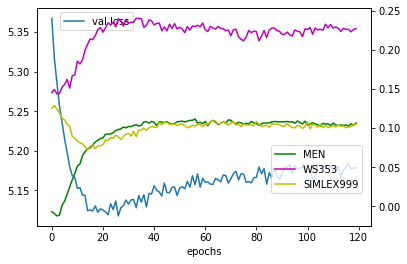

In [211]:
fig, ax1 = plt.subplots()

ax1.plot(val_losses, label='val loss')

ax2 = ax1.twinx()
ax2.plot(men, label='MEN', c='g')
ax2.plot(ws353, label='WS353', c='m')
ax2.plot(simlex999, label='SIMLEX999', c='y')

ax1.legend(loc=[0.07, 0.9])
ax2.legend(loc=[0.7, 0.15])

ax1.set_xlabel('epochs');